In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#df is is the original file
#df2 is the data cleaning is done and will be used for the model building
df = pd.read_excel('CR_Data_Cleaned_V3 (1).xlsx')

print(df)

     Patient_Registration_Number     Race                   Education_level  \
0                        9860720  Chinese                           Unknown   
1                        4125312   Indian                           Unknown   
2                       22080090  Chinese          Some secondary education   
3                       32287125  Chinese                           Unknown   
4                       33177600   Indian          Some secondary education   
..                           ...      ...                               ...   
179                     16554981    Malay  Form 6 / pre-university graduate   
180                     32149036  Chinese                           Unknown   
181                      8249733  Chinese                           Unknown   
182                     32315438    Malay                   Form 5 graduate   
183                      8444773   Others  Form 6 / pre-university graduate   

                      Patient_occupation Health_fun

In [ ]:
# Check for duplicates
duplicates = df[df.duplicated()]

# Print the duplicate rows (if any)
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [Patient_Registration_Number, Race, Education_level, Patient_occupation, Health_funding, CR_Intake, Prescribed_Sessions, AACVPR_Risk_Category, CR_Adherence, Triglyceride, Triglyceride_cat, HDL, HDL_cat, LDL, LDL_cat, HbA1c, HbA1c_cat, Pre_Tobacco, Post_Tobacco, Pre_Weight, Post_Weight, Height, Pre_Exercise_Stress_Test, Pre_Peak_Heart_Rate, Post_Exercise_Stress_Test, Post_Peak_Heart_Rate, Post_Peak_METs, Exercise_frequency_mins_week, Exercise_frequency_sessions_week, Exercise_intensity, Anxiety_Scores, Depression_Scores, Pre_RTW, Post_RTW, Pre_Return_to_drive, Post_Return_to_drive, Pre_erectile_dysfunction, Post_erectile_dysfunction, MACCE, Unexpected_Events, Age, Gender, Pre_Left_Ventricle_EF, Admission_Diagnosis_Angina, Admission_Diagnosis_Arrhythmia, Admission_Diagnosis_CABG, Admission_Diagnosis_Heart Failure, Admission_Diagnosis_NSTEMI, Admission_Diagnosis_Other cardiothoracic procedures, Admission_Diagnosis_PCI, Admission_Diagnosis_STEMI, Ad

       Patient_Registration_Number  Triglyceride         HDL         LDL  \
count                 1.840000e+02    181.000000  180.000000  180.000000   
mean                  1.833897e+07      1.520608    1.007222    2.593278   
std                   1.157111e+07      1.012072    0.452784    1.321458   
min                   5.590500e+04      0.000000    0.000000    0.000000   
25%                   6.838522e+06      0.900000    0.870000    1.842500   
50%                   1.754513e+07      1.300000    1.040000    2.600000   
75%                   3.154993e+07      2.000000    1.240000    3.592500   
max                   3.353232e+07      6.400000    2.200000    5.770000   

           HbA1c   Pre_Weight  Post_Weight      Height  Pre_Peak_Heart_Rate  \
count  167.00000   171.000000   158.000000  176.000000           144.000000   
mean     6.32515   112.071930    71.187342  165.611932           134.437500   
std      1.61945   553.601289    13.210890    7.855206            22.751537   

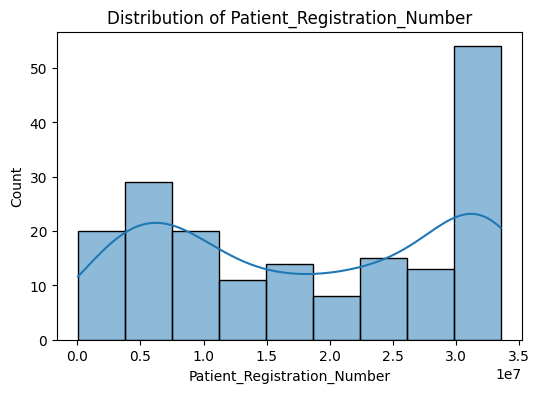

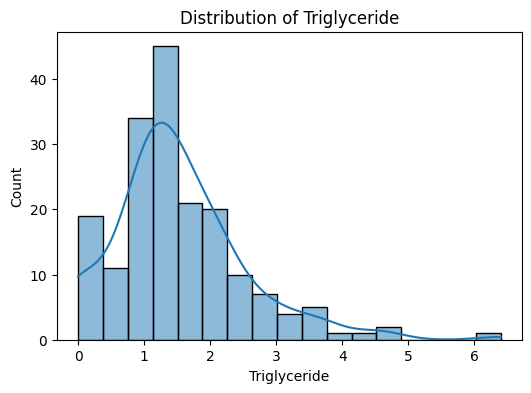

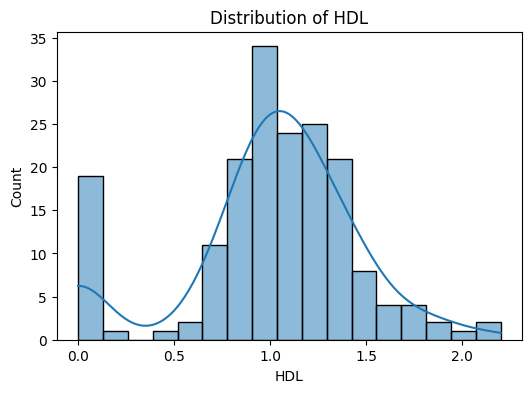

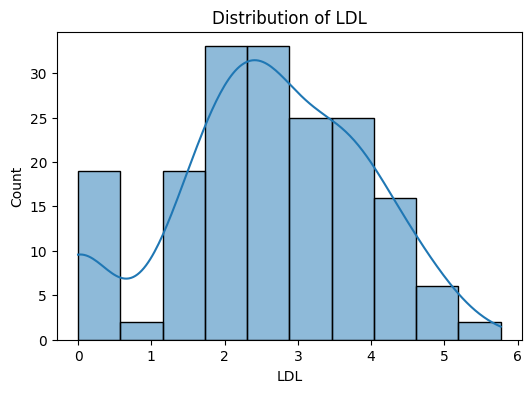

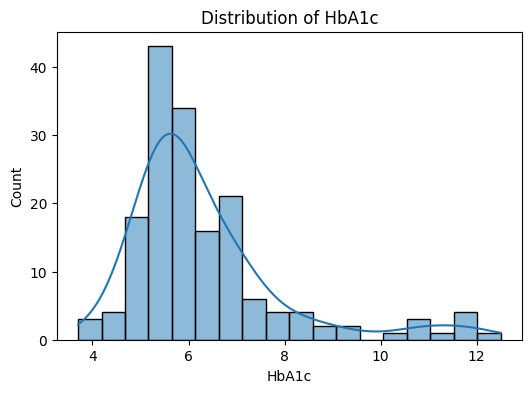

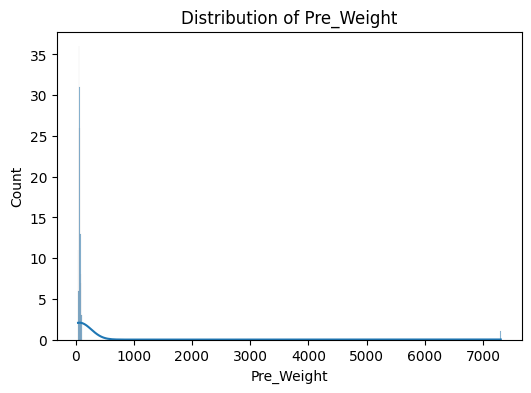

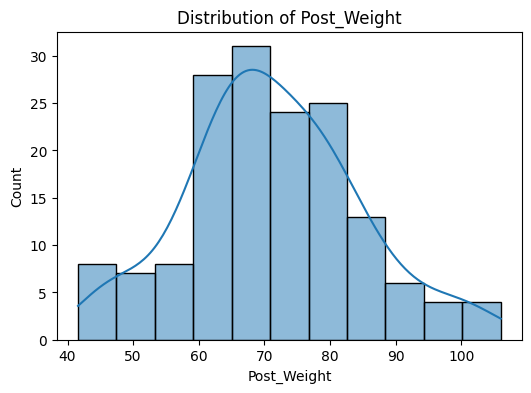

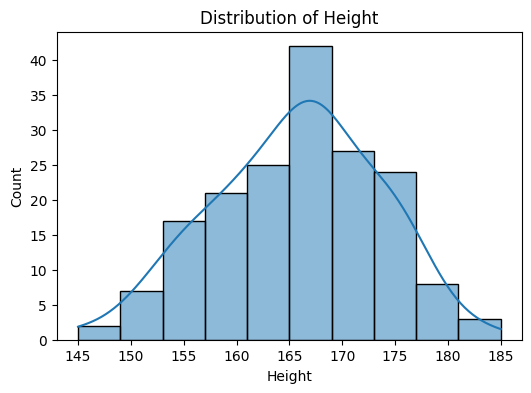

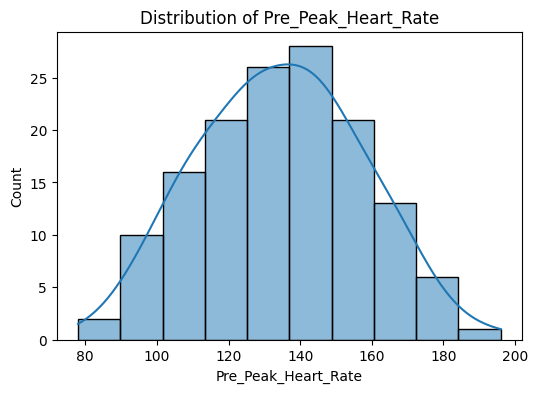

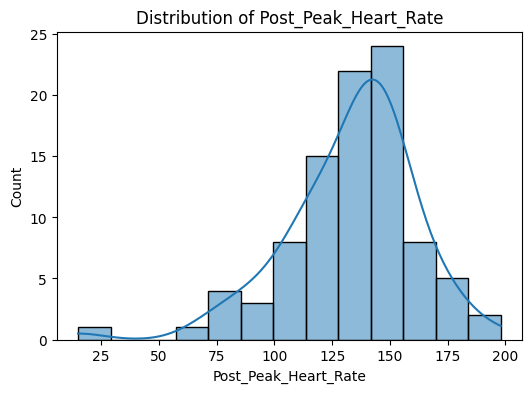

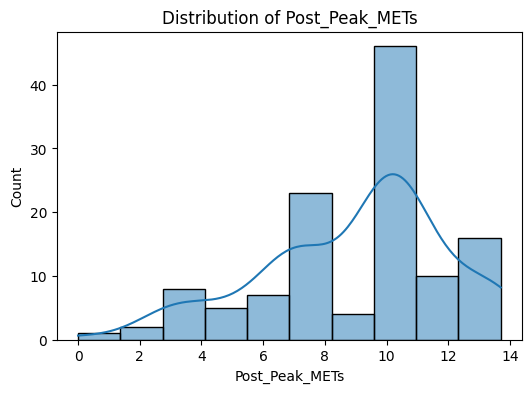

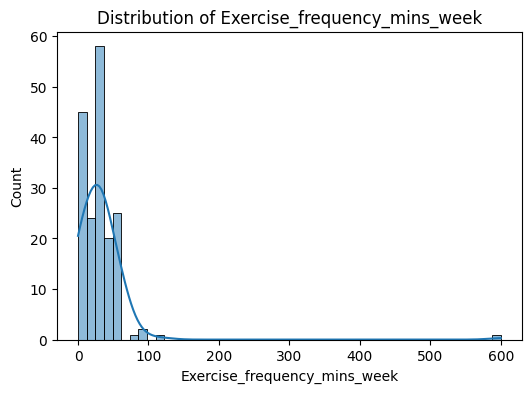

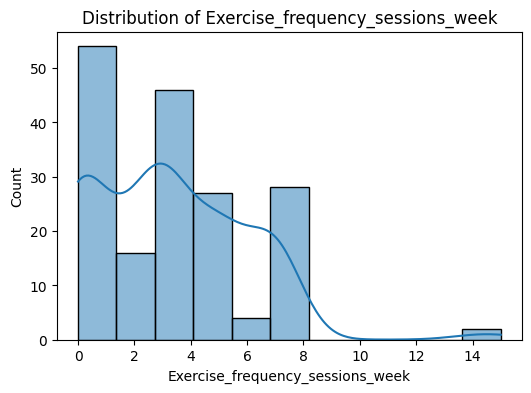

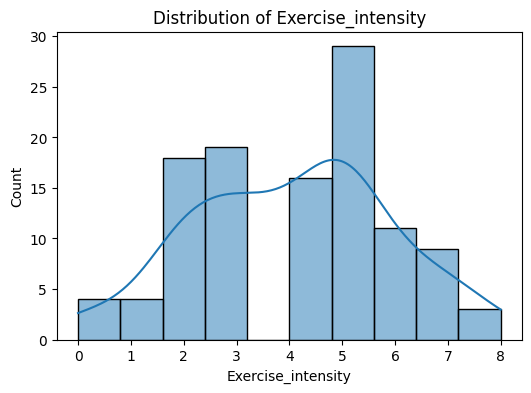

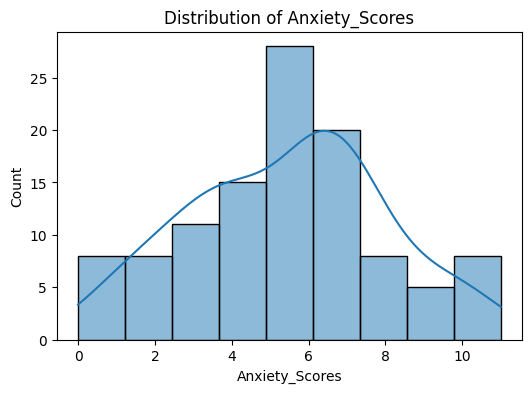

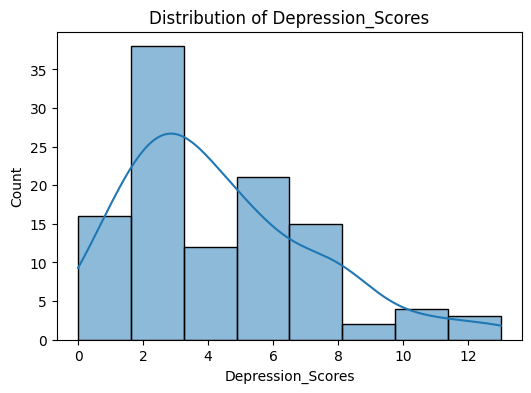

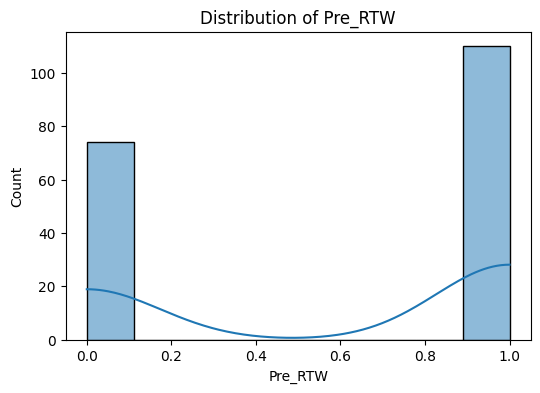

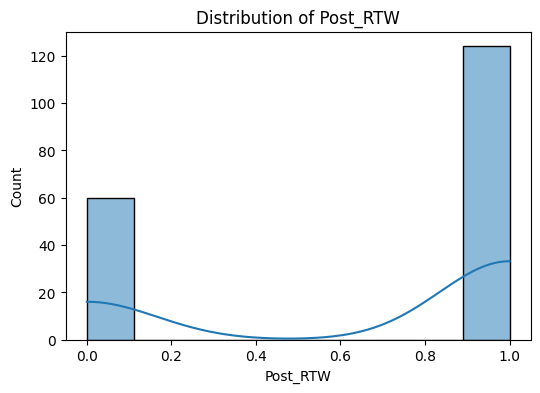

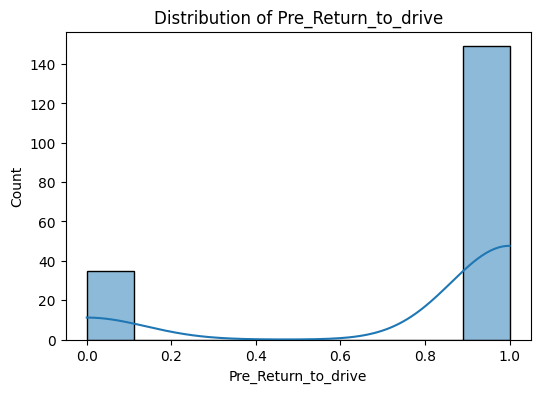

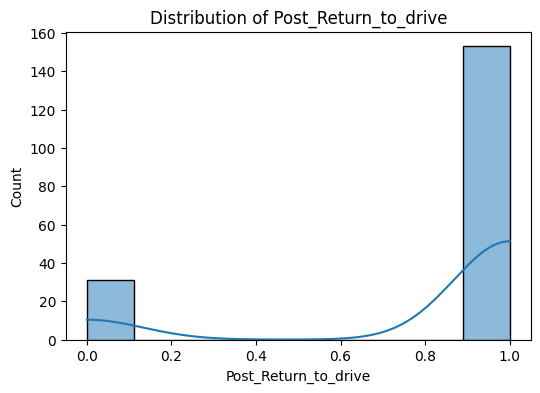

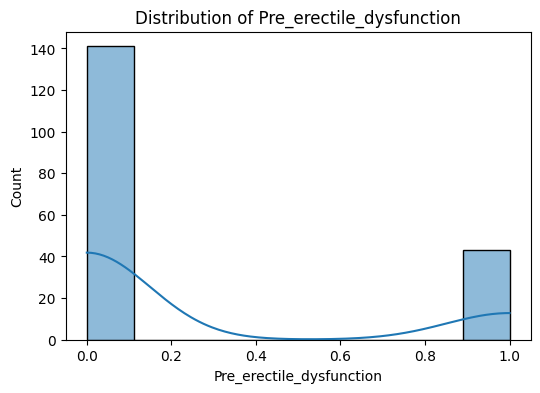

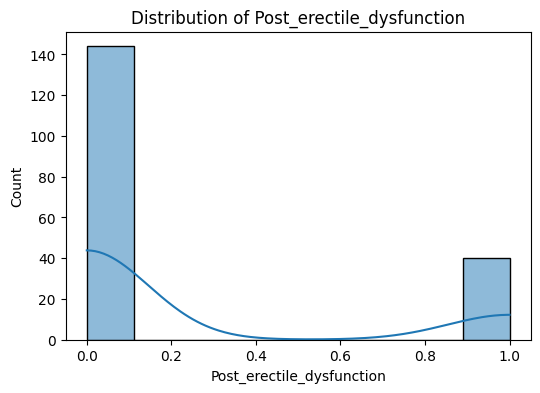

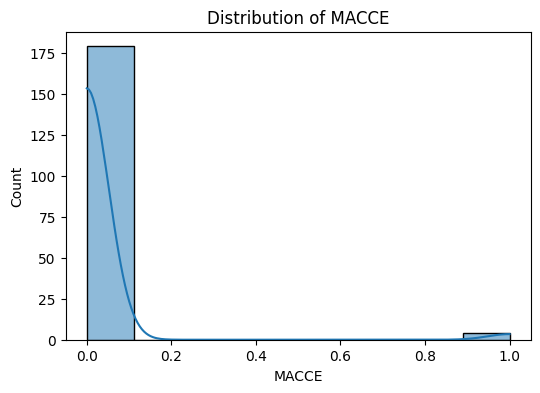

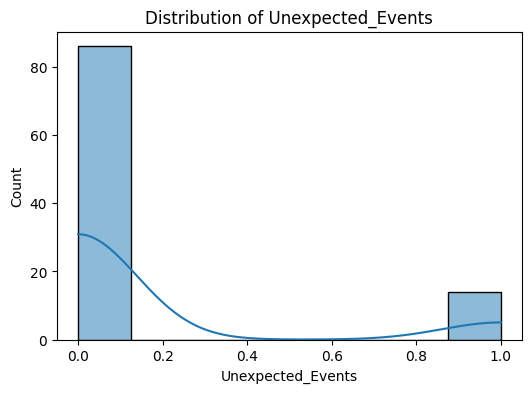

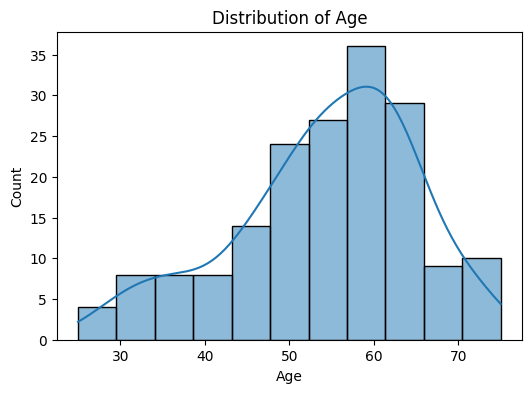

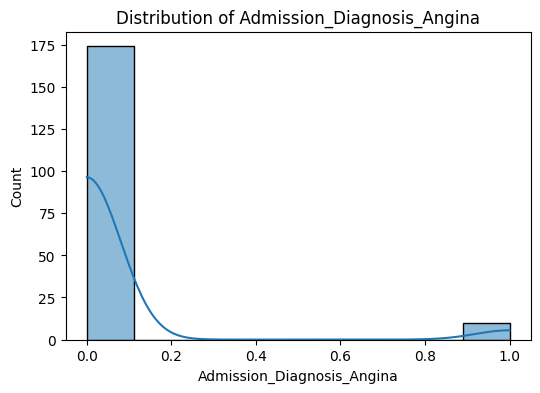

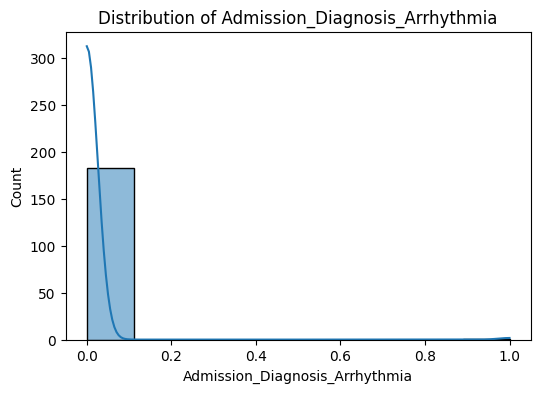

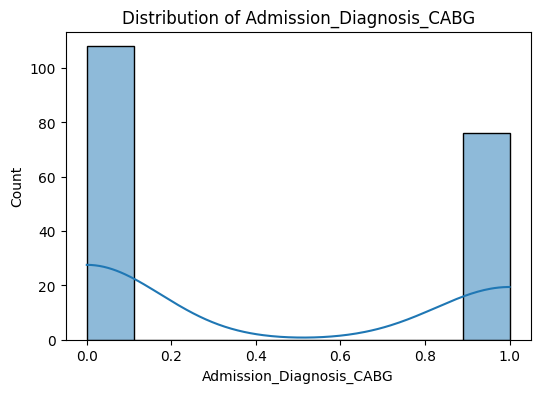

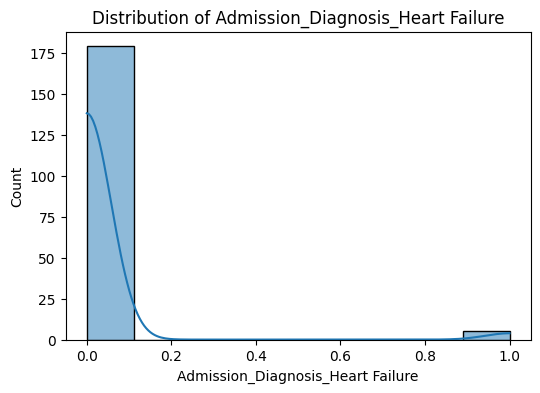

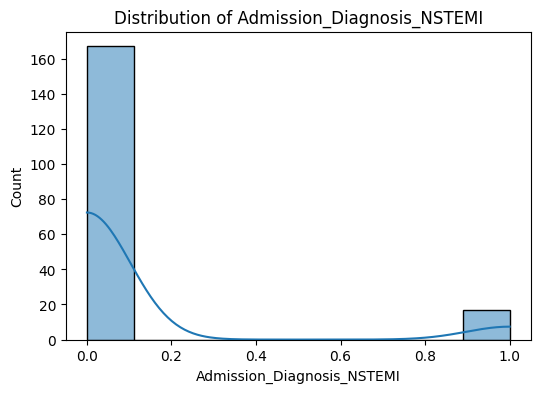

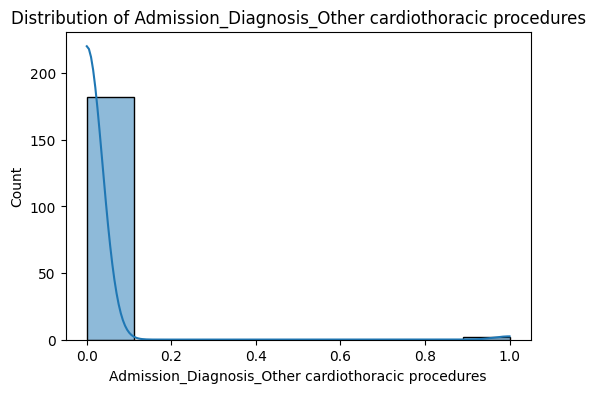

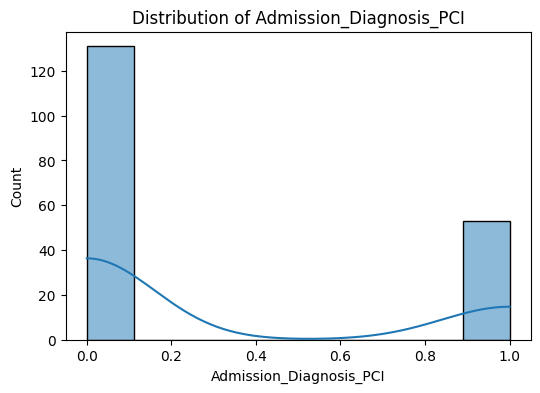

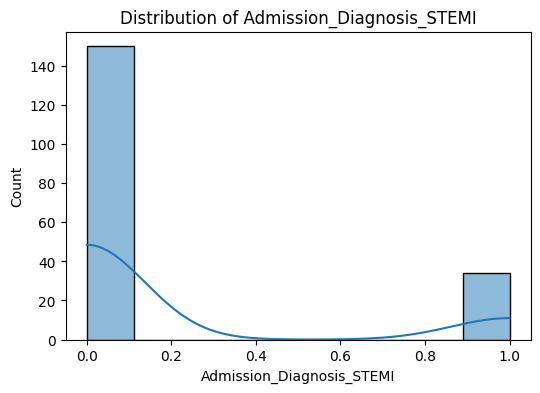

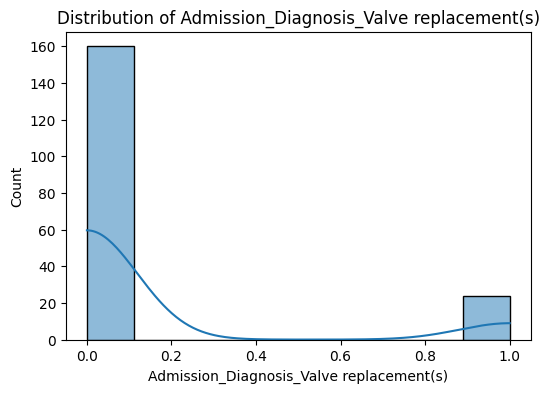

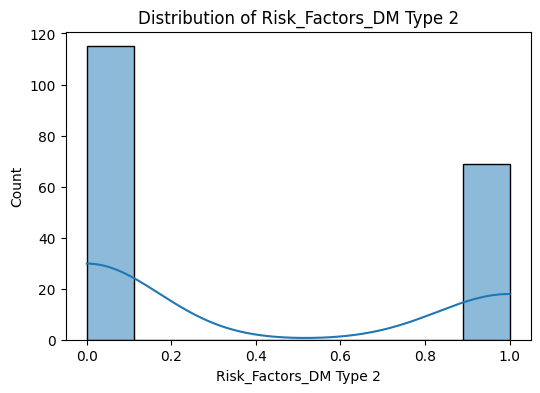

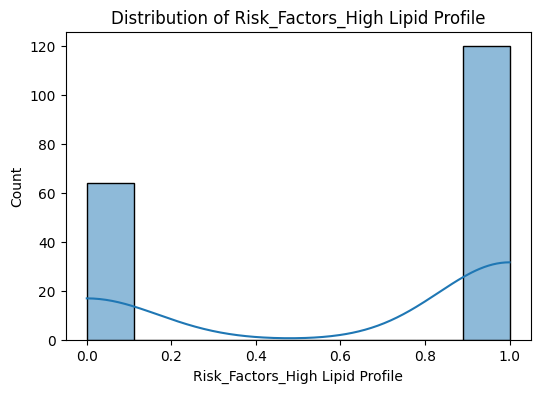

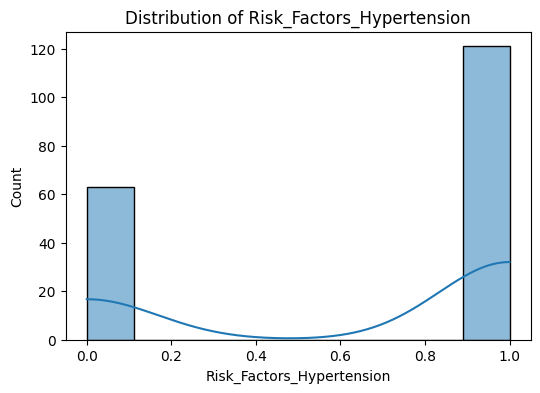

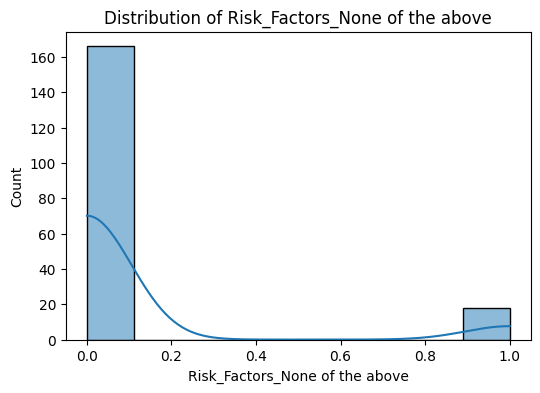

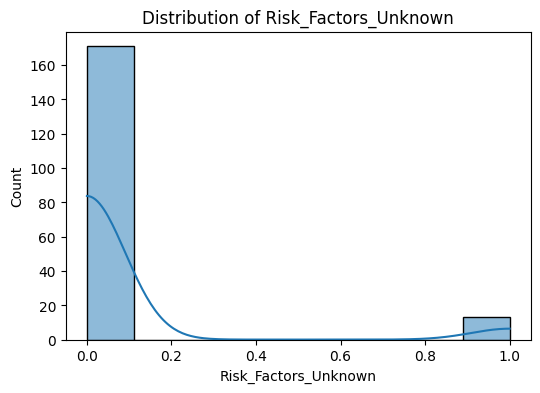

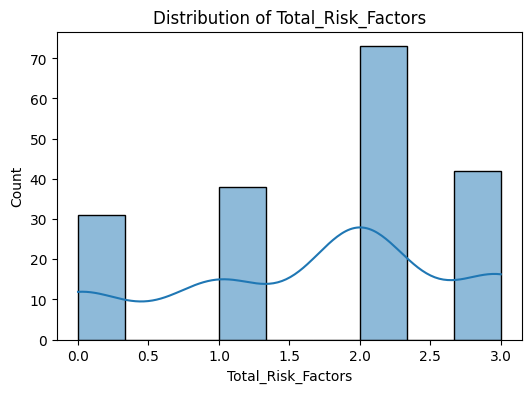

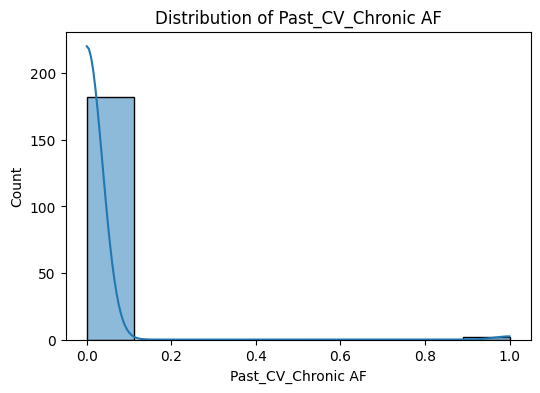

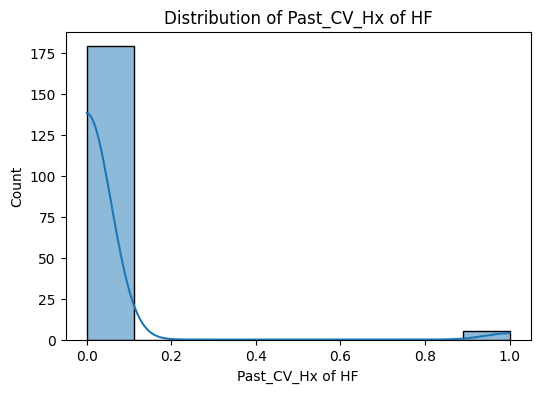

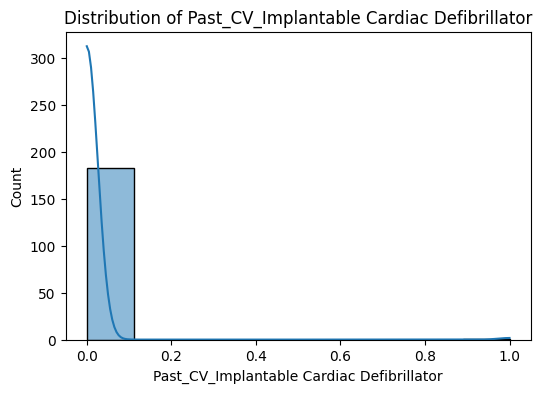

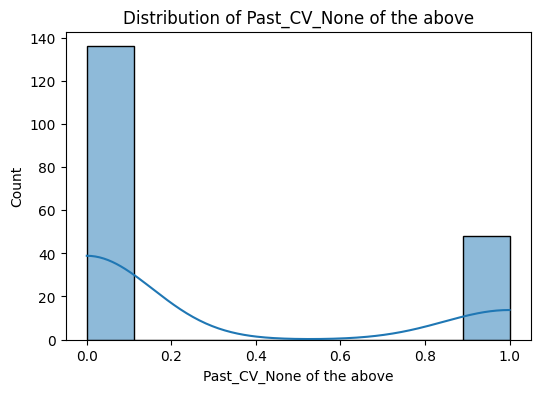

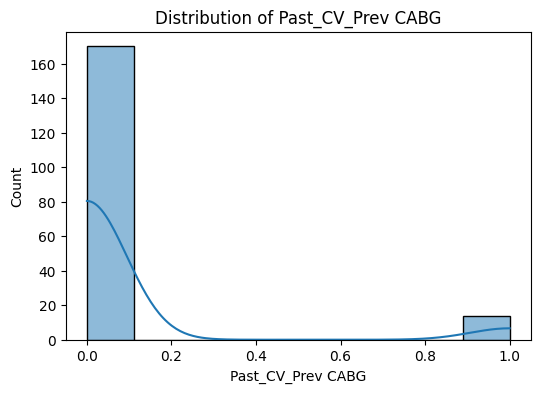

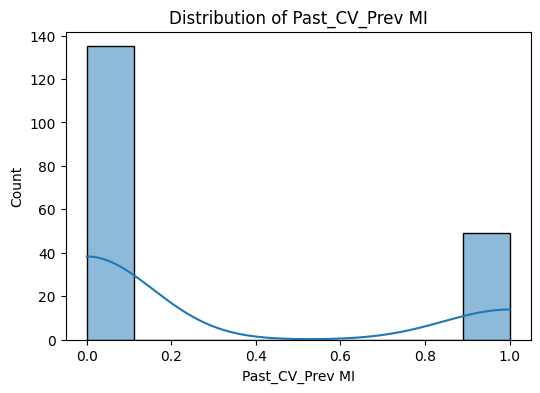

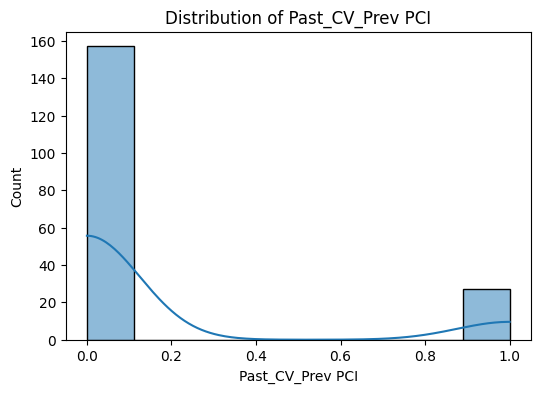

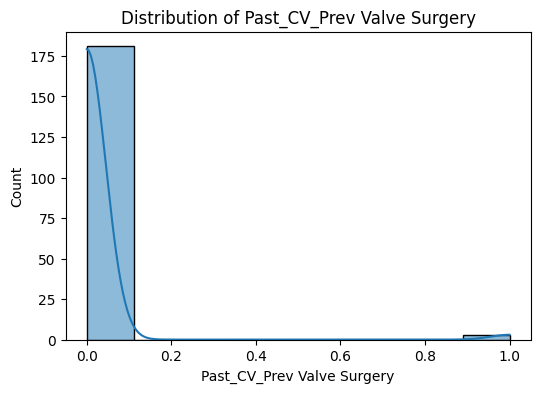

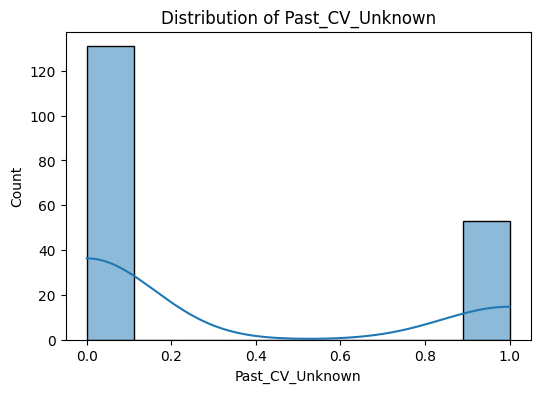

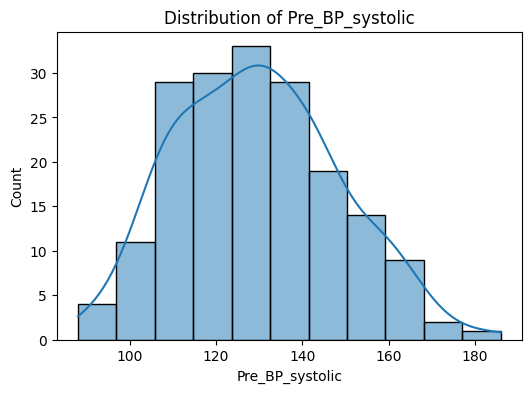

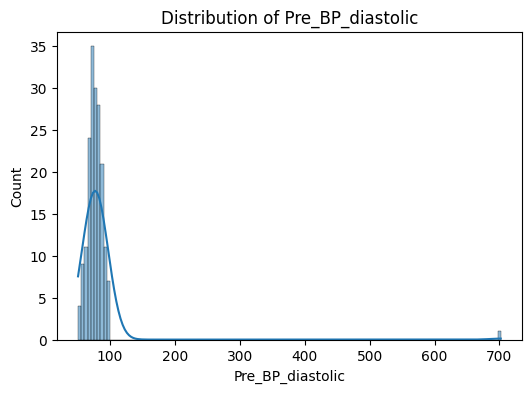

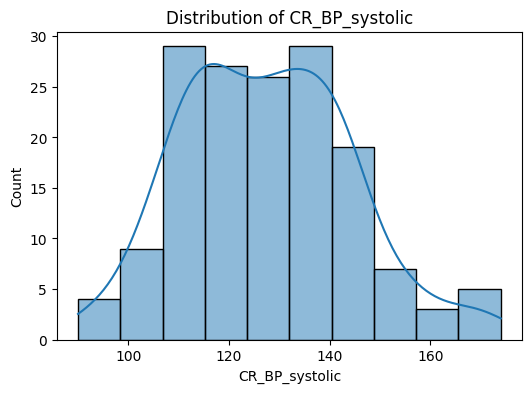

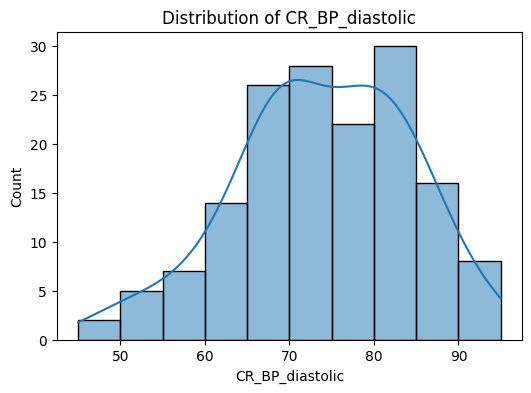

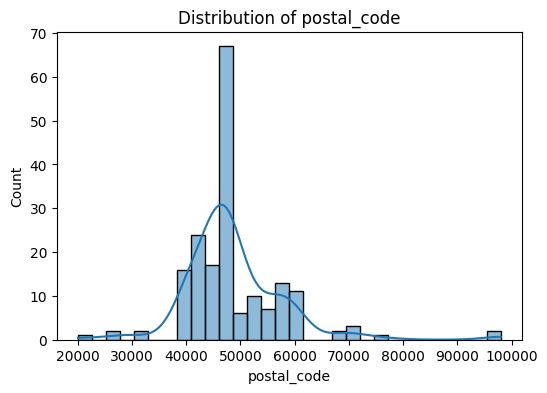

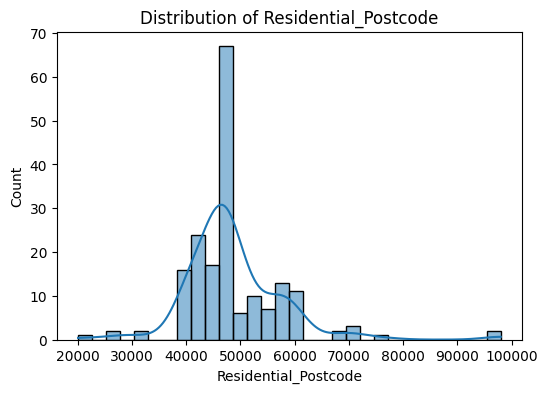

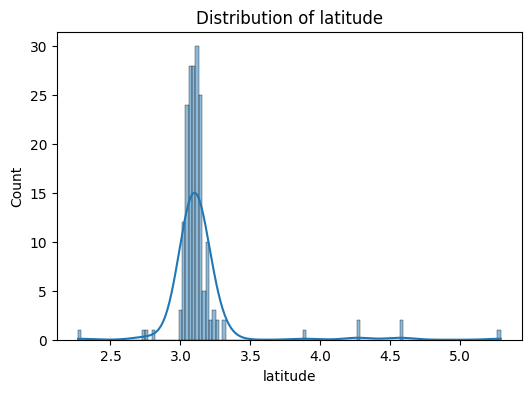

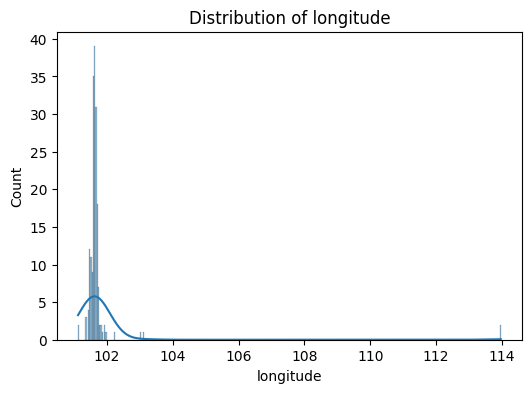

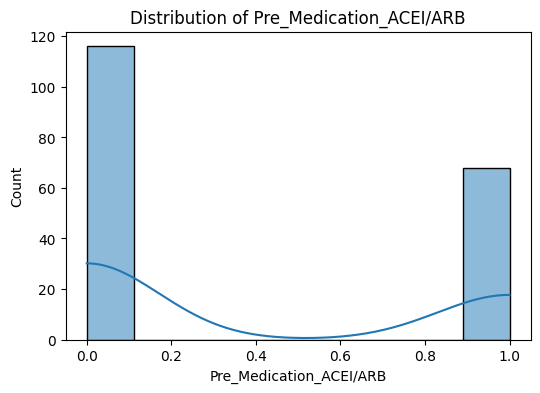

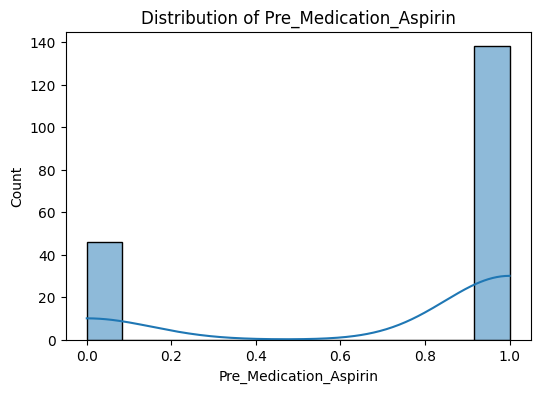

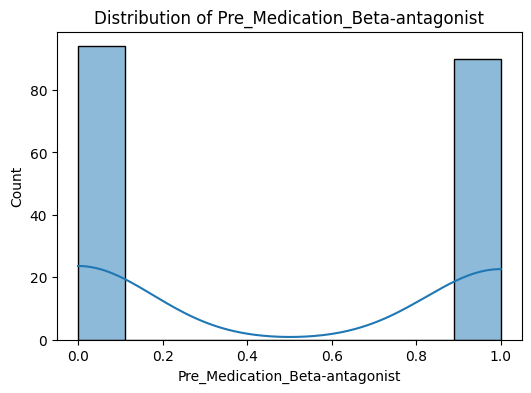

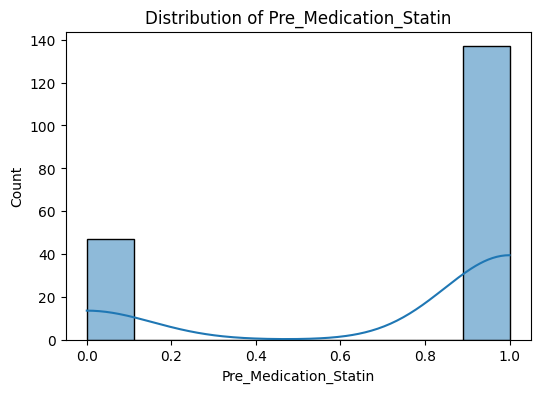

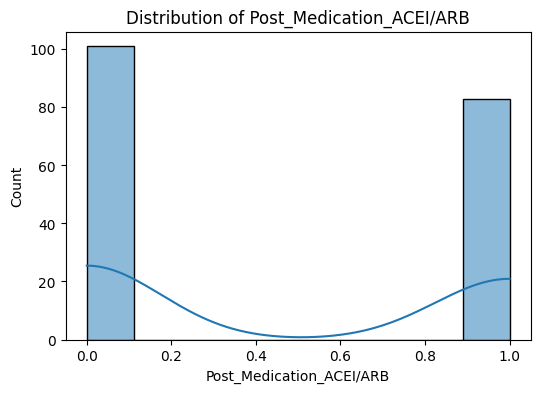

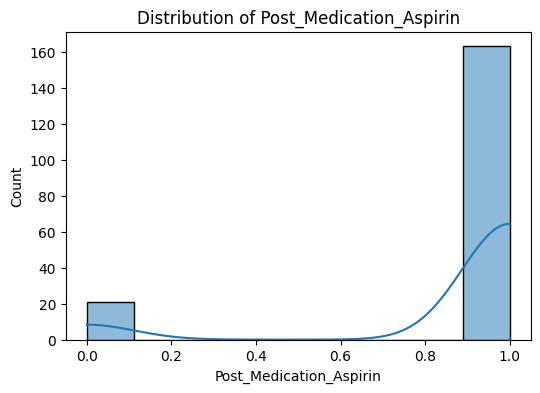

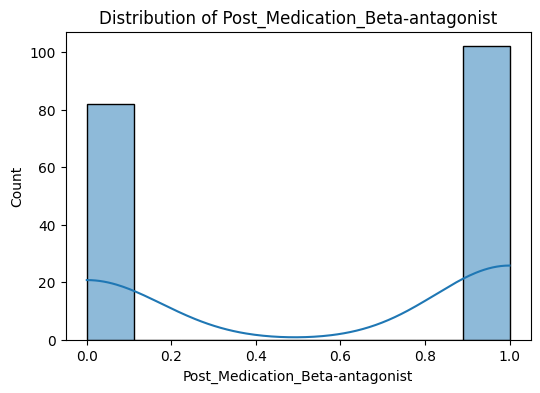

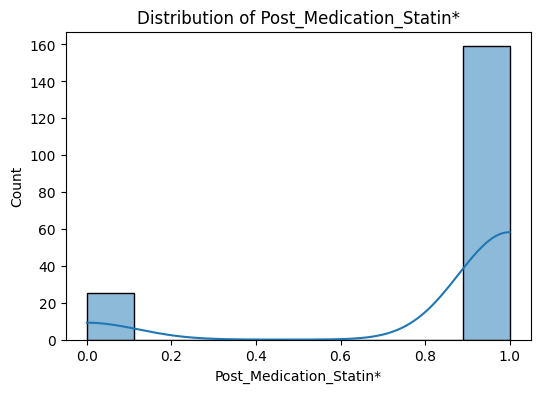

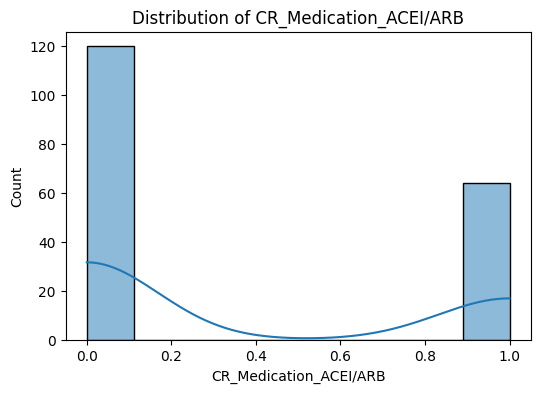

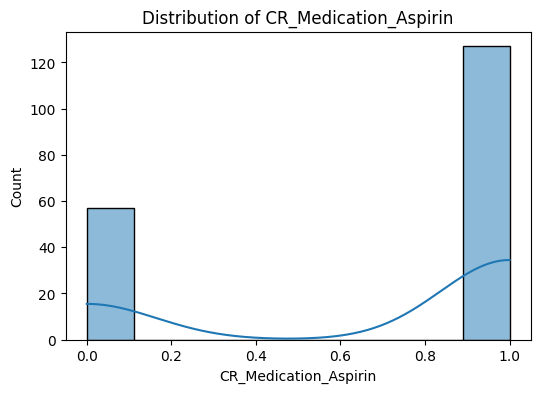

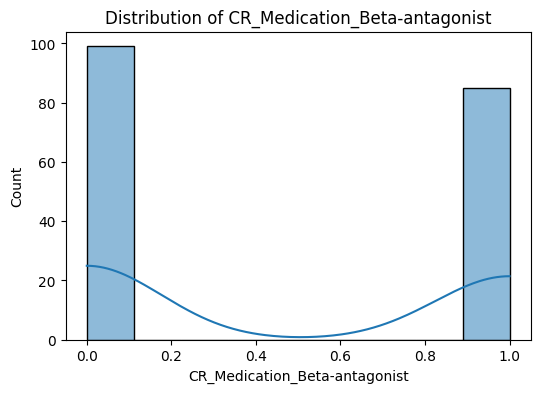

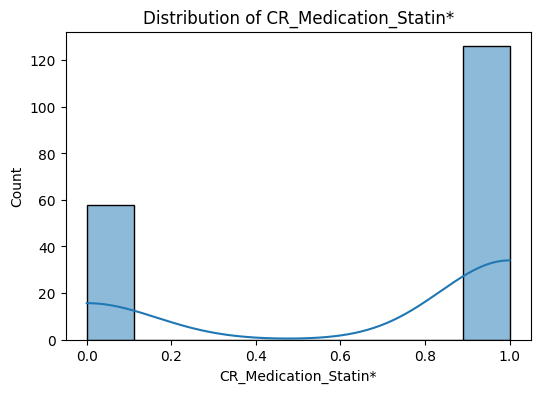

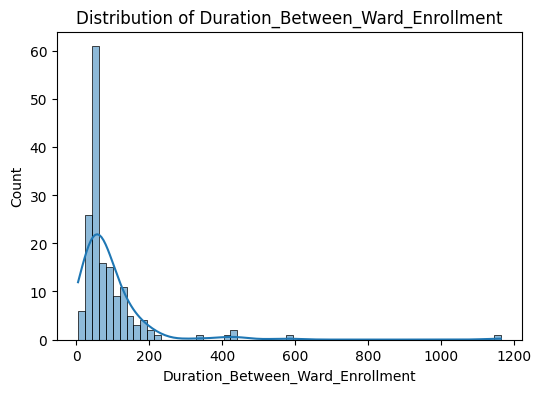

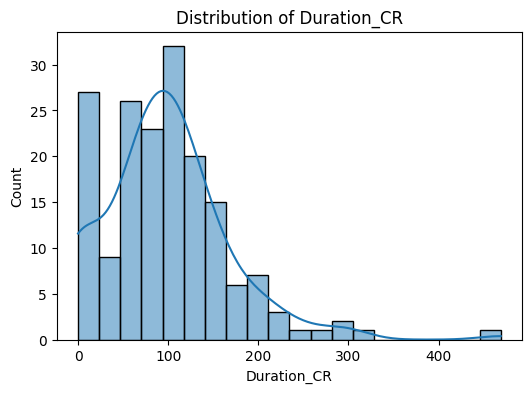

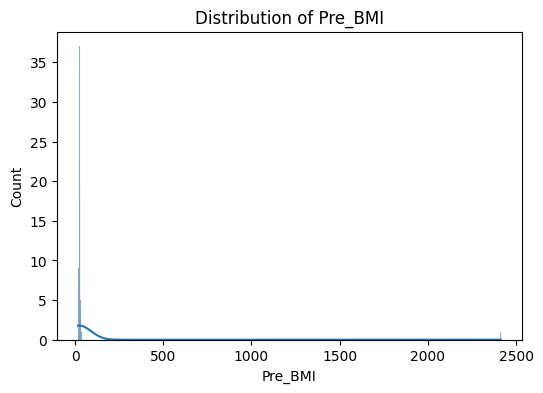

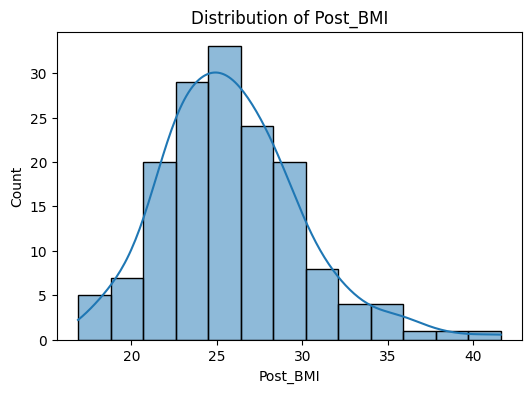

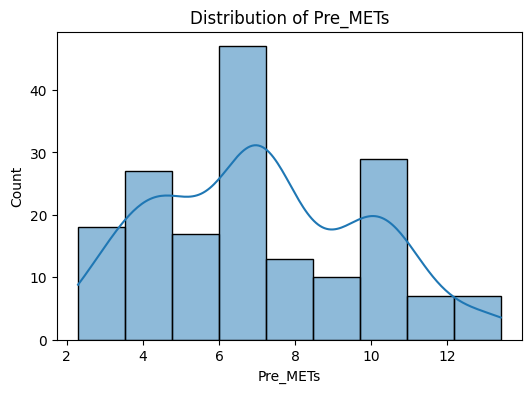

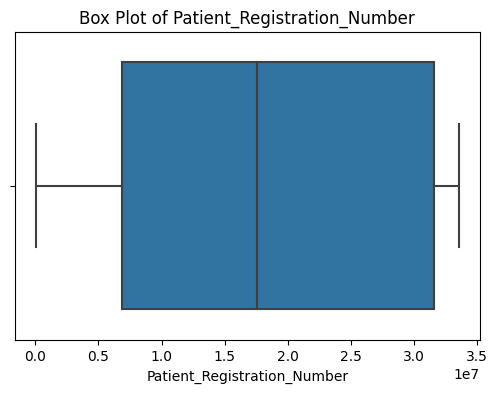

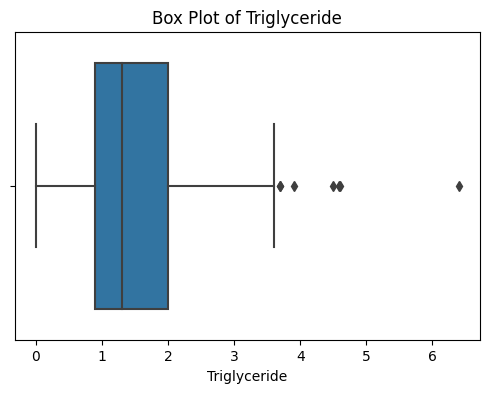

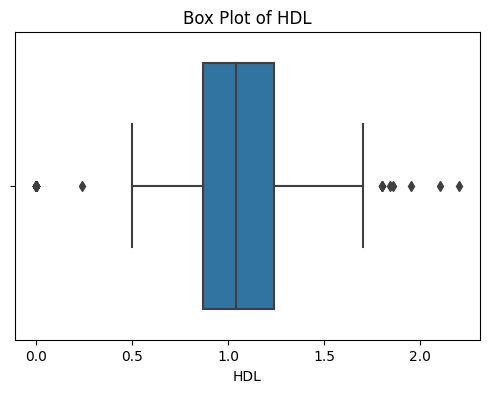

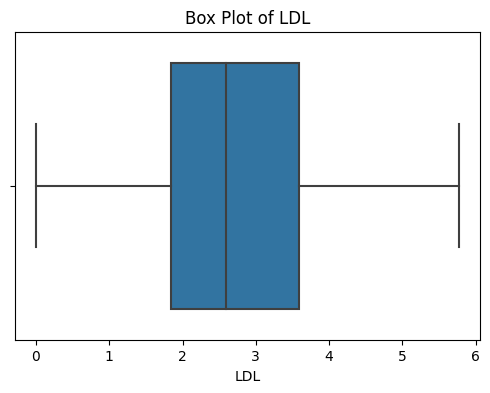

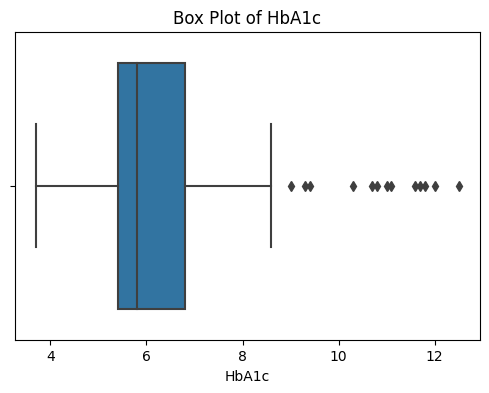

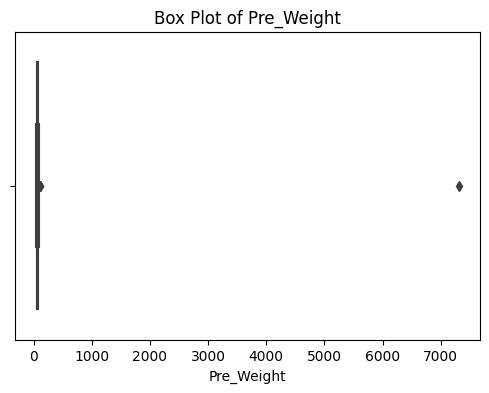

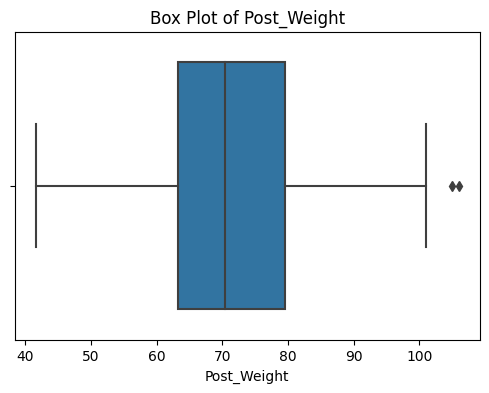

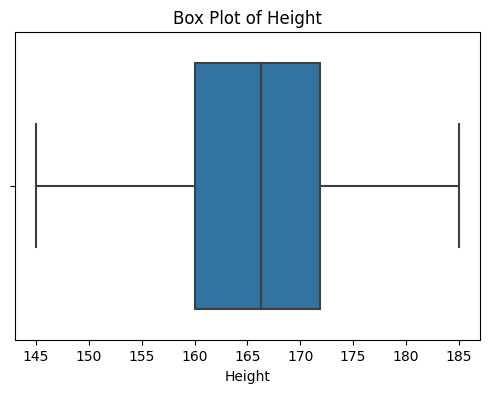

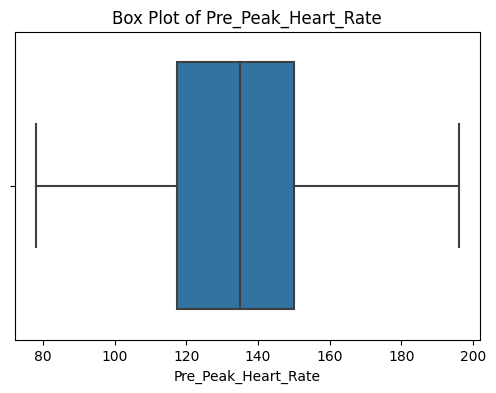

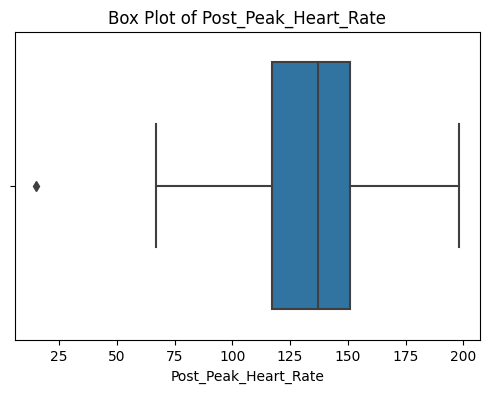

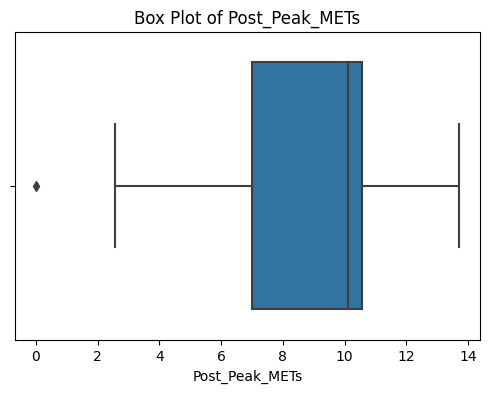

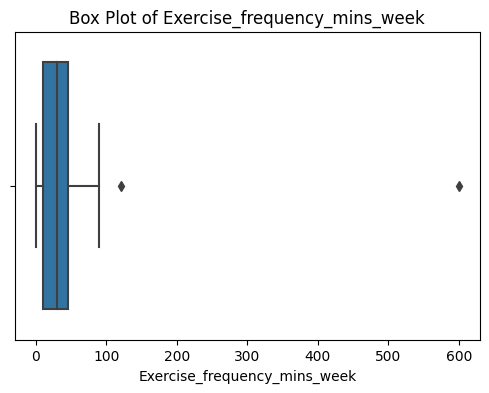

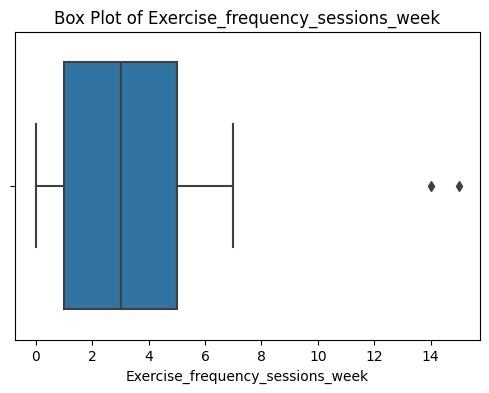

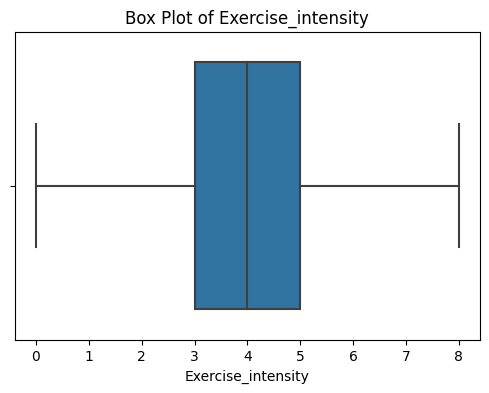

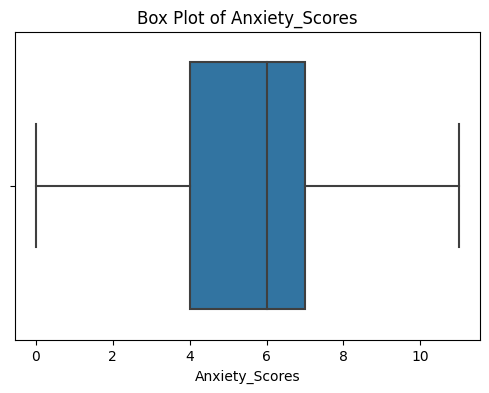

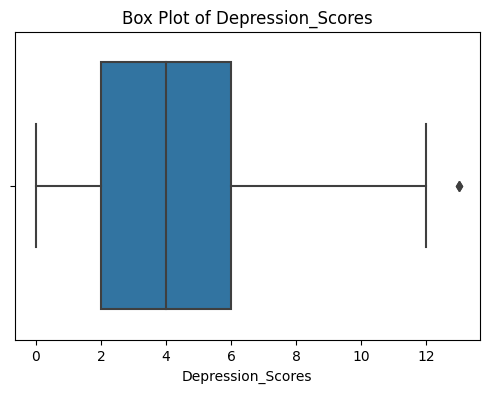

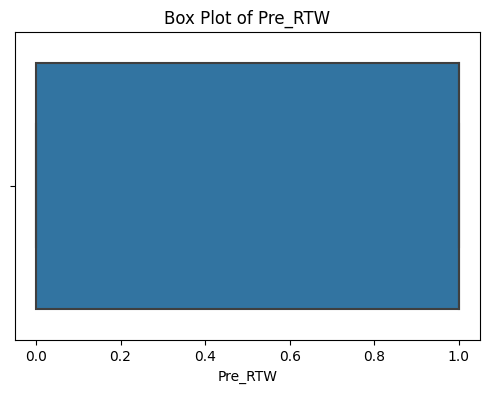

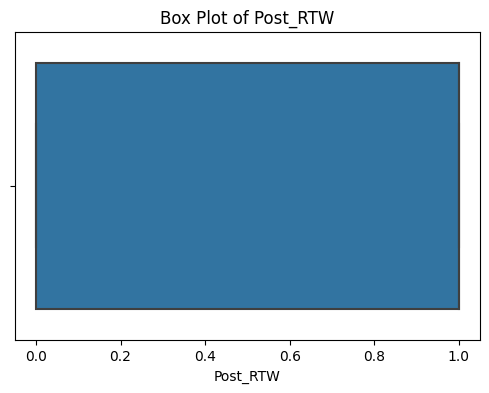

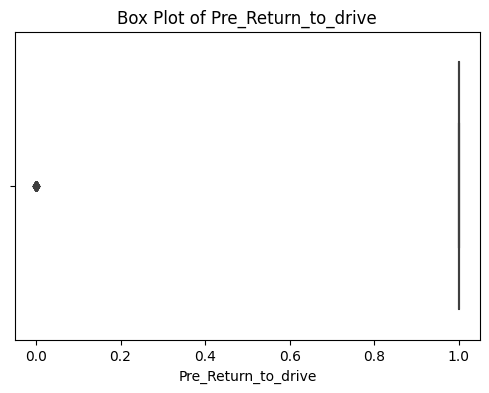

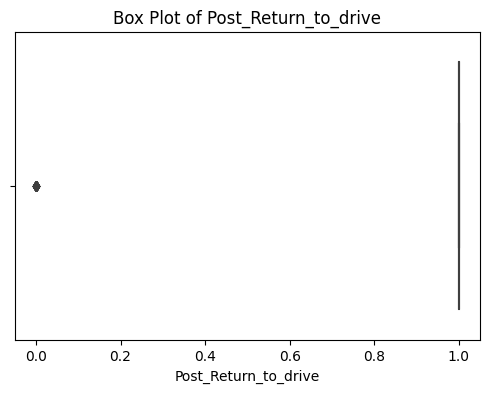

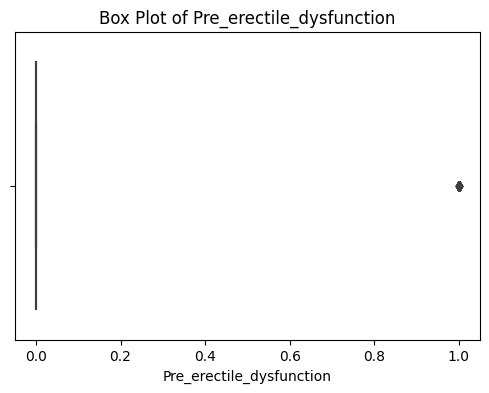

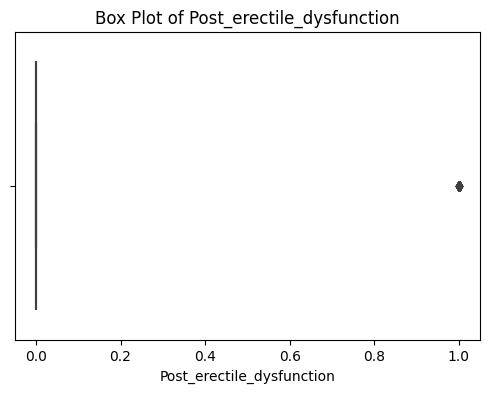

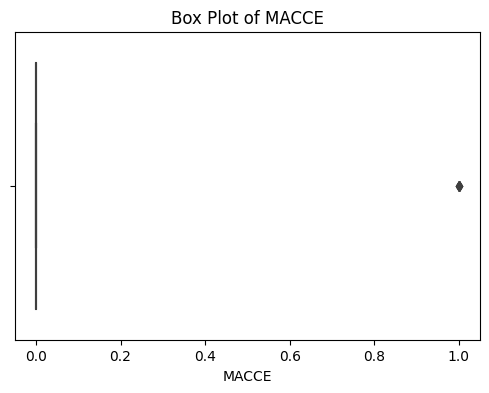

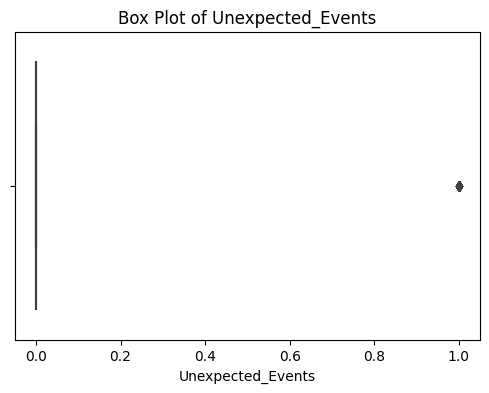

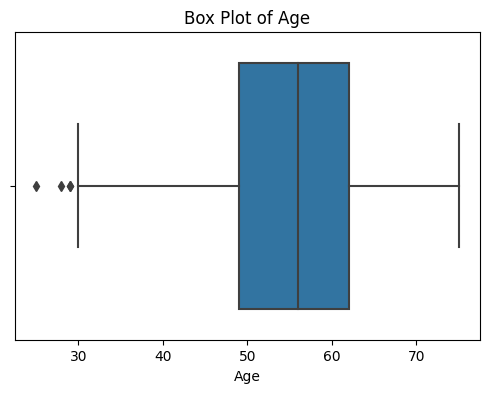

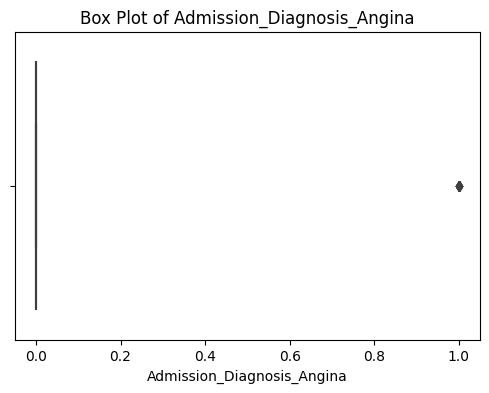

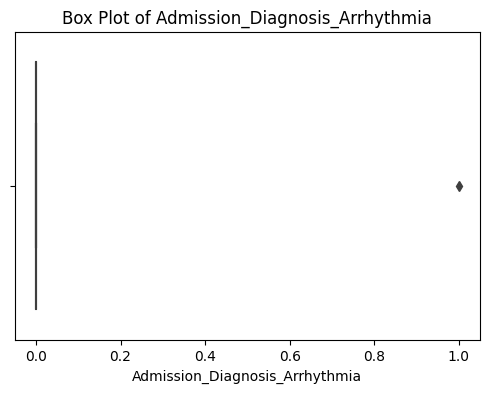

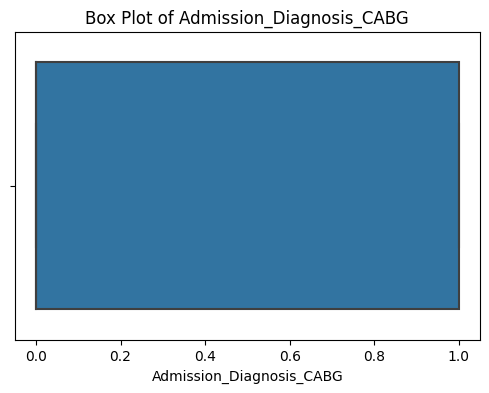

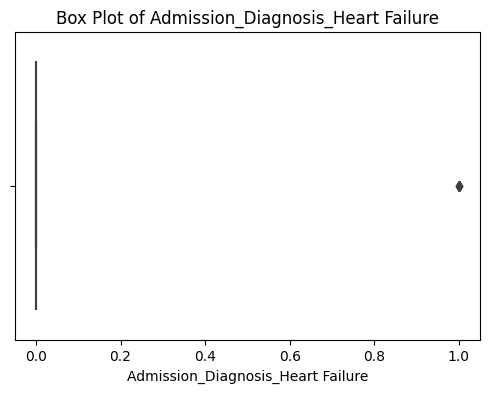

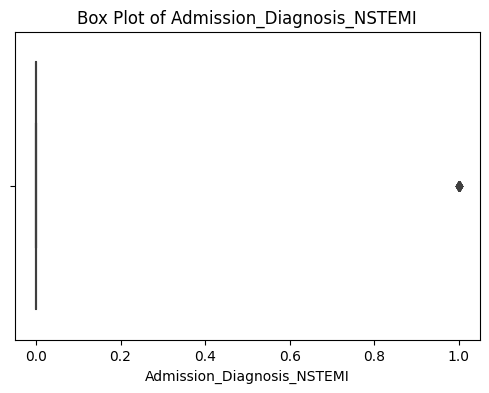

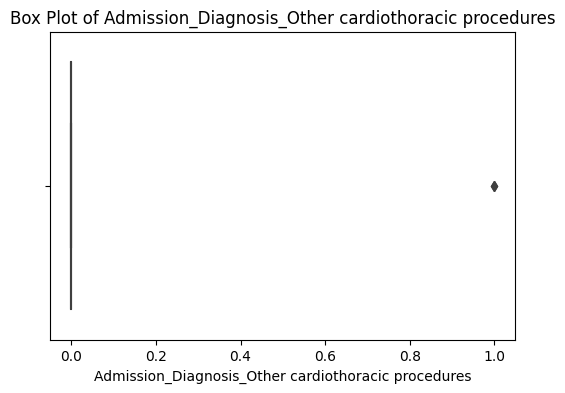

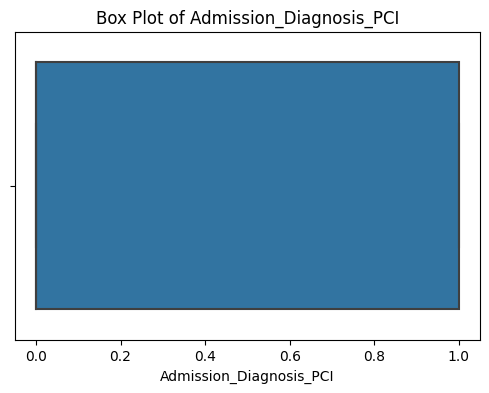

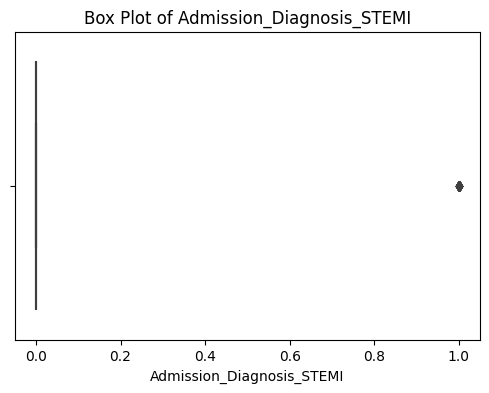

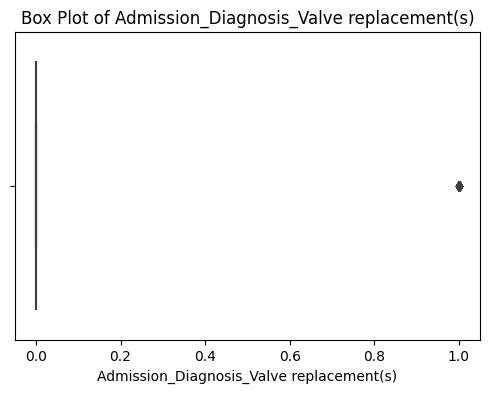

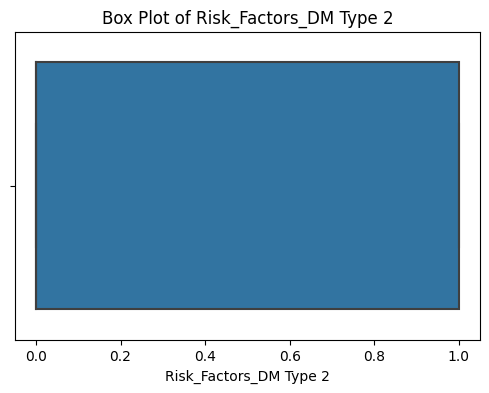

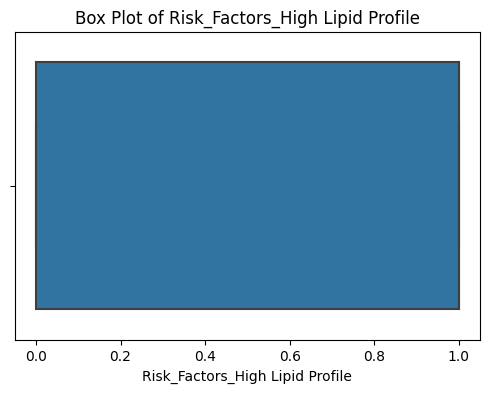

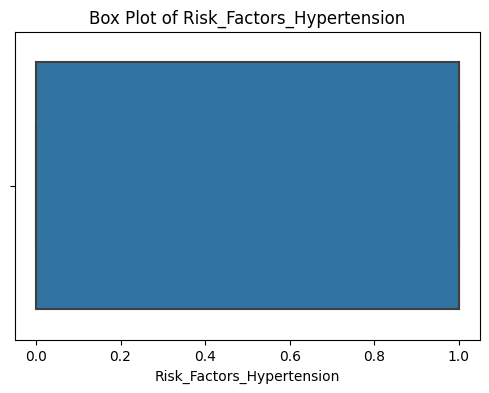

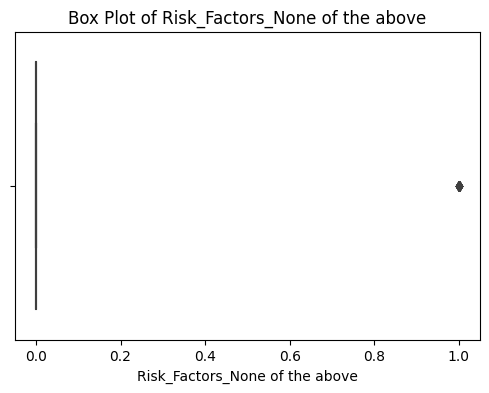

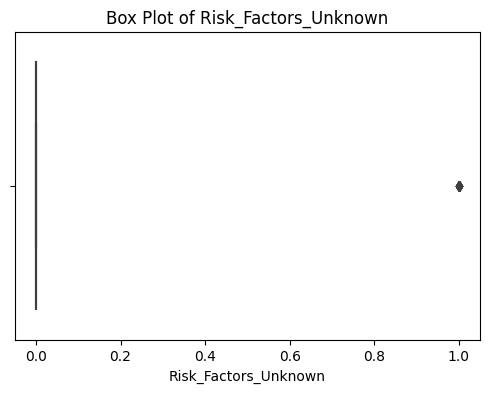

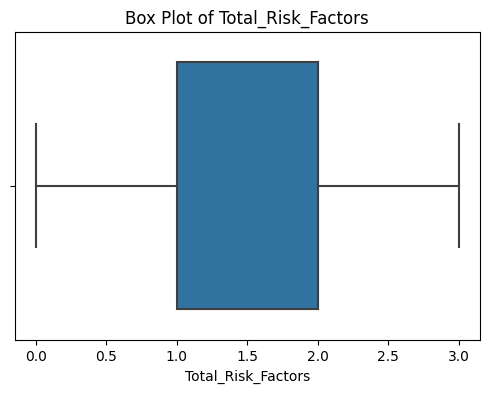

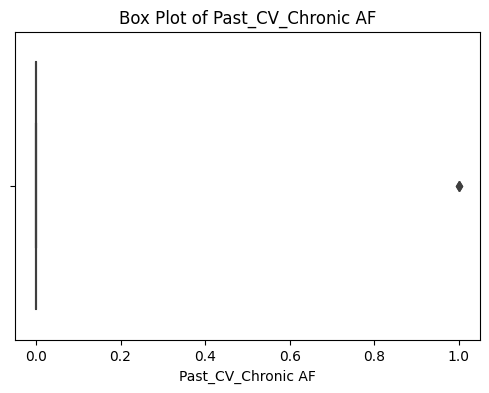

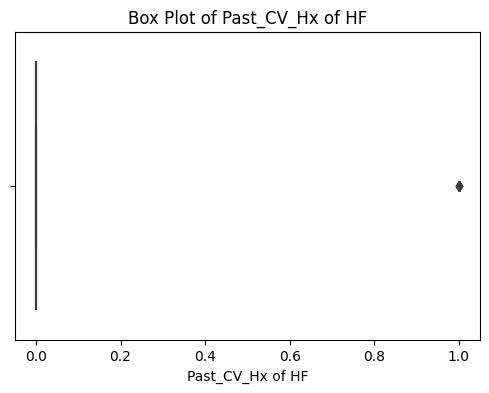

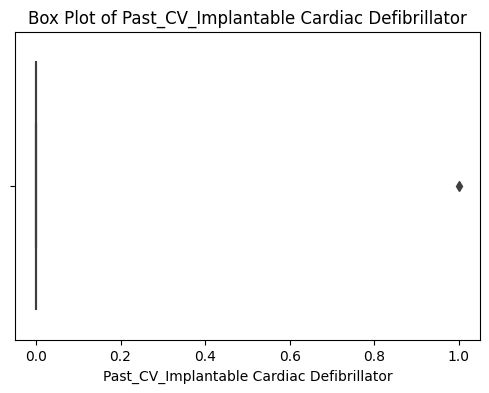

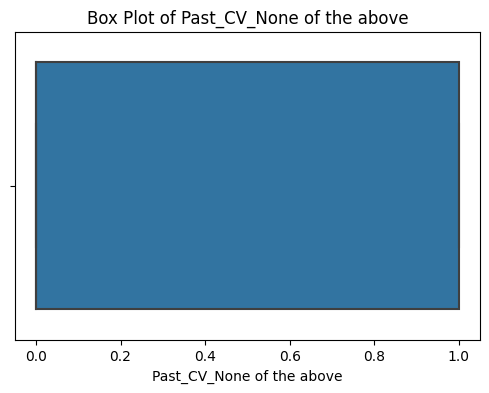

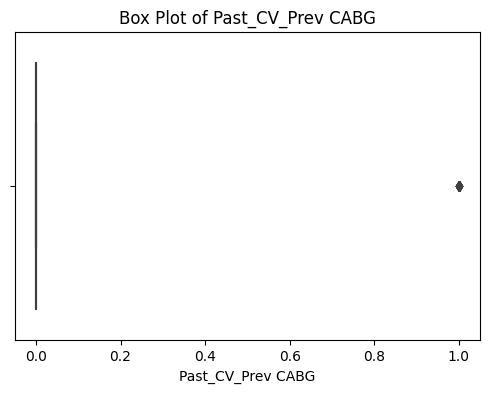

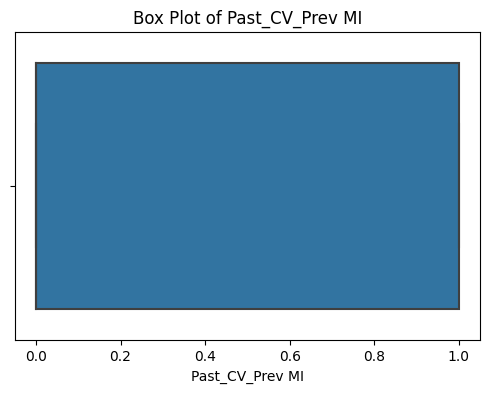

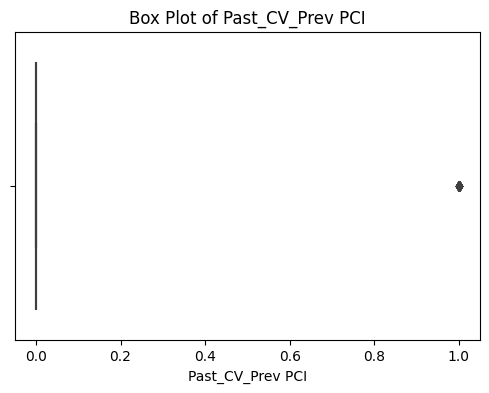

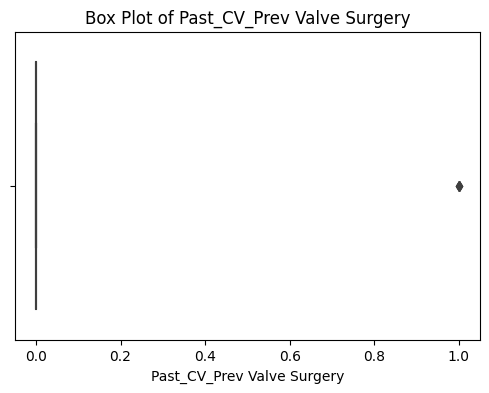

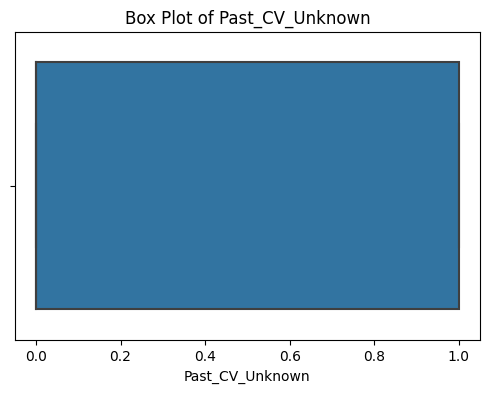

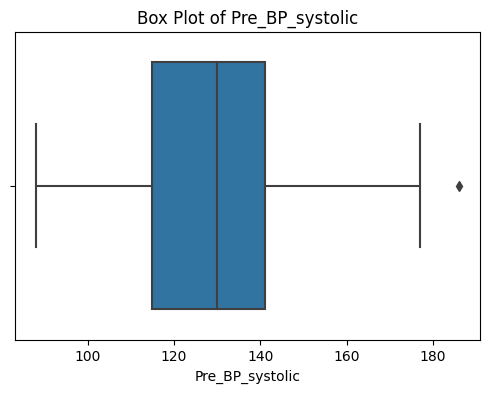

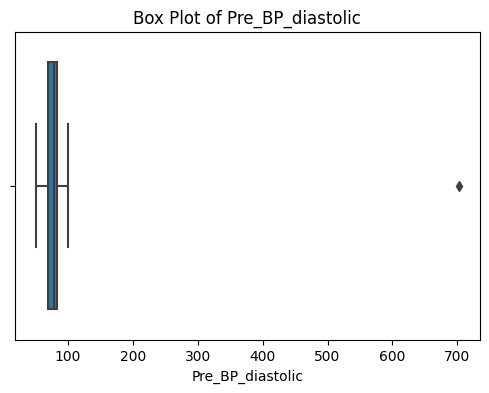

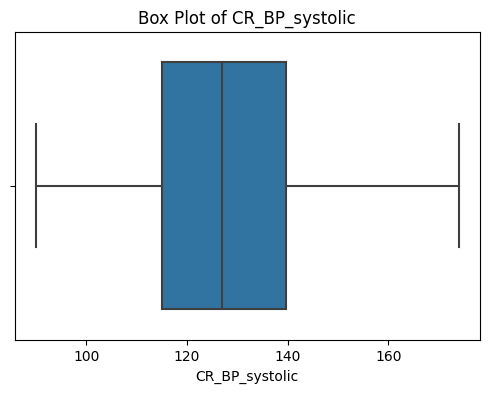

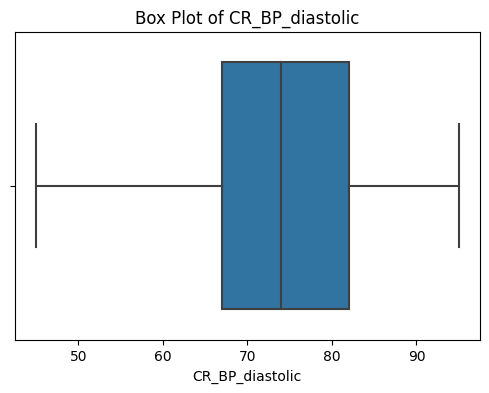

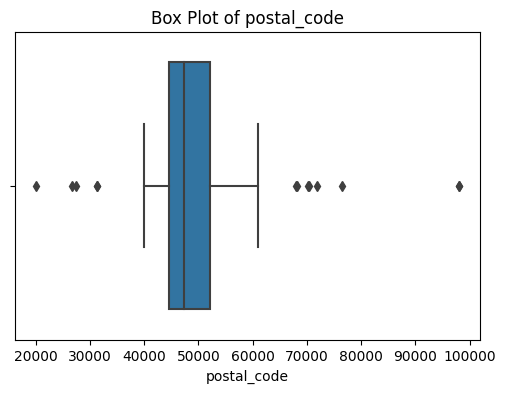

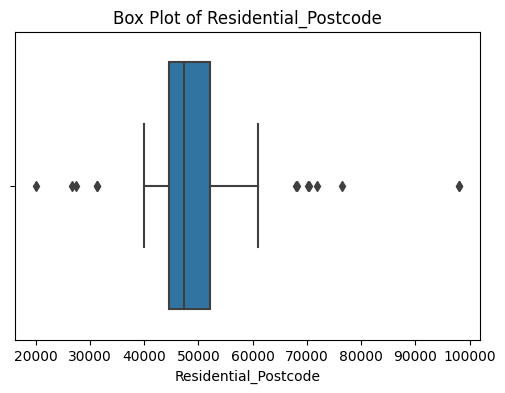

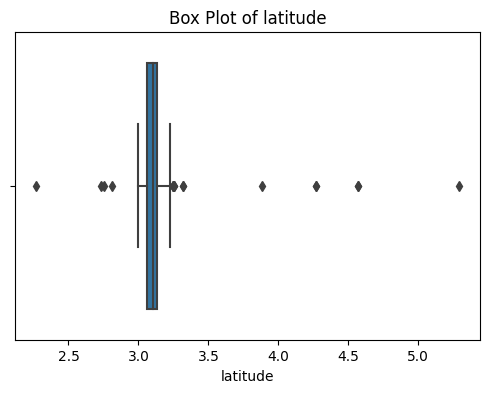

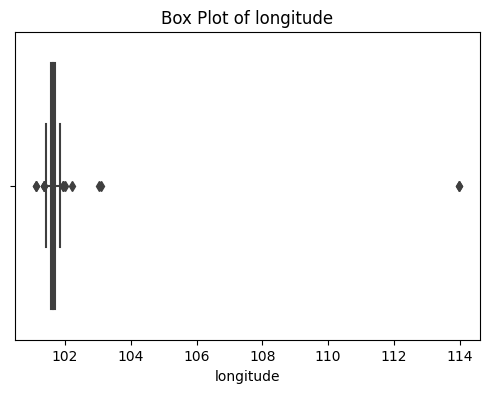

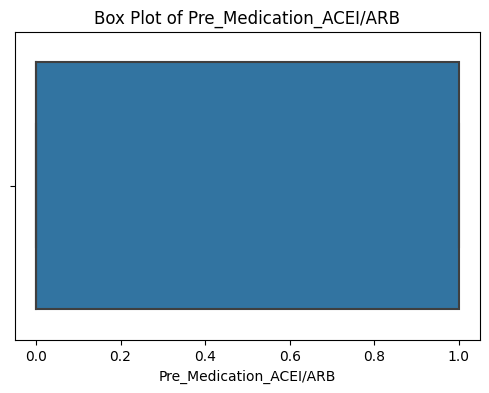

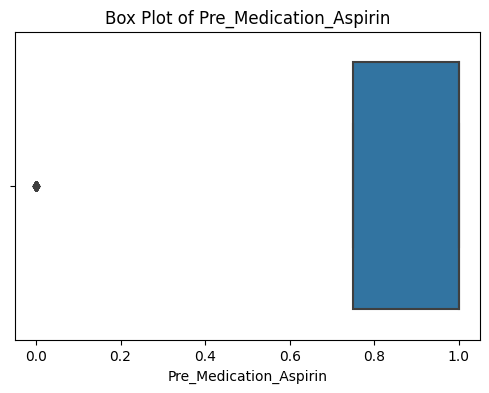

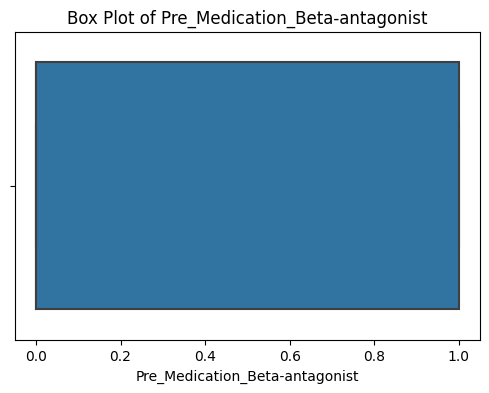

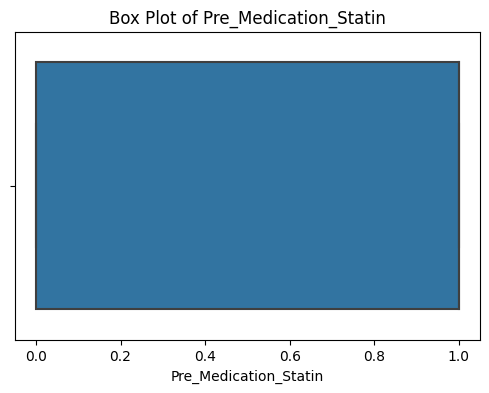

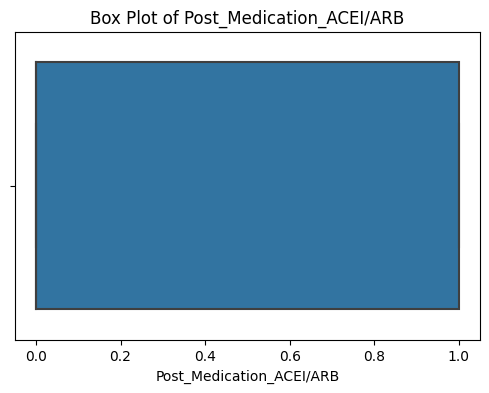

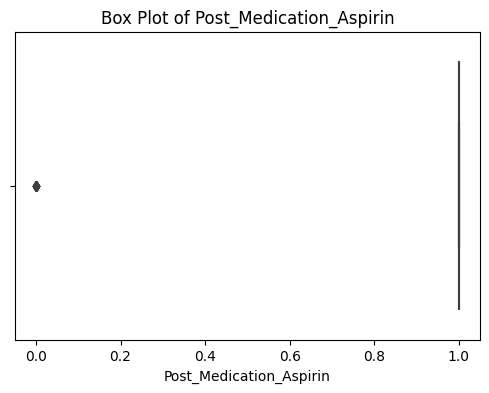

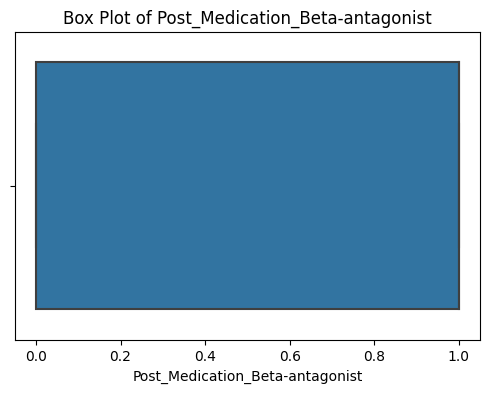

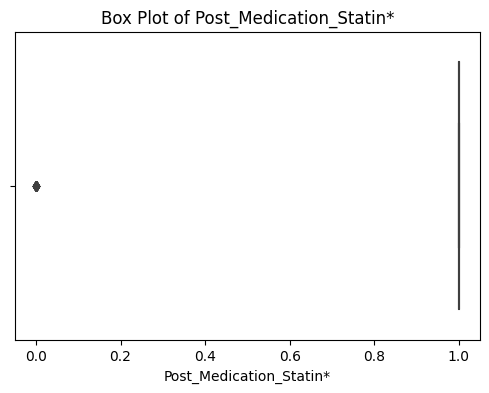

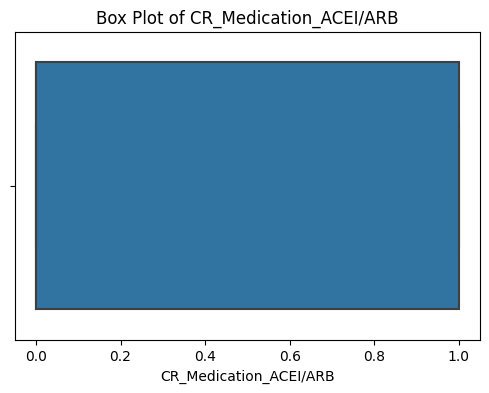

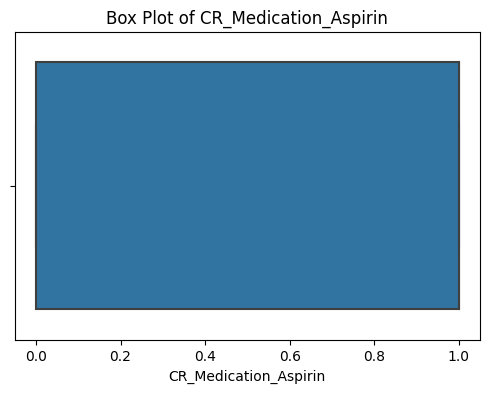

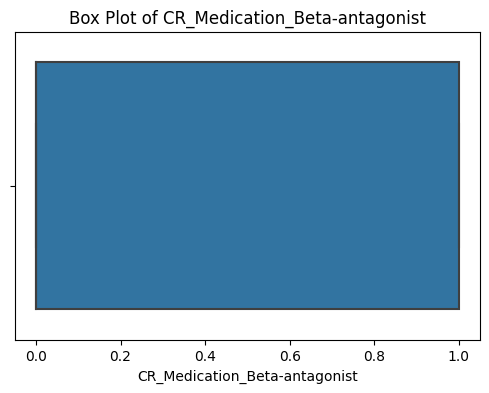

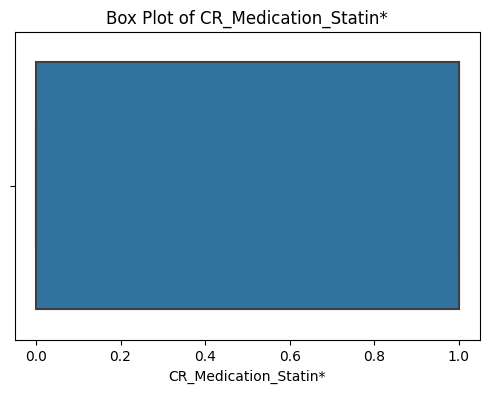

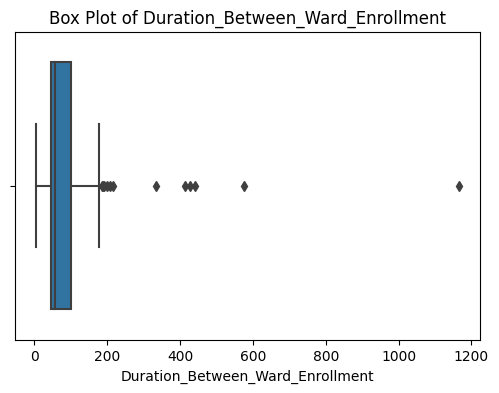

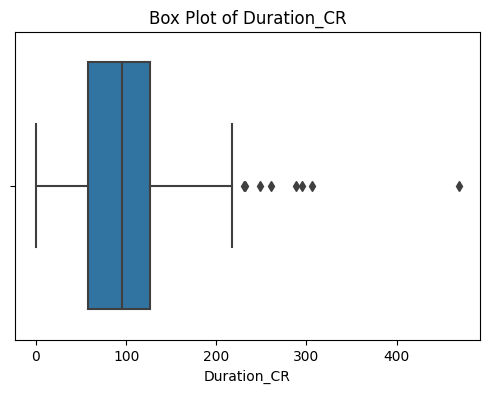

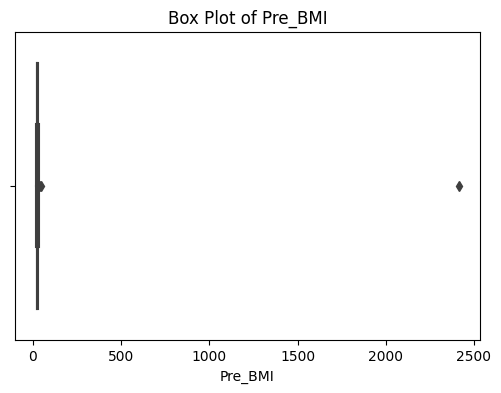

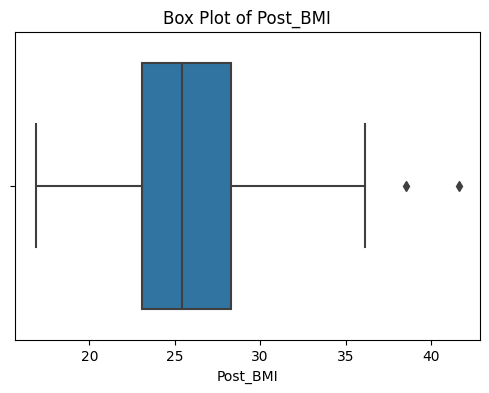

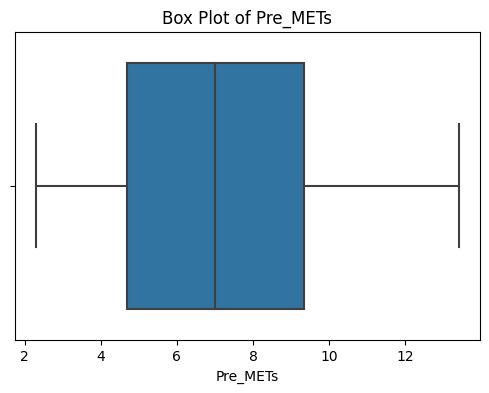

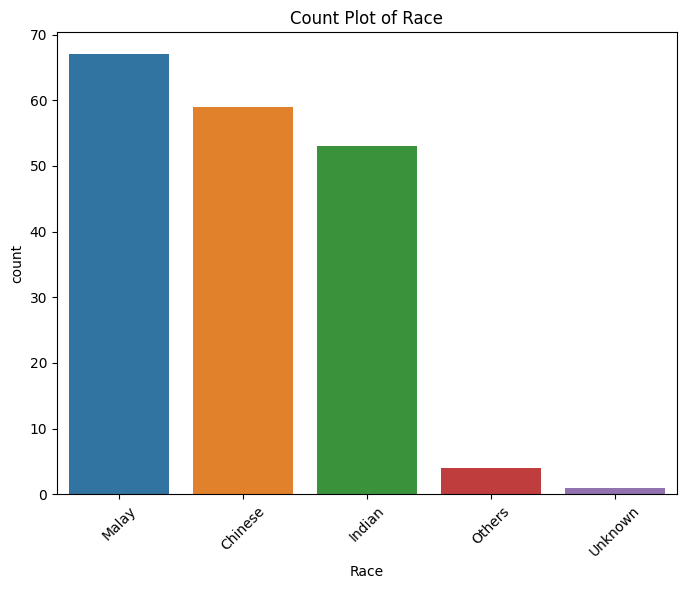

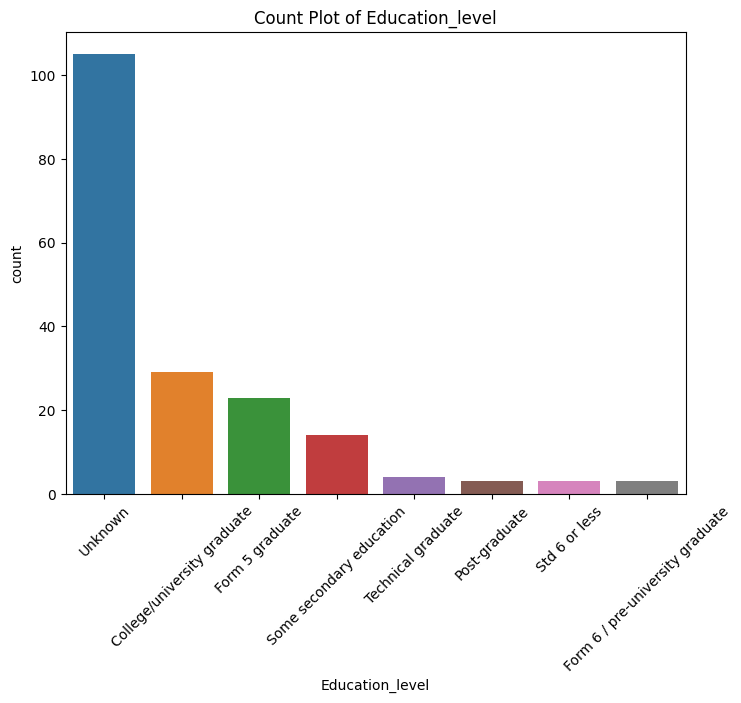

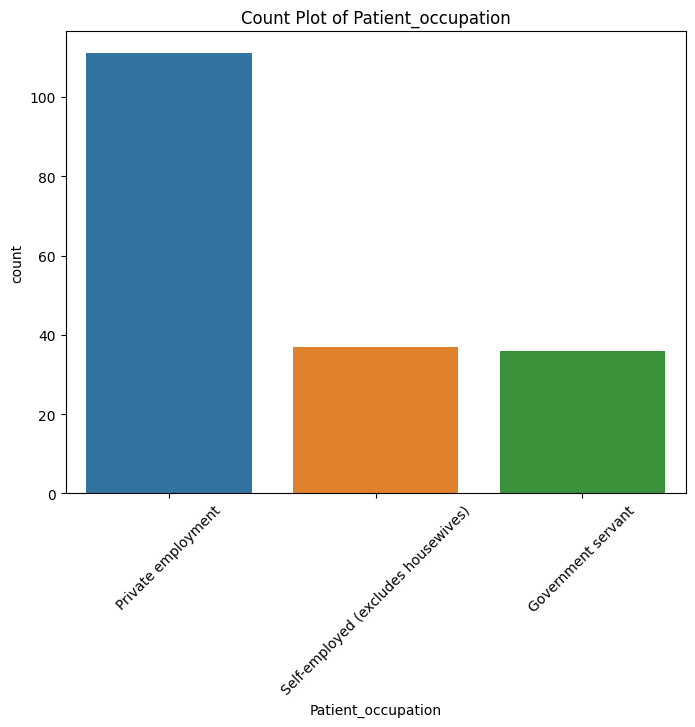

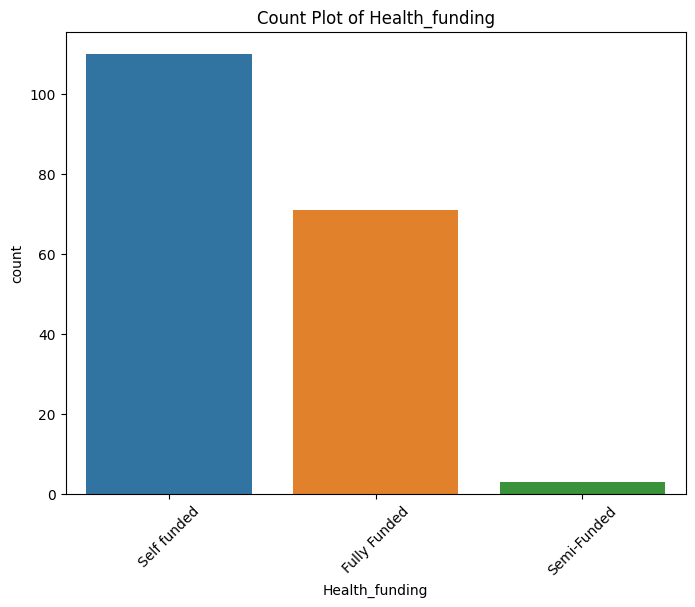

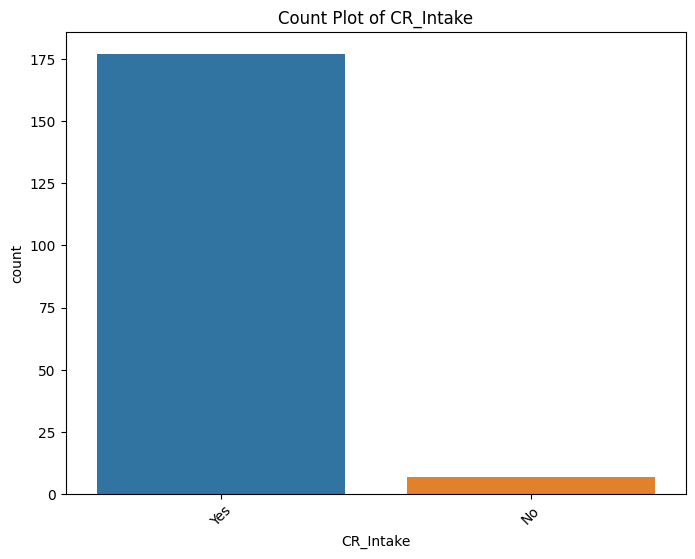

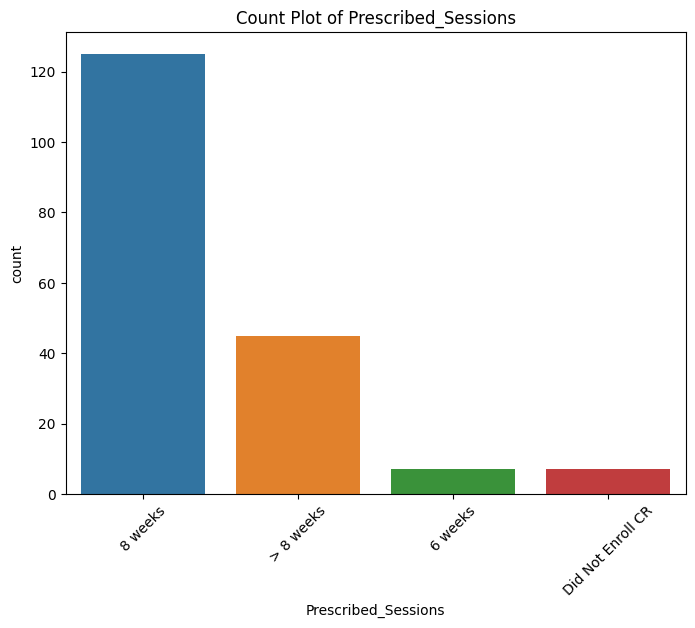

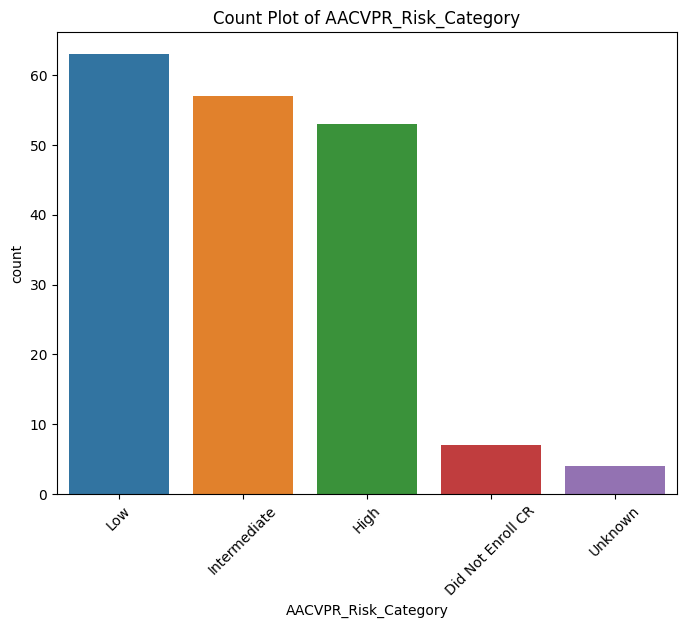

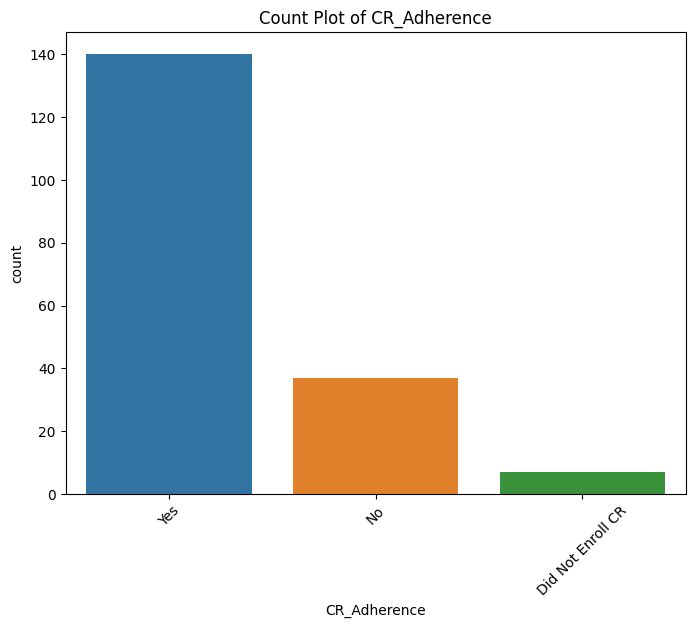

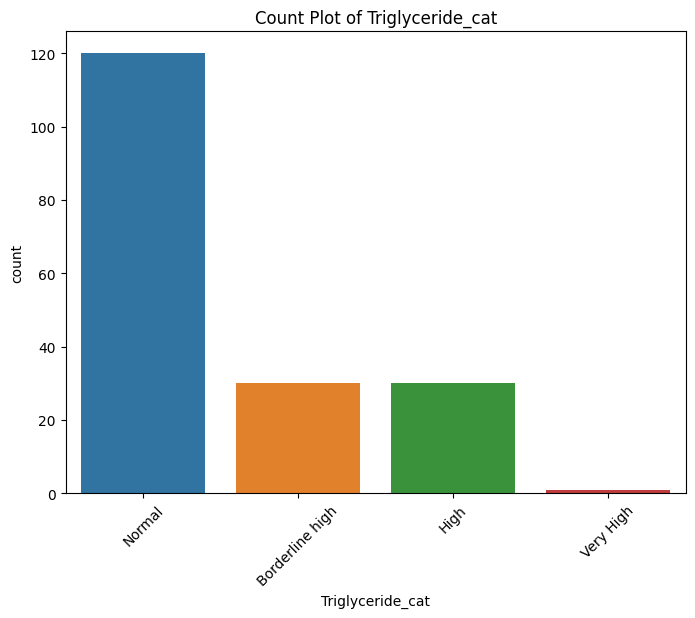

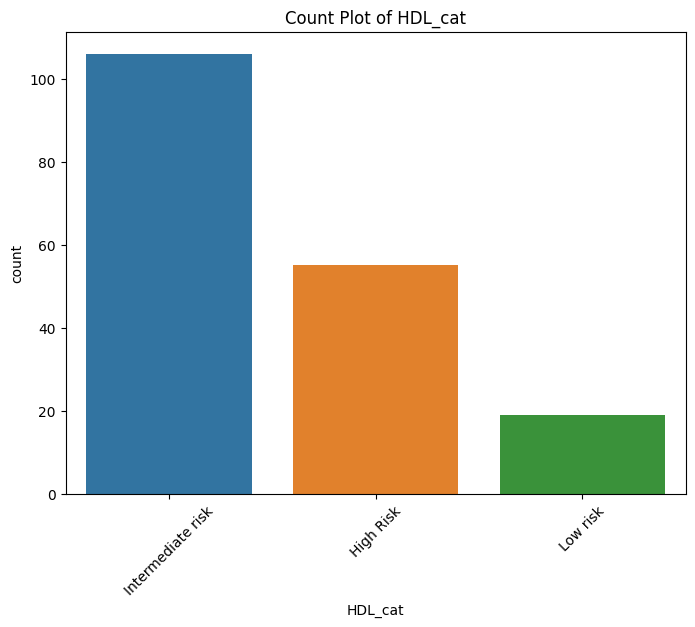

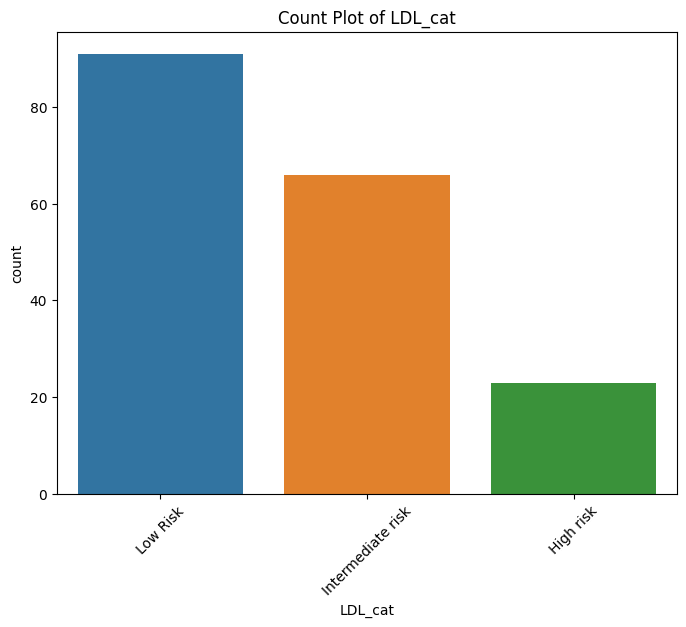

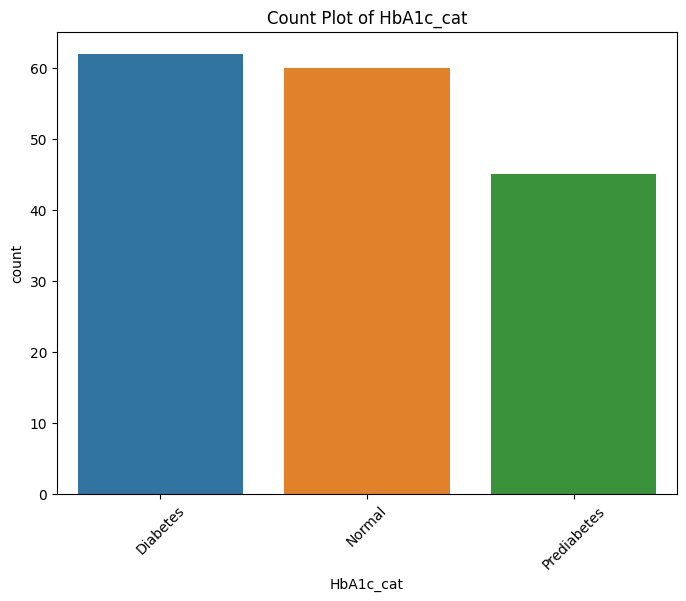

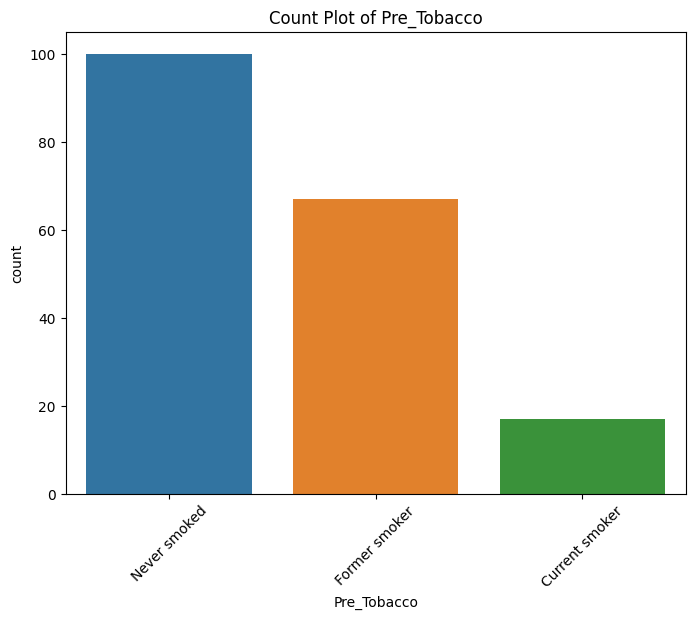

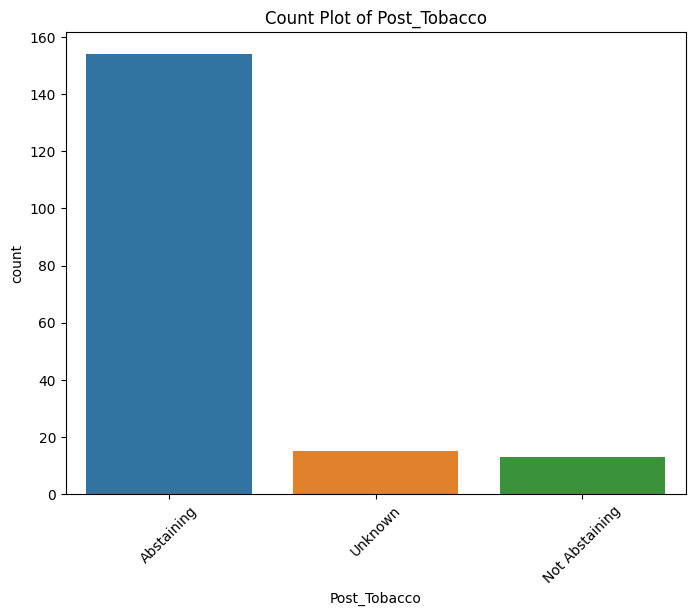

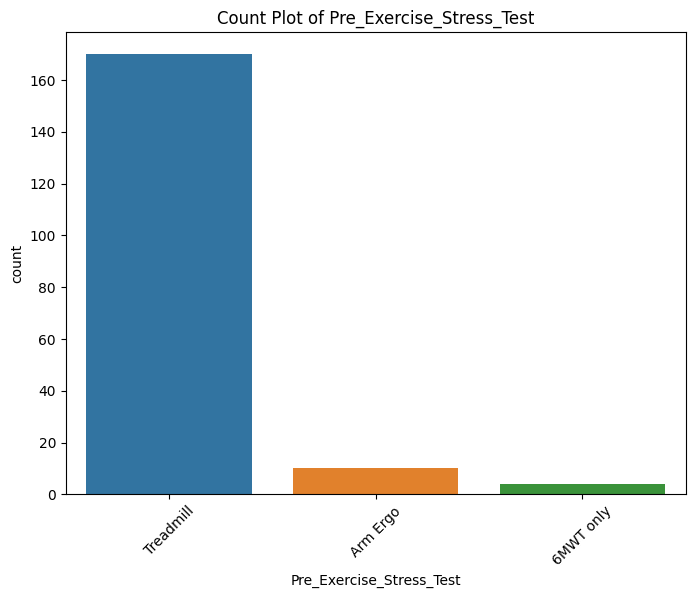

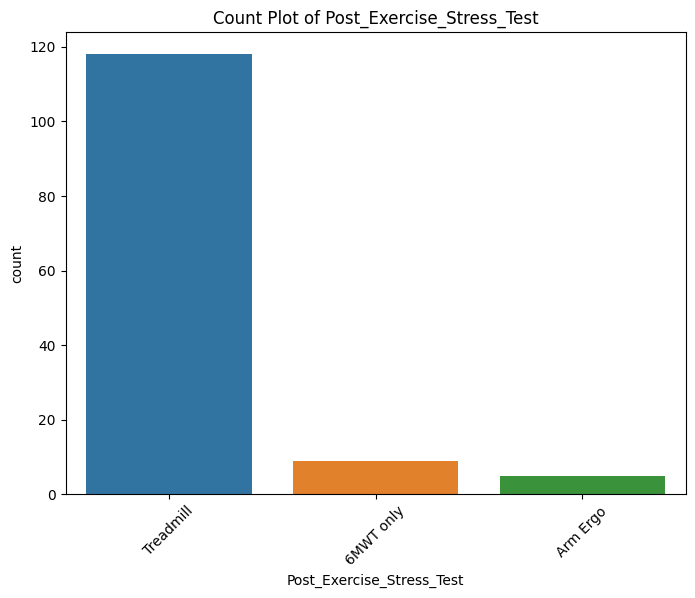

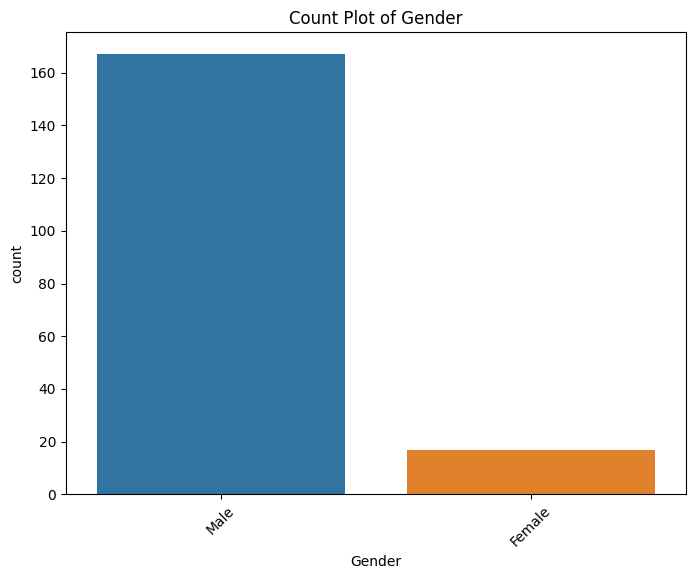

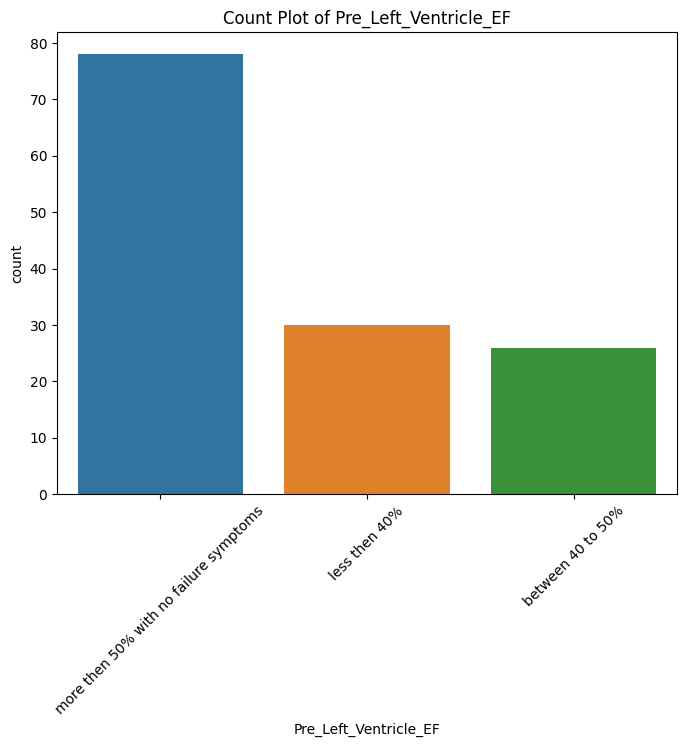

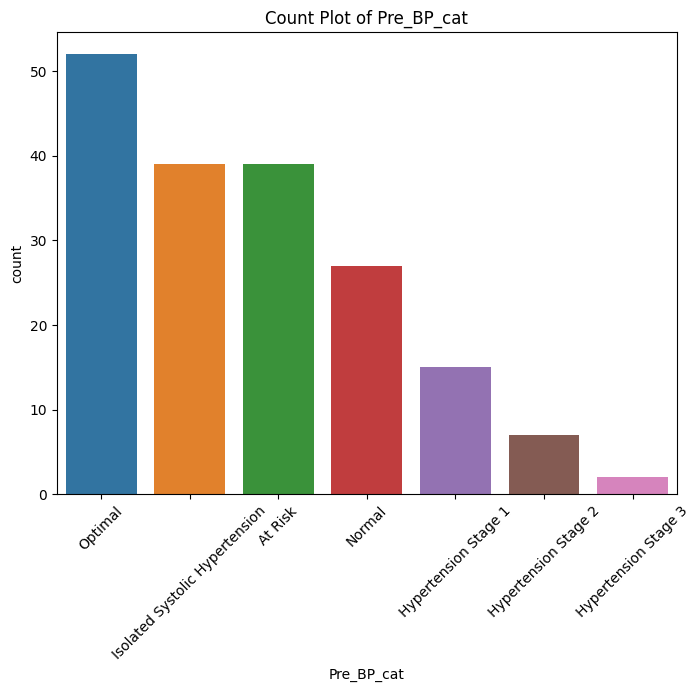

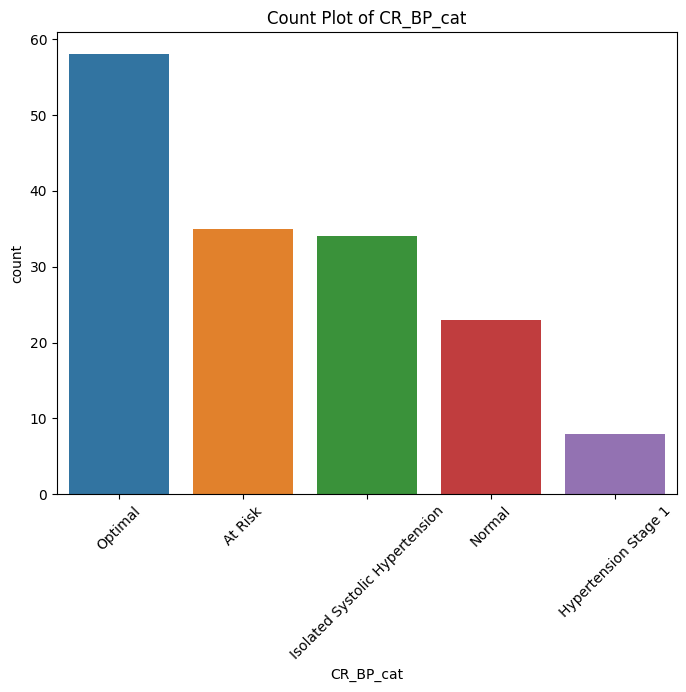

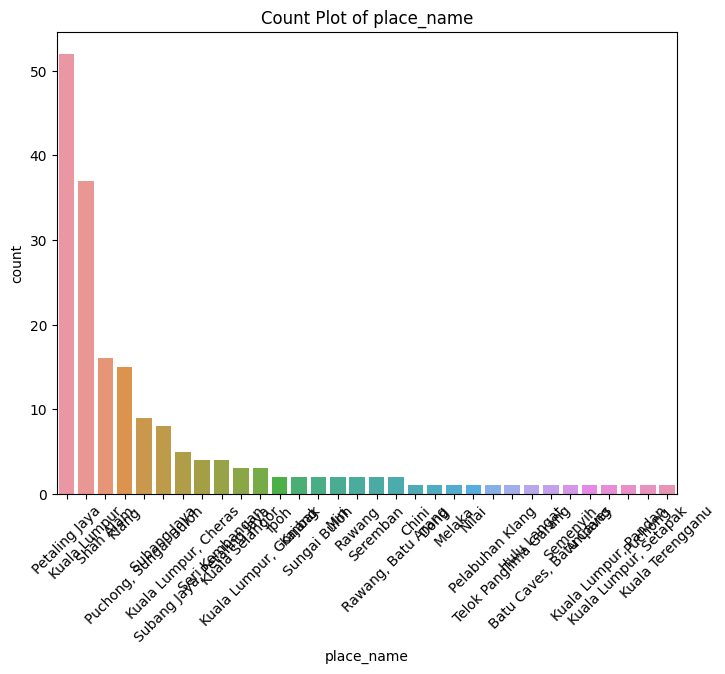

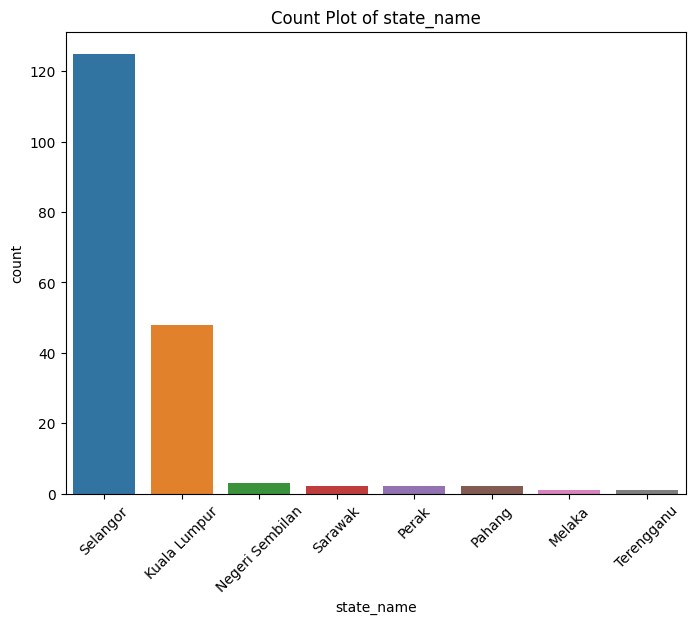

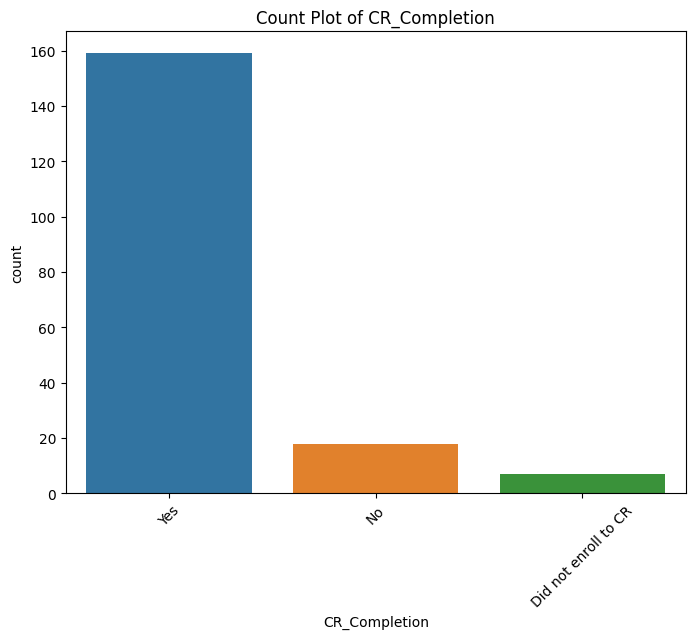

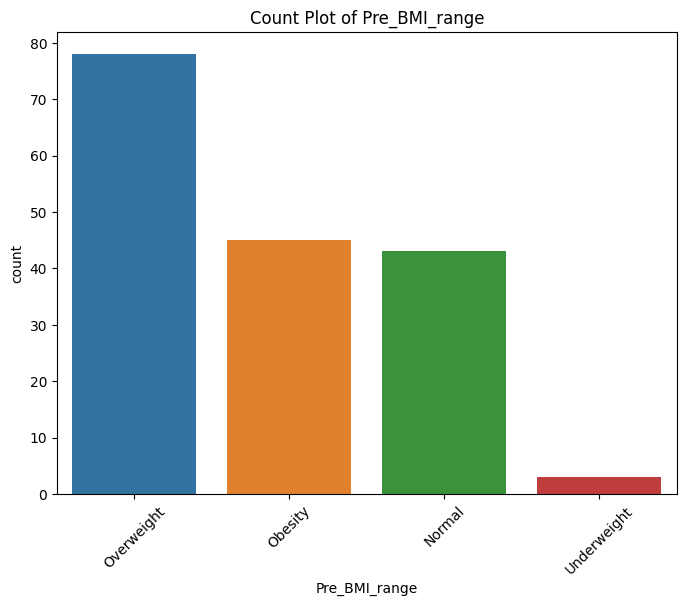

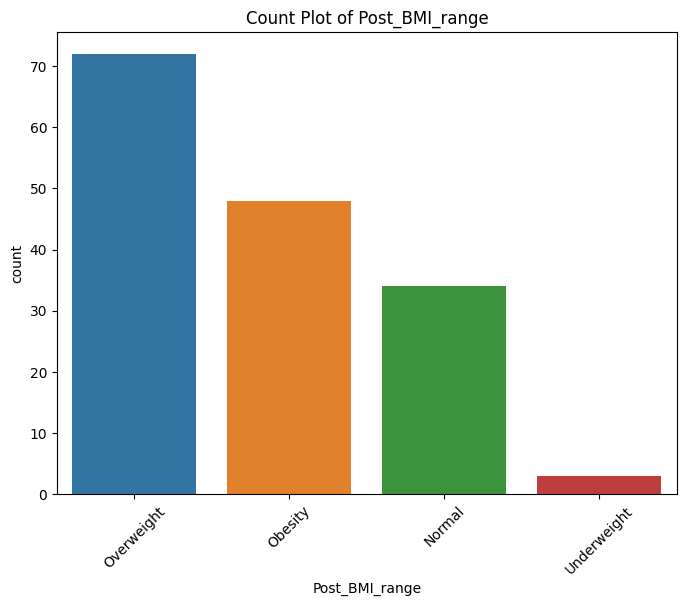

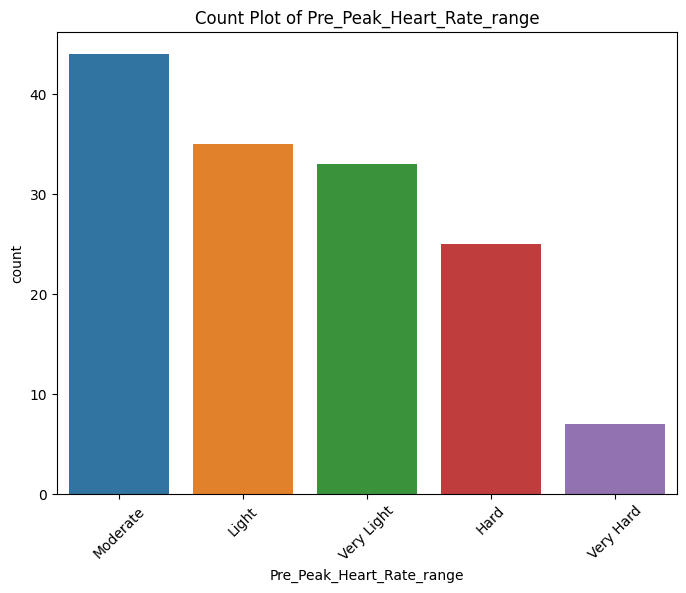

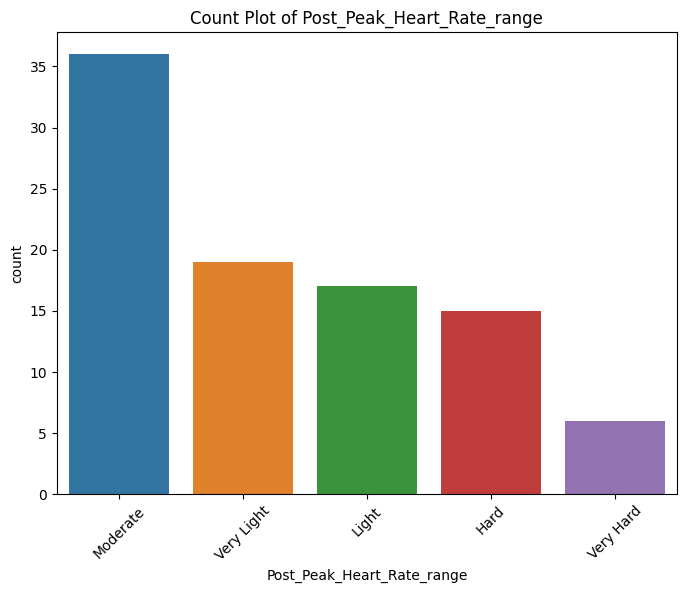

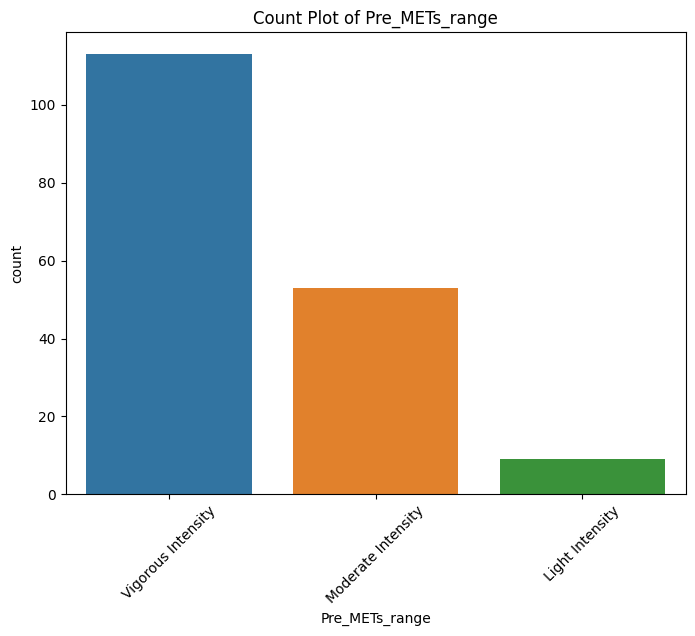

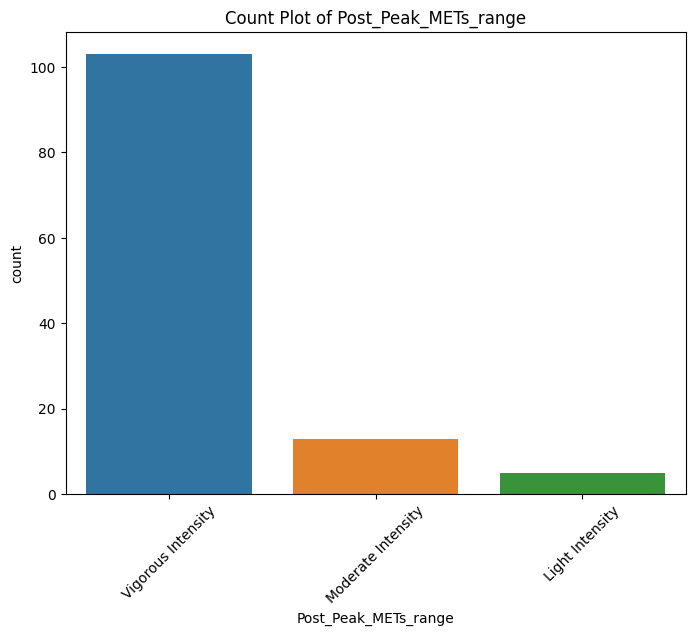

In [ ]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Data distribution for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])
for feature in numerical_features.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Box plots for numerical features
for feature in numerical_features.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

# Count plots for categorical features
categorical_features = df.select_dtypes(include=['object'])
for feature in categorical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)
    plt.show()


# Find Outlier using Interquartile Range Method

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# Replace 'Pre_Weight' with the actual column name if it's different
pre_weight_column = df['Pre_Weight']

# Calculate the IQR (Interquartile Range)
Q1 = pre_weight_column.quantile(0.25)
Q3 = pre_weight_column.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(pre_weight_column < lower_bound) | (pre_weight_column > upper_bound)]

# Display row number and value for each outlier
print("Outliers in Pre_Weight:")
for index, row in outliers.iterrows():
    print(f"Row {index}: {row['Pre_Weight']}")


Outliers in Pre_Weight:
Row 18: 0.9594383775351016
Row 109: 0.9875195007800313
Row 144: 1.0


In [ ]:
# Assuming df is your DataFrame
# Replace 'Pre_Weight' with the actual column name if it's different

# Change the value in row 67 to 73.07
df.at[113, 'Pre_Weight'] = 73.07

In [ ]:
# Assuming df is your DataFrame
# Replace 'df' with your actual DataFrame

import pandas as pd

# Extract the 'Pre_BMI' column
pre_bmi_column = df['Pre_BMI']

# Calculate the IQR (Interquartile Range)
Q1 = pre_bmi_column.quantile(0.25)
Q3 = pre_bmi_column.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(pre_bmi_column < lower_bound) | (pre_bmi_column > upper_bound)]

# Display the rows with outliers in 'Pre_BMI'
print("Outliers in Pre_BMI:")
print(outliers[['Pre_BMI']])


Outliers in Pre_BMI:
      Pre_BMI
18   1.000000
20   0.703508
51   0.666668
54   0.655564
75   0.749312
109  0.712080
144  0.706498


In [ ]:
# Display the value in the "Pre_BMI" column for row 67
pre_bmi_value_row_113 = df.at[113, 'Pre_BMI']
print(f"Pre_BMI value for row 113: {pre_bmi_value_row_113}")

Pre_BMI value for row 113: 2413.462808825472


In [ ]:
# Assuming df is your DataFrame
# Replace 'Pre_BMI' with the actual column name if it's different

# Set the value in the "Pre_BMI" column for row 67 to NaN
df.at[113, 'Pre_BMI'] = float('nan')  # or np.nan


In [ ]:
# Assuming df is your DataFrame
# Replace 'Pre_BP_diastolic' with the actual column name if it's different
pre_bp_diastolic_column = df['Pre_BP_diastolic']

# Calculate the IQR (Interquartile Range)
Q1 = pre_bp_diastolic_column.quantile(0.25)
Q3 = pre_bp_diastolic_column.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(pre_bp_diastolic_column < lower_bound) | (pre_bp_diastolic_column > upper_bound)]

# Display row number and value for each outlier
print("Outliers in Pre_BP_diastolic:")
for index, row in outliers.iterrows():
    print(f"Row {index}: {row['Pre_BP_diastolic']}")


Outliers in Pre_BP_diastolic:
Row 3: 702.0


In [ ]:
# Assuming df is your DataFrame
# Replace 'Pre_BP_diastolic' with the actual column name if it's different

# Replace the outlier with 72.0
df.at[3, 'Pre_BP_diastolic'] = 72.0

<ipython-input-108-28376a35e7ad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


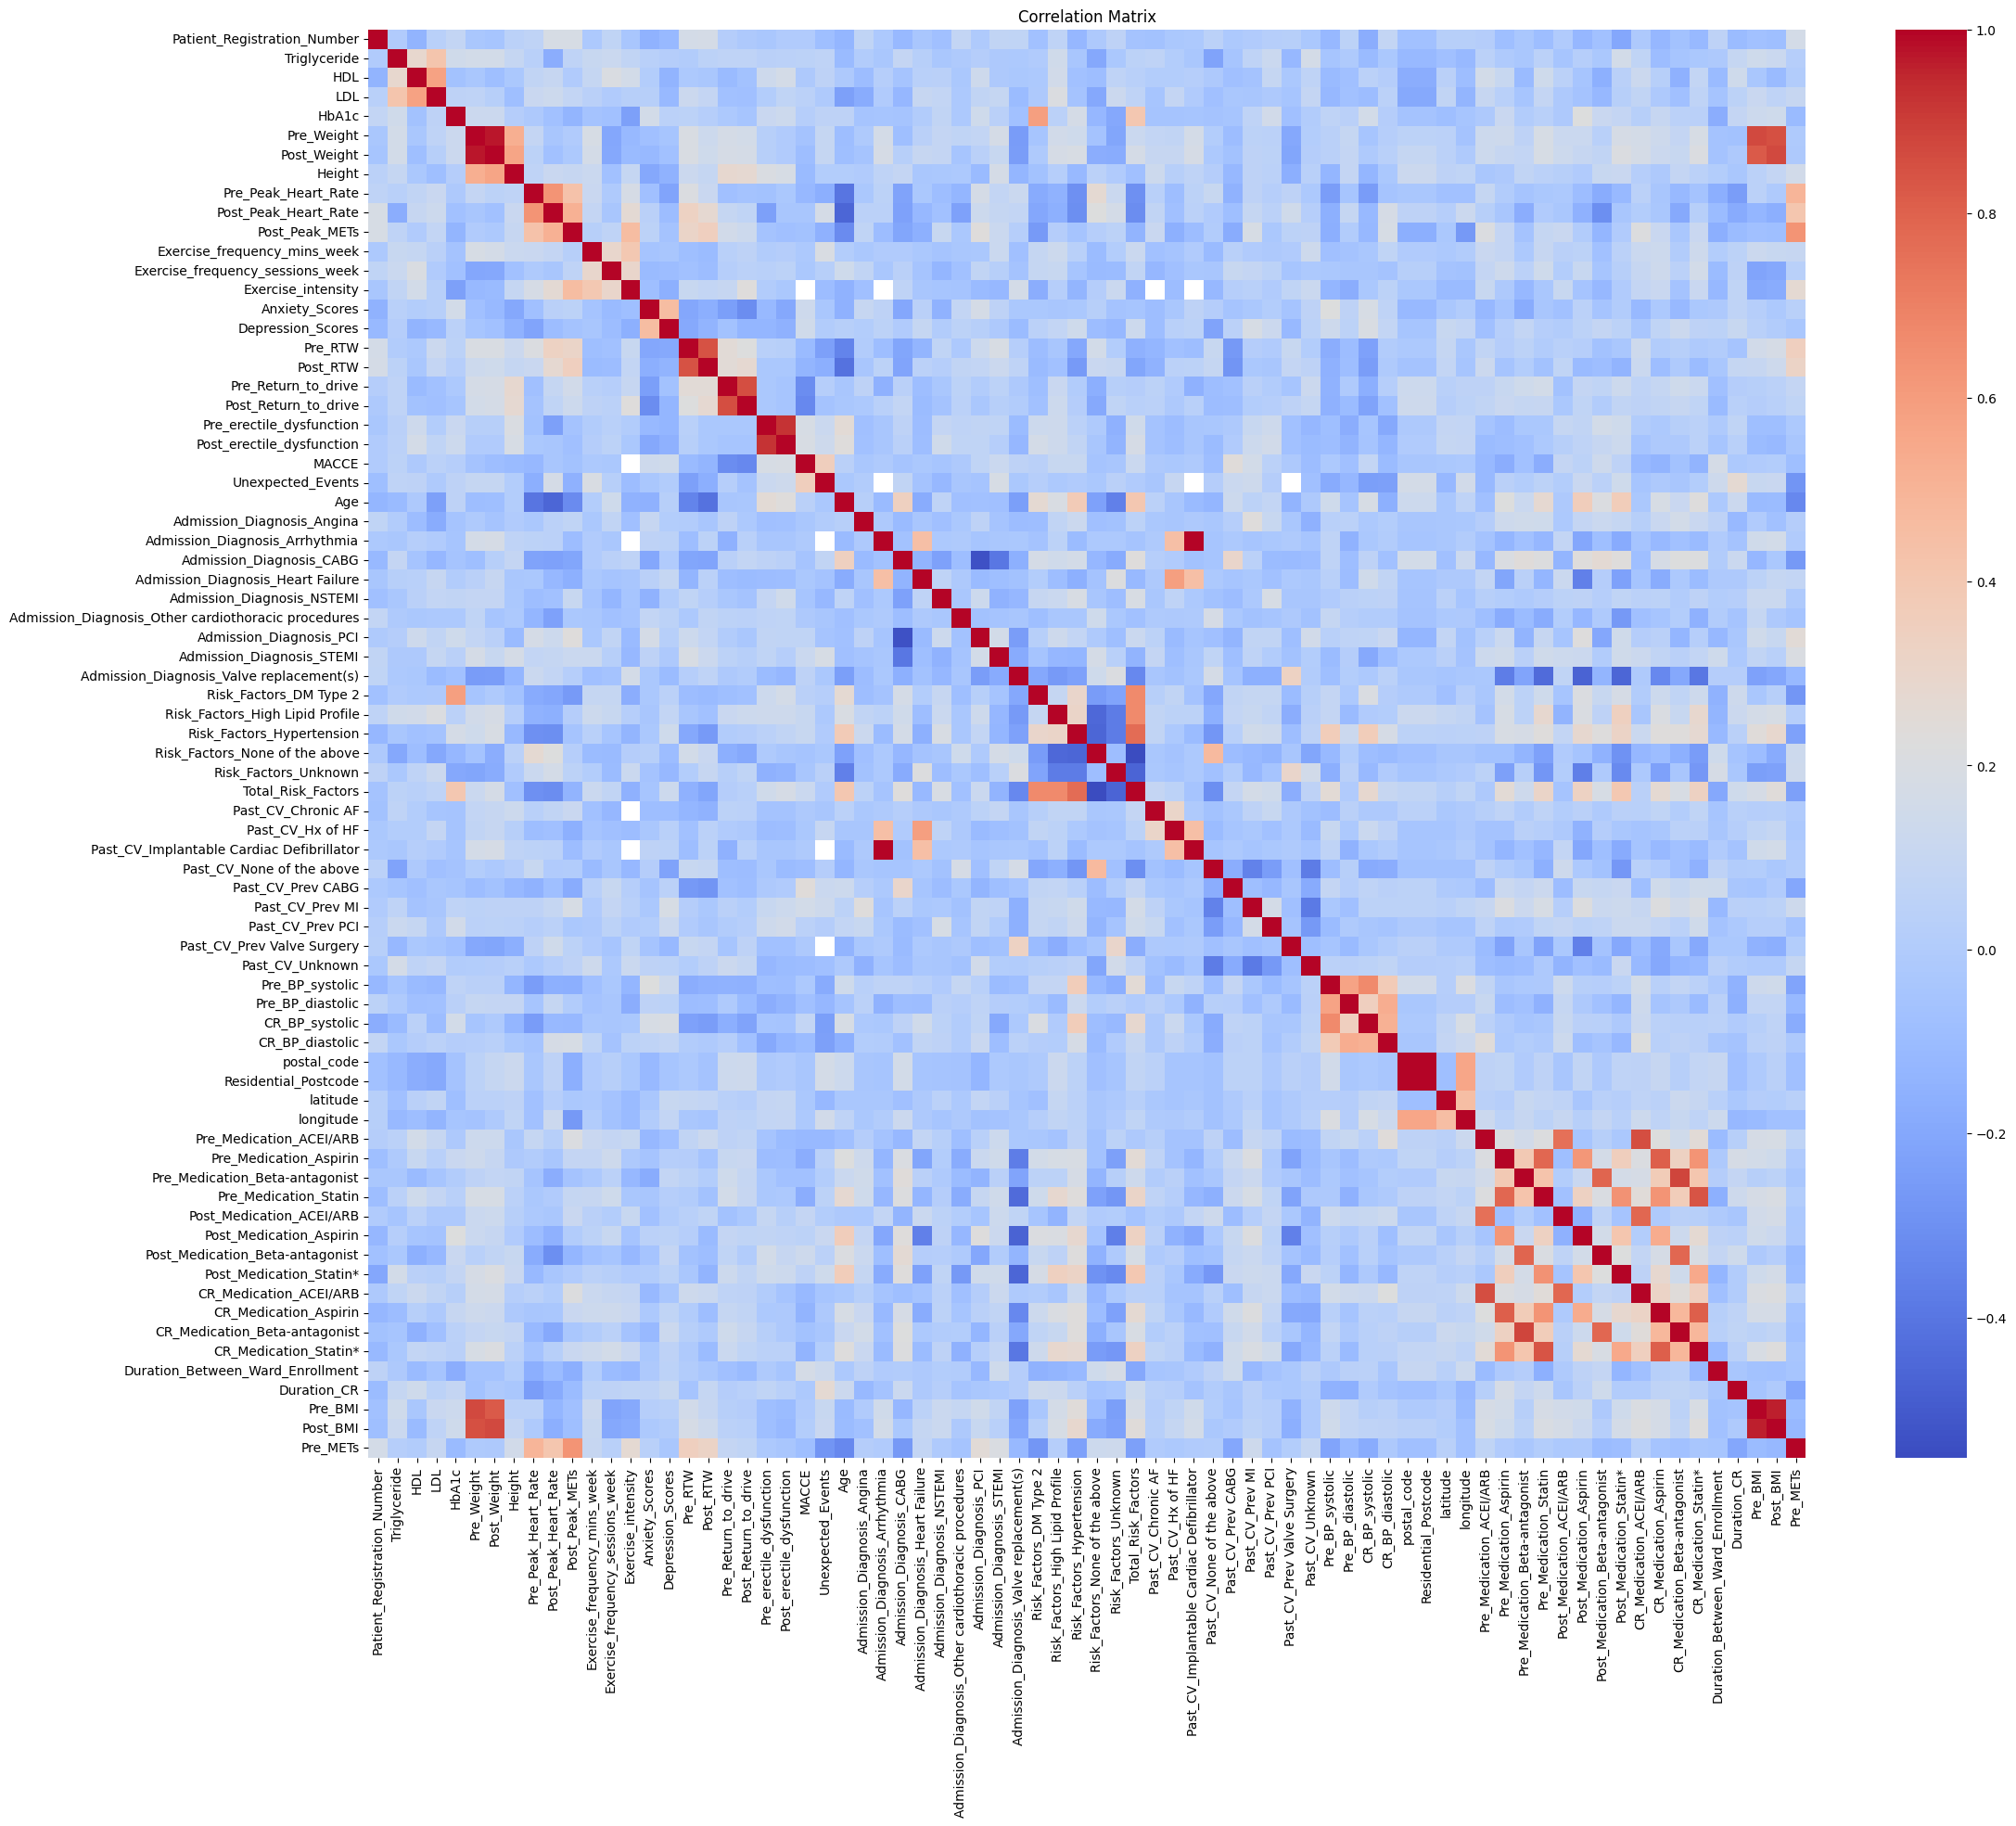

In [ ]:
# Visualize the correlation matrix with a heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Create a copy of df as df2
df2 = df.copy()

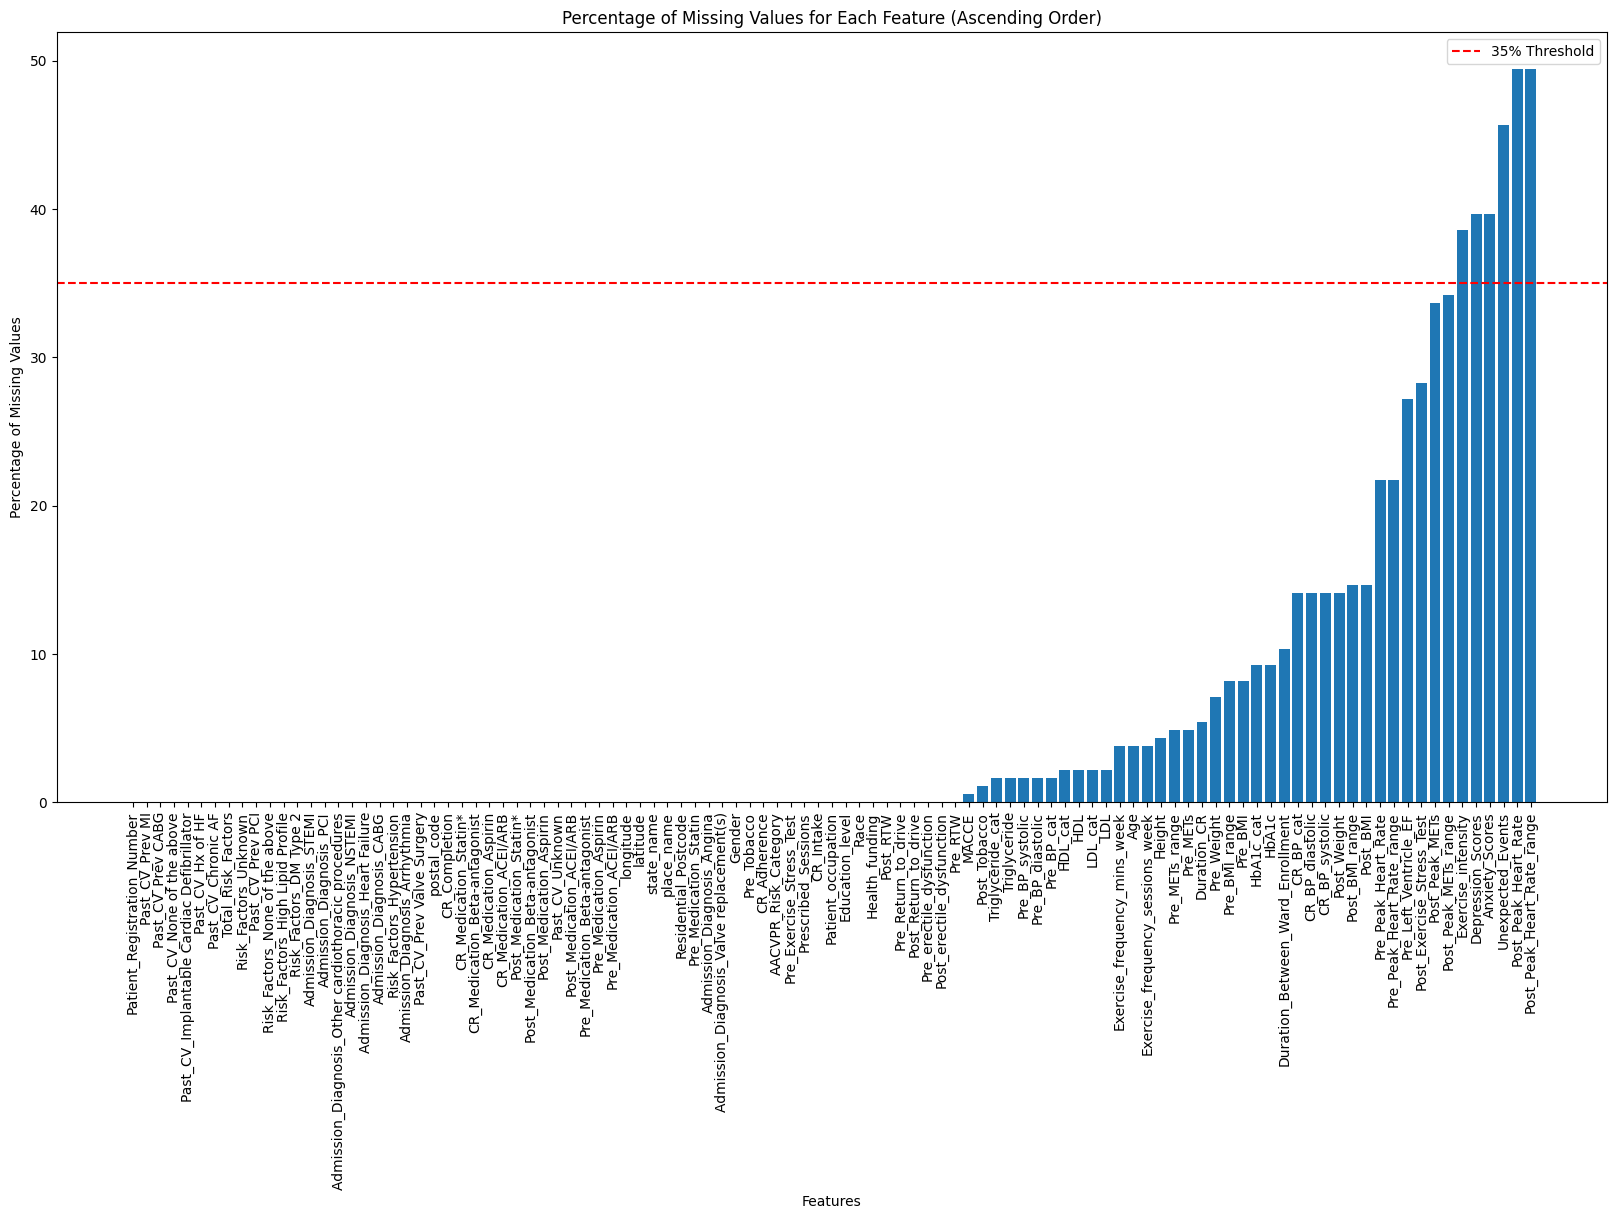


Variables with missing values above 35% threshold:
['Exercise_intensity', 'Depression_Scores', 'Anxiety_Scores', 'Unexpected_Events', 'Post_Peak_Heart_Rate', 'Post_Peak_Heart_Rate_range']


In [ ]:
import matplotlib.pyplot as plt

# Set the threshold for missing values
threshold = 35

# Calculate the percentage of missing values for each feature
missing_percentage = (df2.isnull().sum() / len(df)) * 100

# Sort features based on the percentage of missing values in ascending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plt.bar(missing_percentage_sorted.index, missing_percentage_sorted.values)
plt.axhline(y=threshold, linestyle='--', color='red', label=f'{threshold}% Threshold')  # Add a horizontal line at the threshold
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values for Each Feature (Ascending Order)')
plt.legend()  # Show the legend
plt.show()

# Print variable names with missing values above the threshold
above_threshold = missing_percentage_sorted[missing_percentage_sorted > threshold]
print(f"\nVariables with missing values above {threshold}% threshold:")
print(above_threshold.index.tolist())


In [ ]:
# Calculate the number of missing values for each feature
missing_values = df2.isnull().sum()

# Filter features with missing values
missing_features = missing_values[missing_values > 0]

# Display missing values for each feature in ascending order
missing_features_sorted = missing_features.sort_values(ascending=True)
for feature, value in missing_features_sorted.items():
    print(f"{feature}: {value} missing")

# Display total number of missing values
total_missing = missing_values.sum()
print(f"\nTotal Missing Values: {total_missing}")


MACCE: 1 missing
Post_Tobacco: 2 missing
Triglyceride: 3 missing
Triglyceride_cat: 3 missing
Pre_BP_cat: 3 missing
Pre_BP_diastolic: 3 missing
Pre_BP_systolic: 3 missing
HDL: 4 missing
HDL_cat: 4 missing
LDL: 4 missing
LDL_cat: 4 missing
Age: 7 missing
Exercise_frequency_mins_week: 7 missing
Exercise_frequency_sessions_week: 7 missing
Height: 8 missing
Pre_METs: 9 missing
Pre_METs_range: 9 missing
Duration_CR: 10 missing
Pre_Weight: 13 missing
Pre_BMI: 15 missing
Pre_BMI_range: 15 missing
HbA1c_cat: 17 missing
HbA1c: 17 missing
Duration_Between_Ward_Enrollment: 19 missing
CR_BP_cat: 26 missing
CR_BP_diastolic: 26 missing
Post_Weight: 26 missing
CR_BP_systolic: 26 missing
Post_BMI: 27 missing
Post_BMI_range: 27 missing
Pre_Peak_Heart_Rate_range: 40 missing
Pre_Peak_Heart_Rate: 40 missing
Pre_Left_Ventricle_EF: 50 missing
Post_Exercise_Stress_Test: 52 missing
Post_Peak_METs: 62 missing
Post_Peak_METs_range: 63 missing
Exercise_intensity: 71 missing
Anxiety_Scores: 73 missing
Depression_S

In [ ]:
category_counts = df2['AACVPR_Risk_Category'].value_counts()
print(category_counts)

Low                  63
Intermediate         57
High                 53
Did Not Enroll CR     7
Unknown               4
Name: AACVPR_Risk_Category, dtype: int64


In [ ]:
# Remove rows from df2 that belong to the "Did Not Enroll CR" and "Unknown" categories
categories_to_remove = ["Did Not Enroll CR", "Unknown"]
df2 = df2[~df2['AACVPR_Risk_Category'].isin(categories_to_remove)]

In [ ]:
# Assuming df2 is your DataFrame
target_column_macce = 'MACCE'

# Calculate the mode of the 'MACCE' column
macce_mode = df2[target_column_macce].mode().values[0]

# Fill in missing values in 'MACCE' with the mode
df2[target_column_macce].fillna(macce_mode, inplace=True)


<ipython-input-114-3cde83b15d15>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[target_column_macce].fillna(macce_mode, inplace=True)


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Define the features to impute
features_to_impute = ['Triglyceride', 'HDL', 'LDL']  # Add the features you want to impute

# Create a SimpleImputer with the 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Apply imputation to the selected features
df2[features_to_impute] = imputer.fit_transform(df2[features_to_impute])

# Round the imputed values to 2 decimal places
df2[features_to_impute] = df2[features_to_impute].round(2)

<ipython-input-115-82068aa3c77d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[features_to_impute] = imputer.fit_transform(df2[features_to_impute])
<ipython-input-115-82068aa3c77d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[features_to_impute] = df2[features_to_impute].round(2)


In [ ]:
# Find the unique values of the 'Post_Tobacco' feature in df2
post_tobacco_unique_values_df2 = df2['Post_Tobacco'].unique()

# Display the unique values in df2
print("Unique values of Post_Tobacco feature in df2:")
print(post_tobacco_unique_values_df2)

# Find the mode of the 'Post_Tobacco' feature in df2
post_tobacco_mode_df2 = df2['Post_Tobacco'].mode()

# Display the mode in df2
print("\nMode of Post_Tobacco feature in df2:")
print(post_tobacco_mode_df2)

# Count the number of missing values in the 'Post_Tobacco' feature in df2
missing_values_count_df2 = df2['Post_Tobacco'].isnull().sum()

# Display the number of missing values in df2
print("\nNumber of missing values in Post_Tobacco feature in df2:", missing_values_count_df2)

Unique values of Post_Tobacco feature in df2:
['Abstaining' nan 'Not Abstaining' 'Unknown']

Mode of Post_Tobacco feature in df2:
0    Abstaining
Name: Post_Tobacco, dtype: object

Number of missing values in Post_Tobacco feature in df2: 2


In [ ]:
# Fill NaN values with 'unknown' in the 'Post_Tobacco' feature in df2
df2['Post_Tobacco'].fillna('unknown', inplace=True)

<ipython-input-117-cc5f5a734b52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Post_Tobacco'].fillna('unknown', inplace=True)


In [ ]:
# Calculate the mean of the 'Age' feature
mean_age = df2['Age'].mean()

# Display the mean
print("Mean Age:", mean_age)

# Fill missing values with the mean and round to the nearest round number
df2['Age'].fillna(mean_age, inplace=True)
df2['Age'] = df2['Age'].round()

Mean Age: 53.98802395209581


<ipython-input-118-1f57aa3722e4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'].fillna(mean_age, inplace=True)
<ipython-input-118-1f57aa3722e4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'] = df2['Age'].round()


In [ ]:
# Find the top 3 correlated features with 'Pre_METs'
top_correlated_features = correlation_matrix['Pre_METs'].sort_values(ascending=False)[1:6]

# Display the top 3 correlated features
print("Top 3 correlated features with 'Pre_METs':")
print(top_correlated_features)

Top 3 correlated features with 'Pre_METs':
Post_Peak_METs          0.633960
Pre_Peak_Heart_Rate     0.493298
Post_Peak_Heart_Rate    0.410899
Pre_RTW                 0.345833
Post_RTW                0.317216
Name: Pre_METs, dtype: float64


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Assuming df2 is your DataFrame
df_copy = df2.copy()

# Print the number of missing values for 'Pre_METs' before imputation
missing_values_before_imputation = df_copy['Pre_METs'].isnull().sum()
print(f"Number of missing values for 'Pre_METs' before imputation: {missing_values_before_imputation}")

# Select the first 5 features for imputation
features_for_imputation = ['Post_Peak_METs', 'Post_Peak_Heart_Rate', 'Pre_Peak_Heart_Rate','Post_RTW', 'Post_RTW']

# Split the data into sets with missing and non-missing 'Pre_METs'
df_missing = df_copy[df_copy['Pre_METs'].isnull()]
df_not_missing = df_copy.dropna(subset=['Pre_METs'])

# Separate features and target for the training set
X_train = df_not_missing[features_for_imputation]
y_train = df_not_missing['Pre_METs']

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=features_for_imputation)

# Train a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_imputed, y_train)

# Impute missing values in 'Pre_METs' using the fitted model
X_missing_imputed = pd.DataFrame(imputer.transform(df_missing[features_for_imputation]), columns=features_for_imputation)
imputed_values = model.predict(X_missing_imputed)

# Round the imputed values to one decimal place
imputed_values = imputed_values.round(1)

# Fill in the missing values in 'Pre_METs' in the original DataFrame (df2)
df2.loc[df2['Pre_METs'].isnull(), 'Pre_METs'] = imputed_values

# Print the number of missing values for 'Pre_METs' after imputation
missing_values_after_imputation = df2['Pre_METs'].isnull().sum()
print(f"Number of missing values for 'Pre_METs' after imputation: {missing_values_after_imputation}")

# Calculate the correlation coefficients with the imputed 'Pre_METs'
correlations_pre_mets_imputed_4_variables = df2.corr()['Pre_METs'].sort_values(ascending=False)

# Display the top 4 correlated features
top_correlated_features_4_variables = correlations_pre_mets_imputed_4_variables[1:6]  # Exclude 'Pre_METs' itself
print("Top 4 variables related to 'Pre_METs' (imputed) using 4 variables and their correlation coefficients:")
print(top_correlated_features_4_variables)


Number of missing values for 'Pre_METs' before imputation: 6
Number of missing values for 'Pre_METs' after imputation: 0
Top 4 variables related to 'Pre_METs' (imputed) using 4 variables and their correlation coefficients:
Post_Peak_METs          0.613828
Pre_Peak_Heart_Rate     0.484565
Post_Peak_Heart_Rate    0.419591
Pre_RTW                 0.320971
Post_RTW                0.295236
Name: Pre_METs, dtype: float64


<ipython-input-120-716749d4db2f>:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_pre_mets_imputed_4_variables = df2.corr()['Pre_METs'].sort_values(ascending=False)


In [ ]:
# Calculate the median for 'Exercise_frequency_sessions_week'
median_sessions = df2['Exercise_frequency_sessions_week'].median()

# Fill missing values with the median
df2['Exercise_frequency_sessions_week'].fillna(median_sessions, inplace=True)

In [ ]:
# Calculate the mean for 'Height' and round to one decimal place
mean_height = round(df2['Height'].mean(), 1)

# Display the mean value
print("Mean Height (rounded to one decimal place):", mean_height)

# Fill missing values with the rounded mean
df2['Height'].fillna(mean_height, inplace=True)

Mean Height (rounded to one decimal place): 165.5


In [ ]:
# Calculate the median for 'Exercise_frequency_mins_week' and round to the nearest whole number
rounded_median_minutes = round(df2['Exercise_frequency_mins_week'].median())

# Display the rounded median value
print("Rounded Median for Exercise_frequency_mins_week:", rounded_median_minutes)

# Fill missing values with the rounded median
df2['Exercise_frequency_mins_week'].fillna(rounded_median_minutes, inplace=True)

Rounded Median for Exercise_frequency_mins_week: 30


In [ ]:
# Calculate the median for 'Duration_CR' and round to the nearest whole number
rounded_median_duration_cr = round(df2['Duration_CR'].median())

# Display the rounded median value
print("Rounded Median Duration_CR:", rounded_median_duration_cr)

# Fill missing values with the rounded median
df2['Duration_CR'].fillna(rounded_median_duration_cr, inplace=True)

Rounded Median Duration_CR: 98


In [ ]:
# Get the top 5 features with the highest correlation coefficients with 'Pre_Weight'
top_correlated_features = correlation_matrix['Pre_Weight'].abs().sort_values(ascending=False)[1:6]

# Display the top 5 correlated features
print("Top 5 highly correlated features with 'Pre_Weight':")
print(top_correlated_features)

Top 5 highly correlated features with 'Pre_Weight':
Post_Weight                                 0.970535
Pre_BMI                                     0.869262
Post_BMI                                    0.849233
Height                                      0.525474
Admission_Diagnosis_Valve replacement(s)    0.250937
Name: Pre_Weight, dtype: float64


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming df2 is your DataFrame
selected_features = ['Post_Weight', 'Pre_BMI', 'Post_BMI', 'Height']

# Impute missing values in the selected features using the mean strategy
imputer = SimpleImputer(strategy='mean')
df2_imputed = df2.copy()
df2_imputed[selected_features] = imputer.fit_transform(df2_imputed[selected_features])

# Create a DataFrame with non-missing values for the relevant variables
df2_train = df2_imputed.dropna(subset=['Pre_Weight'] + selected_features)

# Split the data into predictors (X) and target variable (y)
X_train = df2_train[selected_features]
y_train = df2_train['Pre_Weight']

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Identify records with missing 'Pre_Weight' in df2
df2_missing = df2[df2['Pre_Weight'].isnull()]

# Impute missing values in the selected features for the missing 'Pre_Weight' records
df2_missing_imputed = df2_missing.copy()
df2_missing_imputed[selected_features] = imputer.transform(df2_missing_imputed[selected_features])

# Use the model to predict missing values
X_missing = df2_missing_imputed[selected_features]
df2_missing_imputed['Pre_Weight_Imputed'] = model.predict(X_missing)

# Display only the imputed values
imputed_values = df2_missing_imputed['Pre_Weight_Imputed'].values
print("Imputed Values:")
print(imputed_values)

# Replace missing values in df2 with imputed values
df2['Pre_Weight'].fillna(df2_missing_imputed['Pre_Weight_Imputed'], inplace=True)


Imputed Values:
[71.4926279  69.5824336  69.5824336  69.5824336  65.54618347 68.72591585
 69.5824336  65.25787989 69.5824336  69.5824336 ]


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming df2 is your DataFrame
column_to_impute = 'Duration_Between_Ward_Enrollment'

# Impute missing values in 'Duration_Between_Ward_Enrollment' using the median
imputer = SimpleImputer(strategy='median')
df2[column_to_impute].fillna(imputer.fit_transform(df2[[column_to_impute]])[0][0], inplace=True)

In [ ]:
column_to_impute = 'Pre_BMI'

# Check if 'Pre_Weight' and 'Height' are available
if 'Pre_Weight' in df2.columns and 'Height' in df2.columns:
    # Convert height from cm to meters
    df2['Height_meters'] = df2['Height'] / 100

    # Calculate BMI using the formula: BMI = weight / (height^2)
    df2[column_to_impute] = df2['Pre_Weight'] / (df2['Height_meters'] ** 2)

    # Drop the temporary 'Height_meters' column
    df2.drop('Height_meters', axis=1, inplace=True)

# Display only the imputed values for 'Pre_BMI'
print("\nImputed 'Pre_BMI' values:")
print(df2.loc[df2[column_to_impute].notnull(), [column_to_impute]])


Imputed 'Pre_BMI' values:
       Pre_BMI
0    21.224490
1    18.814964
2    28.341779
3    21.781451
4    20.704457
..         ...
179  29.307958
180  22.942130
181  22.026035
182  30.664062
183  19.027399

[173 rows x 1 columns]


In [ ]:
# Assuming df2 is your DataFrame
correlation_matrix_hba1c = df2.corr()

# Get the top 5 correlated features with 'HbA1c'
top_correlated_features_hba1c = correlation_matrix_hba1c['HbA1c'].abs().sort_values(ascending=False).head(6)[1:]

print("Top 5 Correlated Features with HbA1c:")
print(top_correlated_features_hba1c)


Top 5 Correlated Features with HbA1c:
Risk_Factors_DM Type 2     0.581228
Total_Risk_Factors         0.382723
Exercise_intensity         0.243526
Post_Medication_Aspirin    0.229830
Risk_Factors_Unknown       0.200540
Name: HbA1c, dtype: float64


<ipython-input-129-67c58b62f1af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_hba1c = df2.corr()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming df2 is your DataFrame
target_column = 'HbA1c'
correlated_features = ['Risk_Factors_DM Type 2', 'Total_Risk_Factors', 'Exercise_intensity', 'Post_Medication_Aspirin', 'Risk_Factors_Unknown']

# Create a DataFrame with non-missing values for the relevant variables
df2_train_hba1c = df2.dropna(subset=[target_column] + correlated_features)

# Split the data into predictors (X) and target variable (y)
X_train_hba1c = df2_train_hba1c[correlated_features]
y_train_hba1c = df2_train_hba1c[target_column]

# Fit a linear regression model
model_hba1c = LinearRegression()
model_hba1c.fit(X_train_hba1c, y_train_hba1c)

# Identify records with missing 'HbA1c' in df2
df2_missing_hba1c = df2[df2[target_column].isnull()]

# Impute missing values in the correlated features for the missing 'HbA1c' records
df2_missing_imputed_hba1c = df2_missing_hba1c.copy()
df2_missing_imputed_hba1c[correlated_features] = df2_missing_imputed_hba1c[correlated_features].fillna(df2[correlated_features].median())

# Use the model to predict missing values
X_missing_hba1c = df2_missing_imputed_hba1c[correlated_features]
df2_missing_imputed_hba1c[target_column] = model_hba1c.predict(X_missing_hba1c)

# Display only the imputed values for 'HbA1c'
imputed_values_hba1c = df2_missing_imputed_hba1c[[target_column]]
print("Imputed Values for HbA1c:")
print(imputed_values_hba1c)

# Replace missing values in df2 with imputed values
df2[target_column].fillna(df2_missing_imputed_hba1c[target_column], inplace=True)


Imputed Values for HbA1c:
        HbA1c
8    5.628988
10   5.606747
41   5.513831
47   5.929976
66   5.744145
88   5.837061
93   5.513831
102  5.628988
134  4.903293
135  5.837061
157  5.513831
162  4.903293
165  5.744145
169  4.737646
180  5.018450


In [ ]:
# Assuming df2 is your DataFrame
correlation_matrix_diastolic = df2.corr()['CR_BP_diastolic'].abs().sort_values(ascending=False)
correlation_matrix_systolic = df2.corr()['CR_BP_systolic'].abs().sort_values(ascending=False)

# Display the top correlated features for each blood pressure measure
print("Top Correlated Features with CR_BP_diastolic:")
print(correlation_matrix_diastolic.head(6))

print("\nTop Correlated Features with CR_BP_systolic:")
print(correlation_matrix_systolic.head(6))


Top Correlated Features with CR_BP_diastolic:
CR_BP_diastolic            1.000000
CR_BP_systolic             0.557470
Pre_BP_diastolic           0.538357
Pre_BP_systolic            0.390742
Unexpected_Events          0.262549
Pre_Medication_ACEI/ARB    0.226041
Name: CR_BP_diastolic, dtype: float64

Top Correlated Features with CR_BP_systolic:
CR_BP_systolic               1.000000
Pre_BP_systolic              0.663471
CR_BP_diastolic              0.557470
Risk_Factors_Hypertension    0.397780
Pre_BP_diastolic             0.341180
Total_Risk_Factors           0.314355
Name: CR_BP_systolic, dtype: float64


<ipython-input-131-0e303b552a4a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_diastolic = df2.corr()['CR_BP_diastolic'].abs().sort_values(ascending=False)
<ipython-input-131-0e303b552a4a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_systolic = df2.corr()['CR_BP_systolic'].abs().sort_values(ascending=False)


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming df2 is your DataFrame
target_column_diastolic = 'CR_BP_diastolic'
correlated_features_systolic = ['CR_BP_systolic', 'Pre_BP_diastolic', 'Pre_BP_systolic', 'Unexpected_Events', 'Pre_Medication_ACEI/ARB']

# Create a DataFrame with non-missing values for the relevant variables
df2_train_diastolic = df2.dropna(subset=[target_column_diastolic] + correlated_features_systolic)

# Split the data into predictors (X) and target variable (y)
X_train_diastolic = df2_train_diastolic[correlated_features_systolic]
y_train_diastolic = df2_train_diastolic[target_column_diastolic]

# Fit a linear regression model
model_diastolic = LinearRegression()
model_diastolic.fit(X_train_diastolic, y_train_diastolic)

# Identify records with missing 'CR_BP_diastolic' in df2
df2_missing_diastolic = df2[df2[target_column_diastolic].isnull()]

# Impute missing values in the correlated features for the missing 'CR_BP_diastolic' records
df2_missing_imputed_diastolic = df2_missing_diastolic.copy()
df2_missing_imputed_diastolic[correlated_features_systolic] = df2_missing_imputed_diastolic[correlated_features_systolic].fillna(df2[correlated_features_systolic].median())

# Use the model to predict missing values
X_missing_diastolic = df2_missing_imputed_diastolic[correlated_features_systolic]
df2_missing_imputed_diastolic[target_column_diastolic] = model_diastolic.predict(X_missing_diastolic)

# Display only the imputed values for 'CR_BP_diastolic'
imputed_values_diastolic = df2_missing_imputed_diastolic[[target_column_diastolic]]
print("Imputed Values for CR_BP_diastolic:")
print(imputed_values_diastolic)

# Replace missing values in df2 with imputed values
df2[target_column_diastolic].fillna(df2_missing_imputed_diastolic[target_column_diastolic], inplace=True)


Imputed Values for CR_BP_diastolic:
     CR_BP_diastolic
3          67.635900
8          75.949073
28         79.796402
32         70.364750
34         78.104144
42         78.039895
43         75.609149
45         75.026139
52         79.272031
66         69.420437
94         76.395179
102        66.826624
104        68.381977
132        75.807498
133        73.872154
140        71.337093
160        72.710806
162        79.562659
165        72.189240
169        80.107471
180        72.838366


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming df2 is your DataFrame
target_column_systolic = 'CR_BP_systolic'
correlated_features_systolic = ['Pre_BP_systolic', 'CR_BP_diastolic', 'Risk_Factors_Hypertension', 'Pre_BP_diastolic', 'Total_Risk_Factors']

# Create a DataFrame with non-missing values for the relevant variables
df2_train_systolic = df2.dropna(subset=[target_column_systolic] + correlated_features_systolic)

# Split the data into predictors (X) and target variable (y)
X_train_systolic = df2_train_systolic[correlated_features_systolic]
y_train_systolic = df2_train_systolic[target_column_systolic]

# Fit a linear regression model
model_systolic = LinearRegression()
model_systolic.fit(X_train_systolic, y_train_systolic)

# Identify records with missing 'CR_BP_systolic' in df2
df2_missing_systolic = df2[df2[target_column_systolic].isnull()]

# Impute missing values in the correlated features for the missing 'CR_BP_systolic' records
df2_missing_imputed_systolic = df2_missing_systolic.copy()
df2_missing_imputed_systolic[correlated_features_systolic] = df2_missing_imputed_systolic[correlated_features_systolic].fillna(df2[correlated_features_systolic].median())

# Use the model to predict missing values
X_missing_systolic = df2_missing_imputed_systolic[correlated_features_systolic]
df2_missing_imputed_systolic[target_column_systolic] = model_systolic.predict(X_missing_systolic)

# Display only the imputed values for 'CR_BP_systolic'
imputed_values_systolic = df2_missing_imputed_systolic[[target_column_systolic]]
print("Imputed Values for CR_BP_systolic:")
print(imputed_values_systolic)

# Replace missing values in df2 with imputed values
df2[target_column_systolic].fillna(df2_missing_imputed_systolic[target_column_systolic], inplace=True)


Imputed Values for CR_BP_systolic:
     CR_BP_systolic
3        145.992673
8        122.518314
28       122.772221
32       139.379262
34       135.338699
42       118.834831
43       113.530980
45       112.767658
52       126.452760
66       117.555076
94       120.078567
102      132.840183
104      120.580725
132      129.086258
133      139.742236
140      127.790349
160      124.292134
162      114.964296
165      136.276777
169      114.132756
180      140.017050


In [ ]:
# Assuming df2 is your DataFrame
correlation_matrix_post_weight = df2.corr()['Post_Weight'].abs().sort_values(ascending=False)

# Display the top correlated features with 'Post_Weight'
top_correlated_features_post_weight = correlation_matrix_post_weight.head(6)[1:]
print("Top 5 Correlated Features with Post_Weight:")
print(top_correlated_features_post_weight)


Top 5 Correlated Features with Post_Weight:
Pre_Weight                                  0.970380
Post_BMI                                    0.859436
Pre_BMI                                     0.818699
Height                                      0.557107
Admission_Diagnosis_Valve replacement(s)    0.226758
Name: Post_Weight, dtype: float64


<ipython-input-134-a4a9bb79fe87>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_post_weight = df2.corr()['Post_Weight'].abs().sort_values(ascending=False)


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming df2 is your DataFrame
target_column_post_weight = 'Post_Weight'
correlated_features_post_weight = ['Pre_Weight', 'Post_BMI', 'Pre_BMI', 'Height']

# Create a DataFrame with non-missing values for the relevant variables
df2_train_post_weight = df2.dropna(subset=[target_column_post_weight] + correlated_features_post_weight)

# Split the data into predictors (X) and target variable (y)
X_train_post_weight = df2_train_post_weight[correlated_features_post_weight]
y_train_post_weight = df2_train_post_weight[target_column_post_weight]

# Fit a linear regression model
model_post_weight = LinearRegression()
model_post_weight.fit(X_train_post_weight, y_train_post_weight)

# Identify records with missing 'Post_Weight' in df2
df2_missing_post_weight = df2[df2[target_column_post_weight].isnull()]

# Impute missing values in the correlated features for the missing 'Post_Weight' records
df2_missing_imputed_post_weight = df2_missing_post_weight.copy()
df2_missing_imputed_post_weight[correlated_features_post_weight] = df2_missing_imputed_post_weight[correlated_features_post_weight].fillna(df2[correlated_features_post_weight].median())

# Use the model to predict missing values
X_missing_post_weight = df2_missing_imputed_post_weight[correlated_features_post_weight]
df2_missing_imputed_post_weight[target_column_post_weight] = model_post_weight.predict(X_missing_post_weight)

# Display only the imputed values for 'Post_Weight'
imputed_values_post_weight = df2_missing_imputed_post_weight[[target_column_post_weight]]
print("Imputed Values for Post_Weight:")
print(imputed_values_post_weight)

# Replace missing values in df2 with imputed values
df2[target_column_post_weight].fillna(df2_missing_imputed_post_weight[target_column_post_weight], inplace=True)


Imputed Values for Post_Weight:
     Post_Weight
3      69.412161
28     70.959983
32     70.148922
34     69.712628
42     69.712628
43     71.866598
45     66.540280
52     81.607829
66     69.317382
71     69.712628
94     64.682295
104    69.186742
112    63.686508
132    74.471189
133    69.712628
140    64.974666
141    63.253865
148    70.976832
160    73.397550
162    80.199478
165    69.712628
169    62.189668
172    69.712628


In [ ]:
# Assuming df2 is your DataFrame
df2['Post_BMI'] = df2.apply(lambda row: (row['Post_Weight'] / ((row['Height'] / 100) ** 2)) if pd.isnull(row['Post_BMI']) else row['Post_BMI'], axis=1)


In [ ]:
# Find the top 5 most correlated features with 'Pre_Peak_Heart_Rate'
correlation_values = df2.corr()['Pre_Peak_Heart_Rate'].abs().sort_values(ascending=False).head(6)

# Extract feature names and their correlation values
top_corr_features = correlation_values.index[1:6]
correlation_values = correlation_values[1:6]

# Check if any of the top correlated features have missing values
missing_features = df2[top_corr_features].columns[df2[top_corr_features].isna().any()].tolist()

# Print the result
print("Top correlated features with 'Pre_Peak_Heart_Rate' and their correlation values:")
print(correlation_values)
print("\nFeatures with missing values:", missing_features)

Top correlated features with 'Pre_Peak_Heart_Rate' and their correlation values:
Post_Peak_Heart_Rate         0.634458
Pre_METs                     0.484565
Post_Peak_METs               0.416410
Age                          0.400513
Risk_Factors_Hypertension    0.299958
Name: Pre_Peak_Heart_Rate, dtype: float64

Features with missing values: ['Post_Peak_Heart_Rate', 'Post_Peak_METs']


<ipython-input-137-2c8e469dc7d5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_values = df2.corr()['Pre_Peak_Heart_Rate'].abs().sort_values(ascending=False).head(6)


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming df2 is your DataFrame
target_column_pre_peak_heart_rate = 'Pre_Peak_Heart_Rate'
correlated_features_pre_peak_heart_rate = ['Post_Peak_Heart_Rate', 'Pre_METs', 'Post_Peak_METs', 'Age', 'Risk_Factors_Hypertension']

# Create a DataFrame with non-missing values for the relevant variables
df2_train_pre_peak_heart_rate = df2.dropna(subset=[target_column_pre_peak_heart_rate] + correlated_features_pre_peak_heart_rate)

# Split the data into predictors (X) and target variable (y)
X_train_pre_peak_heart_rate = df2_train_pre_peak_heart_rate[correlated_features_pre_peak_heart_rate]
y_train_pre_peak_heart_rate = df2_train_pre_peak_heart_rate[target_column_pre_peak_heart_rate]

# Fit a linear regression model
model_pre_peak_heart_rate = LinearRegression()
model_pre_peak_heart_rate.fit(X_train_pre_peak_heart_rate, y_train_pre_peak_heart_rate)

# Identify records with missing 'Pre_Peak_Heart_Rate' in df2
df2_missing_pre_peak_heart_rate = df2[df2[target_column_pre_peak_heart_rate].isnull()]

# Impute missing values in the correlated features for the missing 'Pre_Peak_Heart_Rate' records
df2_missing_imputed_pre_peak_heart_rate = df2_missing_pre_peak_heart_rate.copy()
df2_missing_imputed_pre_peak_heart_rate[correlated_features_pre_peak_heart_rate] = df2_missing_imputed_pre_peak_heart_rate[correlated_features_pre_peak_heart_rate].fillna(df2[correlated_features_pre_peak_heart_rate].median())

# Use the model to predict missing values
X_missing_pre_peak_heart_rate = df2_missing_imputed_pre_peak_heart_rate[correlated_features_pre_peak_heart_rate]
df2_missing_imputed_pre_peak_heart_rate[target_column_pre_peak_heart_rate] = model_pre_peak_heart_rate.predict(X_missing_pre_peak_heart_rate)

# Display only the imputed values for 'Pre_Peak_Heart_Rate'
imputed_values_pre_peak_heart_rate = df2_missing_imputed_pre_peak_heart_rate[[target_column_pre_peak_heart_rate]]
print("Imputed Values for Pre_Peak_Heart_Rate:")
print(imputed_values_pre_peak_heart_rate)

# Replace missing values in df2 with imputed values
df2[target_column_pre_peak_heart_rate].fillna(df2_missing_imputed_pre_peak_heart_rate[target_column_pre_peak_heart_rate], inplace=True)


Imputed Values for Pre_Peak_Heart_Rate:
     Pre_Peak_Heart_Rate
1             126.151903
2             125.416605
11            125.816405
12            123.281715
17            123.985384
25            144.871967
32            125.753499
38            150.258869
39            132.749575
55            145.797776
57            140.832099
63            139.150102
68            135.744950
70            137.387146
73            132.812481
74            121.550758
80            145.014262
83            125.365334
85            125.984154
86            148.641836
87            132.938292
91            123.517890
94            148.334338
95            132.369769
98            134.739880
105           127.045323
115           136.194429
118           127.242467
123           137.504003
125           132.686754
127           129.277733
139           137.472415
145           123.001145
153           137.215056
174           122.049653
177           130.961309


In [ ]:
# Assuming df2 is your DataFrame
correlation_matrix_post_peak_mets = df2.corr()['Post_Peak_METs'].abs().sort_values(ascending=False)

# Display the top correlated features with 'Post_Peak_METs'
top_correlated_features_post_peak_mets = correlation_matrix_post_peak_mets.head(6)[1:]
print("Top 5 Correlated Features with Post_Peak_METs:")
print(top_correlated_features_post_peak_mets)


<ipython-input-139-6ee6cab8dd0a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_post_peak_mets = df2.corr()['Post_Peak_METs'].abs().sort_values(ascending=False)


Top 5 Correlated Features with Post_Peak_METs:
Pre_METs                0.613828
Post_Peak_Heart_Rate    0.510215
Exercise_intensity      0.467585
Pre_Peak_Heart_Rate     0.371270
Post_RTW                0.305442
Name: Post_Peak_METs, dtype: float64


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming df2 is your DataFrame
target_column_post_peak_mets = 'Post_Peak_METs'
correlated_features_post_peak_mets = ['Pre_METs', 'Post_Peak_Heart_Rate', 'Exercise_intensity', 'Pre_Peak_Heart_Rate', 'Post_RTW']

# Create a DataFrame with non-missing values for the relevant variables
df2_train_post_peak_mets = df2.dropna(subset=[target_column_post_peak_mets] + correlated_features_post_peak_mets)

# Split the data into predictors (X) and target variable (y)
X_train_post_peak_mets = df2_train_post_peak_mets[correlated_features_post_peak_mets]
y_train_post_peak_mets = df2_train_post_peak_mets[target_column_post_peak_mets]

# Fit a linear regression model
model_post_peak_mets = LinearRegression()
model_post_peak_mets.fit(X_train_post_peak_mets, y_train_post_peak_mets)

# Identify records with missing 'Post_Peak_METs' in df2
df2_missing_post_peak_mets = df2[df2[target_column_post_peak_mets].isnull()]

# Impute missing values in the correlated features for the missing 'Post_Peak_METs' records
df2_missing_imputed_post_peak_mets = df2_missing_post_peak_mets.copy()
df2_missing_imputed_post_peak_mets[correlated_features_post_peak_mets] = df2_missing_imputed_post_peak_mets[correlated_features_post_peak_mets].fillna(df2[correlated_features_post_peak_mets].median())

# Use the model to predict missing values
X_missing_post_peak_mets = df2_missing_imputed_post_peak_mets[correlated_features_post_peak_mets]
df2_missing_imputed_post_peak_mets[target_column_post_peak_mets] = model_post_peak_mets.predict(X_missing_post_peak_mets)

# Display only the imputed values for 'Post_Peak_METs'
imputed_values_post_peak_mets = df2_missing_imputed_post_peak_mets[[target_column_post_peak_mets]]
print("Imputed Values for Post_Peak_METs:")
print(imputed_values_post_peak_mets)

# Replace missing values in df2 with imputed values
df2[target_column_post_peak_mets].fillna(df2_missing_imputed_post_peak_mets[target_column_post_peak_mets], inplace=True)


Imputed Values for Post_Peak_METs:
     Post_Peak_METs
1          7.365726
2          7.757322
3          9.260854
6         12.331902
8          8.356642
14        11.292853
15        10.231740
20         7.478884
28         9.132419
32         7.883619
34         9.292963
40         9.005354
43         7.061912
45         7.340229
47         6.156743
48         9.060174
52         8.858097
53        11.049665
62         8.033284
63        10.135266
66         7.428092
70         8.266861
74         6.424319
78         8.883116
79         6.639329
86        13.643631
87         9.293458
89         8.189127
90         8.178472
94        11.615725
99         6.129719
101        8.282576
102        7.698201
103        7.734567
104        8.163290
105        9.089468
118        7.662704
122        9.219580
128        6.710830
132        9.493642
133       10.987820
136        7.184949
137        8.125479
139       10.357696
140       11.027956
144       10.583877
151        9.923552
152  

In [ ]:
# Assuming df2 is your DataFrame
correlation_matrix_depression = df2.corr()['Depression_Scores'].abs().sort_values(ascending=False)
correlation_matrix_anxiety = df2.corr()['Anxiety_Scores'].abs().sort_values(ascending=False)

# Display the top correlated features with 'Depression_Scores'
top_correlated_features_depression = correlation_matrix_depression.head(6)[1:]
print("Top 5 Correlated Features with Depression_Scores:")
print(top_correlated_features_depression)

# Display the top correlated features with 'Anxiety_Scores'
top_correlated_features_anxiety = correlation_matrix_anxiety.head(6)[1:]
print("\nTop 5 Correlated Features with Anxiety_Scores:")
print(top_correlated_features_anxiety)


Top 5 Correlated Features with Depression_Scores:
Anxiety_Scores               0.452517
CR_BP_systolic               0.215140
Past_CV_None of the above    0.204138
Pre_RTW                      0.200407
Pre_Peak_Heart_Rate          0.188185
Name: Depression_Scores, dtype: float64

Top 5 Correlated Features with Anxiety_Scores:
Depression_Scores            0.452517
Post_Return_to_drive         0.311370
Pre_BP_systolic              0.241786
Pre_Return_to_drive          0.236066
Post_erectile_dysfunction    0.225023
Name: Anxiety_Scores, dtype: float64


<ipython-input-141-69a885419797>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_depression = df2.corr()['Depression_Scores'].abs().sort_values(ascending=False)
<ipython-input-141-69a885419797>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_anxiety = df2.corr()['Anxiety_Scores'].abs().sort_values(ascending=False)


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming df2 is your DataFrame
target_column_depression_scores = 'Depression_Scores'
correlated_features_depression_scores = ['Anxiety_Scores', 'Residential_Postcode', 'CR_BP_systolic', 'Past_CV_None of the above', 'Pre_RTW']

# Create a DataFrame with non-missing values for the relevant variables
df2_train_depression_scores = df2.dropna(subset=[target_column_depression_scores] + correlated_features_depression_scores)

# Split the data into predictors (X) and target variable (y)
X_train_depression_scores = df2_train_depression_scores[correlated_features_depression_scores]
y_train_depression_scores = df2_train_depression_scores[target_column_depression_scores]

# Fit a linear regression model
model_depression_scores = LinearRegression()
model_depression_scores.fit(X_train_depression_scores, y_train_depression_scores)

# Identify records with missing 'Depression_Scores' in df2
df2_missing_depression_scores = df2[df2[target_column_depression_scores].isnull()]

# Impute missing values in the correlated features for the missing 'Depression_Scores' records
df2_missing_imputed_depression_scores = df2_missing_depression_scores.copy()
df2_missing_imputed_depression_scores[correlated_features_depression_scores] = df2_missing_imputed_depression_scores[correlated_features_depression_scores].fillna(df2[correlated_features_depression_scores].median())

# Use the model to predict missing values
X_missing_depression_scores = df2_missing_imputed_depression_scores[correlated_features_depression_scores]
df2_missing_imputed_depression_scores[target_column_depression_scores] = model_depression_scores.predict(X_missing_depression_scores)

# Display only the imputed values for 'Depression_Scores'
imputed_values_depression_scores = df2_missing_imputed_depression_scores[[target_column_depression_scores]]
print("Imputed Values for Depression_Scores:")
print(imputed_values_depression_scores)

# Replace missing values in df2 with imputed values
df2[target_column_depression_scores].fillna(df2_missing_imputed_depression_scores[target_column_depression_scores], inplace=True)

Imputed Values for Depression_Scores:
     Depression_Scores
5             3.582169
9             5.460376
12            5.061415
14            4.730060
15            5.318514
..                 ...
174           5.027823
177           5.551110
178           4.133991
180           5.121327
183           4.734687

[65 rows x 1 columns]


In [ ]:
# Repeat the process for 'Anxiety_Scores'
target_column_anxiety_scores = 'Anxiety_Scores'
correlated_features_anxiety_scores = ['Depression_Scores', 'Post_Return_to_drive', 'Pre_BP_systolic', 'Pre_Return_to_drive', 'Post_erectile_dysfunction']

df2_train_anxiety_scores = df2.dropna(subset=[target_column_anxiety_scores] + correlated_features_anxiety_scores)
X_train_anxiety_scores = df2_train_anxiety_scores[correlated_features_anxiety_scores]
y_train_anxiety_scores = df2_train_anxiety_scores[target_column_anxiety_scores]

model_anxiety_scores = LinearRegression()
model_anxiety_scores.fit(X_train_anxiety_scores, y_train_anxiety_scores)

df2_missing_anxiety_scores = df2[df2[target_column_anxiety_scores].isnull()]
df2_missing_imputed_anxiety_scores = df2_missing_anxiety_scores.copy()
df2_missing_imputed_anxiety_scores[correlated_features_anxiety_scores] = df2_missing_imputed_anxiety_scores[correlated_features_anxiety_scores].fillna(df2[correlated_features_anxiety_scores].median())

X_missing_anxiety_scores = df2_missing_imputed_anxiety_scores[correlated_features_anxiety_scores]
df2_missing_imputed_anxiety_scores[target_column_anxiety_scores] = model_anxiety_scores.predict(X_missing_anxiety_scores)

imputed_values_anxiety_scores = df2_missing_imputed_anxiety_scores[[target_column_anxiety_scores]]
print("\nImputed Values for Anxiety_Scores:")
print(imputed_values_anxiety_scores)

df2[target_column_anxiety_scores].fillna(df2_missing_imputed_anxiety_scores[target_column_anxiety_scores], inplace=True)



Imputed Values for Anxiety_Scores:
     Anxiety_Scores
5          5.255992
9          6.092205
12         5.754706
14         5.208009
15         7.413944
..              ...
172        6.384801
177        7.173374
178        5.297039
180        6.166391
183        4.838153

[65 rows x 1 columns]


In [ ]:
# Assuming df2 is your DataFrame
target_column_exercise_intensity = 'Exercise_intensity'
target_column_unexpected_events = 'Unexpected_Events'

# Calculate correlations for Exercise_intensity
correlations_exercise_intensity = df2.corr()[target_column_exercise_intensity].sort_values(ascending=False)
top_correlated_exercise_intensity = correlations_exercise_intensity.head(6)  # Including the variable itself

# Calculate correlations for Unexpected_Events
correlations_unexpected_events = df2.corr()[target_column_unexpected_events].sort_values(ascending=False)
top_correlated_unexpected_events = correlations_unexpected_events.head(6)  # Including the variable itself

# Display the top correlated variables
print(f"Top 5 Correlated Features with {target_column_exercise_intensity}:")
print(top_correlated_exercise_intensity)

print(f"\nTop 5 Correlated Features with {target_column_unexpected_events}:")
print(top_correlated_unexpected_events)


Top 5 Correlated Features with Exercise_intensity:
Exercise_intensity                  1.000000
Post_Peak_METs                      0.478483
Exercise_frequency_mins_week        0.388202
Exercise_frequency_sessions_week    0.295705
Pre_METs                            0.281700
Post_Peak_Heart_Rate                0.263246
Name: Exercise_intensity, dtype: float64

Top 5 Correlated Features with Unexpected_Events:
Unexpected_Events               1.000000
MACCE                           0.351866
Duration_CR                     0.237523
Admission_Diagnosis_STEMI       0.222606
Exercise_frequency_mins_week    0.190296
Post_Peak_Heart_Rate            0.175800
Name: Unexpected_Events, dtype: float64


<ipython-input-144-1cdebcc4a13e>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_exercise_intensity = df2.corr()[target_column_exercise_intensity].sort_values(ascending=False)
<ipython-input-144-1cdebcc4a13e>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_unexpected_events = df2.corr()[target_column_unexpected_events].sort_values(ascending=False)


In [ ]:
from sklearn.linear_model import LinearRegression

# Assuming df2 is your DataFrame
target_column_exercise_intensity = 'Exercise_intensity'
correlated_features_exercise_intensity = ['Post_Peak_METs', 'Exercise_frequency_mins_week', 'Exercise_frequency_sessions_week', 'Pre_METs']

# Create a DataFrame with non-missing values for the relevant variables
df2_train_exercise_intensity = df2.dropna(subset=[target_column_exercise_intensity] + correlated_features_exercise_intensity)

# Split the data into predictors (X) and target variable (y)
X_train_exercise_intensity = df2_train_exercise_intensity[correlated_features_exercise_intensity]
y_train_exercise_intensity = df2_train_exercise_intensity[target_column_exercise_intensity]

# Fit a linear regression model
model_exercise_intensity = LinearRegression()
model_exercise_intensity.fit(X_train_exercise_intensity, y_train_exercise_intensity)

# Identify records with missing 'Exercise_intensity' in df2
df2_missing_exercise_intensity = df2[df2[target_column_exercise_intensity].isnull()]

# Impute missing values in the correlated features for the missing 'Exercise_intensity' records
df2_missing_imputed_exercise_intensity = df2_missing_exercise_intensity.copy()
df2_missing_imputed_exercise_intensity[correlated_features_exercise_intensity] = df2_missing_imputed_exercise_intensity[correlated_features_exercise_intensity].fillna(df2[correlated_features_exercise_intensity].median())

# Use the model to predict missing values
X_missing_exercise_intensity = df2_missing_imputed_exercise_intensity[correlated_features_exercise_intensity]
predicted_values_exercise_intensity = model_exercise_intensity.predict(X_missing_exercise_intensity)

# Round the predicted values to the nearest whole number
rounded_values_exercise_intensity = [round(value) for value in predicted_values_exercise_intensity]

# Display only the rounded imputed values for 'Exercise_intensity'
df2_missing_imputed_exercise_intensity[target_column_exercise_intensity] = rounded_values_exercise_intensity
imputed_values_exercise_intensity = df2_missing_imputed_exercise_intensity[[target_column_exercise_intensity]]
print("Imputed Values for Exercise_intensity:")
print(imputed_values_exercise_intensity)

# Replace missing values in df2 with rounded imputed values
df2[target_column_exercise_intensity].fillna(df2_missing_imputed_exercise_intensity[target_column_exercise_intensity], inplace=True)


Imputed Values for Exercise_intensity:
     Exercise_intensity
1                     2
3                     4
5                     1
8                     3
14                    3
..                  ...
174                   2
178                   4
179                   3
180                   3
181                   4

[66 rows x 1 columns]


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Assuming df2 is your DataFrame
target_column_unexpected_events = 'Unexpected_Events'
correlated_features_unexpected_events = ['MACCE', 'Duration_CR', 'Admission_Diagnosis_STEMI']

# Create a DataFrame with non-missing values for the relevant variables
df2_train_unexpected_events = df2.dropna(subset=[target_column_unexpected_events] + correlated_features_unexpected_events)

# Split the data into predictors (X) and target variable (y)
X_train_unexpected_events = df2_train_unexpected_events[correlated_features_unexpected_events]
y_train_unexpected_events = df2_train_unexpected_events[target_column_unexpected_events]

# Use logistic regression to handle binary classification
model_unexpected_events = LogisticRegression()
model_unexpected_events.fit(X_train_unexpected_events, y_train_unexpected_events)

# Identify records with missing 'Unexpected_Events' in df2
df2_missing_unexpected_events = df2[df2[target_column_unexpected_events].isnull()]

# Impute missing values in the correlated features for the missing 'Unexpected_Events' records
df2_missing_imputed_unexpected_events = df2_missing_unexpected_events.copy()
df2_missing_imputed_unexpected_events[correlated_features_unexpected_events] = df2_missing_imputed_unexpected_events[correlated_features_unexpected_events].fillna(df2[correlated_features_unexpected_events].median())

# Use the model to predict missing values in 'Unexpected_Events'
X_missing_unexpected_events = df2_missing_imputed_unexpected_events[correlated_features_unexpected_events]
df2_missing_imputed_unexpected_events[target_column_unexpected_events] = model_unexpected_events.predict(X_missing_unexpected_events)

# Display only the imputed values for 'Unexpected_Events'
imputed_values_unexpected_events = df2_missing_imputed_unexpected_events[[target_column_unexpected_events]]
print("Imputed Values for Unexpected_Events:")
print(imputed_values_unexpected_events)

# Replace missing values in df2 with imputed values
df2[target_column_unexpected_events].fillna(df2_missing_imputed_unexpected_events[target_column_unexpected_events], inplace=True)


Imputed Values for Unexpected_Events:
     Unexpected_Events
0                  0.0
1                  0.0
3                  0.0
5                  0.0
8                  0.0
..                 ...
178                0.0
179                0.0
180                0.0
181                0.0
183                0.0

[81 rows x 1 columns]


In [ ]:
# Assuming df2 is your DataFrame
correlation_matrix_Post_Peak_Heart_Rate = df2.corr()['Post_Peak_Heart_Rate'].abs().sort_values(ascending=False)

# Display the top correlated features with 'Depression_Scores'
top_correlated_features_Post_Peak_Heart_Rate = correlation_matrix_Post_Peak_Heart_Rate.head(9)[1:]
print("Top 5 Correlated Features with Post_Peak_Heart_Rate:")
print(top_correlated_features_Post_Peak_Heart_Rate)


Top 5 Correlated Features with Post_Peak_Heart_Rate:
Pre_Peak_Heart_Rate                0.633470
Post_Peak_METs                     0.509732
Age                                0.453175
Pre_METs                           0.419591
Total_Risk_Factors                 0.340028
Risk_Factors_Hypertension          0.326643
Pre_RTW                            0.322444
Post_Medication_Beta-antagonist    0.298242
Name: Post_Peak_Heart_Rate, dtype: float64


<ipython-input-147-c10d1cf5e7b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_Post_Peak_Heart_Rate = df2.corr()['Post_Peak_Heart_Rate'].abs().sort_values(ascending=False)


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming df2 is your DataFrame
target_column = 'Post_Peak_Heart_Rate'
correlated_features = ['Pre_Peak_Heart_Rate', 'Post_Peak_METs', 'Age', 'Pre_METs']

# Create a DataFrame with non-missing values for the relevant variables
df2_train = df2.dropna(subset=[target_column] + correlated_features)

# Split the data into predictors (X) and target variable (y)
X_train = df2_train[correlated_features]
y_train = df2_train[target_column]

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Identify records with missing 'Post_Peak_Heart_Rate' in df2
df2_missing = df2[df2[target_column].isnull()]

# Use the model to predict missing values
X_missing = df2_missing[correlated_features]
df2_missing[target_column] = model.predict(X_missing)

# Display only the imputed values for 'Post_Peak_Heart_Rate'
imputed_values = df2_missing[[target_column]]
print("Imputed Values for Post_Peak_Heart_Rate:")
print(imputed_values)

# Replace missing values in df2 with imputed values
df2[target_column].fillna(df2_missing[target_column], inplace=True)


Imputed Values for Post_Peak_Heart_Rate:
     Post_Peak_Heart_Rate
0               79.157965
1              118.872920
2              132.885024
3              131.478793
6              124.788625
..                    ...
172            120.646700
176            117.599397
177            123.287733
180            125.761920
183            145.741789

[82 rows x 1 columns]


<ipython-input-148-437f31d70cd7>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_missing[target_column] = model.predict(X_missing)


In [ ]:
unique_values_trygliceride_cat = df2['Triglyceride_cat'].unique()
print(unique_values_trygliceride_cat)


['Normal' 'Borderline high' 'High' nan 'Very High']


In [ ]:
range_per_category = df2.groupby('Triglyceride_cat')['Triglyceride'].agg(['min', 'max'])
print(range_per_category)


                  min  max
Triglyceride_cat          
Borderline high   1.8  2.2
High              2.3  4.6
Normal            0.0  1.7
Very High         6.4  6.4


In [ ]:
# Reference of mapping (https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/in-depth/triglycerides/art-20048186#:~:text=Normal%20%E2%80%94%20Less%20than%20150%20milligrams,5.7%20mmol%2FL%20or%20above)

# Create a mapping of ranges to categories
range_mapping = {
    'Borderline high': (1.8, 2.2),
    'High': (2.3, 5.6),
    'Normal': (0.0, 1.7),
    'Very High': (5.7,float('inf'))
}

# Function to assign category based on range
def assign_category(triglyceride):
    for category, (min_val, max_val) in range_mapping.items():
        if min_val <= triglyceride <= max_val:
            return category
    return None  # Handle cases where the value is outside all specified ranges

#Apply the function to fill in missing values in 'Triglyceride_cat'
df2['Triglyceride_cat'] = df2.apply(lambda row: assign_category(row['Triglyceride'])
                                    if pd.isnull(row['Triglyceride_cat']) else row['Triglyceride_cat'],
                                    axis=1)

In [ ]:
# Unique values in HDL_cat
unique_values_hdl_cat = df2['HDL_cat'].unique()
print("Unique values in HDL_cat:", unique_values_hdl_cat)

# Check the range for each value in HDL_cat
range_per_category = df2.groupby('HDL_cat')['HDL'].agg(['min', 'max'])
print(range_per_category)


Unique values in HDL_cat: ['Intermediate risk' 'Low risk' 'High Risk' nan]
                    min   max
HDL_cat                      
High Risk          0.00  0.90
Intermediate risk  0.91  1.44
Low risk           1.46  2.20


In [ ]:
# Create a mapping of ranges to categories
range_mapping = {
    'High Risk': (0.0, 0.90),
    'Intermediate risk': (0.91, 1.45),
    'Very High': (1.46,float('inf'))
}

# Function to assign category based on range
def assign_category(HDL):
    for category, (min_val, max_val) in range_mapping.items():
        if min_val <= HDL <= max_val:
            return category
    return None  # Handle cases where the value is outside all specified ranges

#Apply the function to fill in missing values in 'HDL_cat'
df2['HDL_cat'] = df2.apply(lambda row: assign_category(row['HDL'])
                                    if pd.isnull(row['HDL_cat']) else row['HDL_cat'],
                                    axis=1)

In [ ]:
# Unique values in LDL_cat
unique_values_ldl_cat = df2['LDL_cat'].unique()
print("Unique values in LDL_cat:", unique_values_ldl_cat)

# Check the range for each value in LDL_cat
range_per_category = df2.groupby('LDL_cat')['LDL'].agg(['min', 'max'])
print(range_per_category)

Unique values in LDL_cat: ['Low Risk' 'Intermediate risk' 'High risk' nan]
                    min   max
LDL_cat                      
High risk          4.19  5.77
Intermediate risk  2.61  4.07
Low Risk           0.00  2.60


In [ ]:
# Create a mapping of ranges to categories
range_mapping = {
    'Low Risk': (0.0, 2.60),
    'Intermediate risk': (2.61, 4.09),
    'Very High': (4.1,float('inf'))
}

# Function to assign category based on range
def assign_category(LDL):
    for category, (min_val, max_val) in range_mapping.items():
        if min_val <= LDL <= max_val:
            return category
    return None  # Handle cases where the value is outside all specified ranges

#Apply the function to fill in missing values in 'LDL_cat'
df2['LDL_cat'] = df2.apply(lambda row: assign_category(row['LDL'])
                                    if pd.isnull(row['LDL_cat']) else row['LDL_cat'],
                                    axis=1)

In [ ]:
# Unique values in Pre_METs_range
unique_values_Pre_METs_range = df2['Pre_METs_range'].unique()
print("Unique values in Pre_METs_range:", unique_values_Pre_METs_range)

# Check the range for each value in Pre_METs_range
range_per_category = df2.groupby('Pre_METs_range')['Pre_METs'].agg(['min', 'max'])
print(range_per_category)

Unique values in Pre_METs_range: ['Moderate Intensity' 'Light Intensity' 'Vigorous Intensity' nan]
                    min   max
Pre_METs_range               
Light Intensity     2.3   3.0
Moderate Intensity  3.1   5.9
Vigorous Intensity  6.3  13.4


In [ ]:
# Create a mapping of ranges to categories
range_mapping = {
    'Light Intensity': (0.0, 3.00),
    'Intermediate Intensity': (3.1, 6.0),
    'Vigorous Intensity': (6.1,float('inf'))
}

# Function to assign category based on range
def assign_category(Pre_METs_range):
    for category, (min_val, max_val) in range_mapping.items():
        if min_val <= Pre_METs_range <= max_val:
            return category
    return None  # Handle cases where the value is outside all specified ranges

#Apply the function to fill in missing values in 'LDL_cat'
df2['Pre_METs_range'] = df2.apply(lambda row: assign_category(row['Pre_METs'])
                                    if pd.isnull(row['Pre_METs_range']) else row['Pre_METs_range'],
                                    axis=1)

In [ ]:
# Assuming df2 is your DataFrame

# Define a function to map 'Pre_BMI' values to 'Pre_BMI_range'
def map_pre_bmi_to_range(pre_bmi):
    if pd.notna(pre_bmi):
        if pre_bmi < 18.5:
            return 'Underweight'
        elif 18.5 <= pre_bmi <= 22.9:
            return 'Normal'
        elif 22.9 < pre_bmi <= 27.5:
            return 'Overweight'
        else:
            return 'Obesity'
    else:
        return np.nan

# Apply the mapping function to fill missing values in 'Pre_BMI_range'
df2['Pre_BMI_range'] = df2.apply(lambda row: map_pre_bmi_to_range(row['Pre_BMI']), axis=1)
# Apply the mapping function to fill missing values in 'Pre_BMI_range'
df2['Post_BMI_range'] = df2.apply(lambda row: map_pre_bmi_to_range(row['Post_BMI']), axis=1)

In [ ]:
unique_values_hba1c_cat = df2['HbA1c_cat'].unique()
print("Unique values in HbA1c_cat:")
print(unique_values_hba1c_cat)

# Check the range for each value in HbA1c_cat
range_per_category = df2.groupby('HbA1c_cat')['HbA1c'].agg(['min', 'max'])
print(range_per_category)

Unique values in HbA1c_cat:
['Diabetes' 'Normal' 'Prediabetes' nan]
             min   max
HbA1c_cat             
Diabetes     6.3  12.5
Normal       3.7   5.5
Prediabetes  5.6   6.2


In [ ]:
# Create a mapping of ranges to categories
range_mapping = {
    'Normal': (0.0, 5.59),
    'Prediabetes': (5.60, 6.2),
    'Diabetes': (6.3,float('inf'))
}

# Function to assign category based on range
def assign_category(HbA1c):
    for category, (min_val, max_val) in range_mapping.items():
        if min_val <= HbA1c <= max_val:
            return category
    return None  # Handle cases where the value is outside all specified ranges

#Apply the function to fill in missing values in 'HbA1c_cat'
df2['HbA1c_cat'] = df2.apply(lambda row: assign_category(row['HbA1c'])
                                    if pd.isnull(row['HbA1c_cat']) else row['HbA1c_cat'],
                                    axis=1)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
# Count and print the number of missing values before imputation
missing_before = df2['CR_BP_cat'].isnull().sum()
print(f'Number of missing values before imputation: {missing_before}')

# Separate the data into features (X) and target variable (y)
X = df2.dropna(subset=['CR_BP_cat'])
y = X['CR_BP_cat']
X = X[['CR_BP_diastolic', 'CR_BP_systolic']]  # Use a list instead of a tuple

# Create and train the model
model = DecisionTreeClassifier()
model.fit(X, y)

# Fill in missing values using the trained model
missing_data = df2[df2['CR_BP_cat'].isnull()]
missing_X = missing_data[['CR_BP_diastolic', 'CR_BP_systolic']]  # Use a list instead of a tuple
predicted_values = model.predict(missing_X)

# Update the DataFrame with the imputed values
df2.loc[df2['CR_BP_cat'].isnull(), 'CR_BP_cat'] = predicted_values

# Count and print the number of missing values after imputation
missing_after = df2['CR_BP_cat'].isnull().sum()
print(f'Number of missing values after imputation: {missing_after}')

Number of missing values before imputation: 21
Number of missing values after imputation: 0


In [ ]:
unique_values = df2['Pre_Peak_Heart_Rate_range'].unique()
print("Unique Values in Pre_Peak_Heart_Rate_range:")
print(unique_values)

Unique Values in Pre_Peak_Heart_Rate_range:
['Very Light' nan 'Moderate' 'Hard' 'Light' 'Very Hard']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier



# Count and print the number of missing values before imputation
missing_before = df2['Pre_Peak_Heart_Rate_range'].isnull().sum()
print(f'Number of missing values before imputation: {missing_before}')

# Separate the data into features (X) and target variable (y)
X = df2.dropna(subset=['Pre_Peak_Heart_Rate_range'])
y = X['Pre_Peak_Heart_Rate_range']
X = X['Pre_Peak_Heart_Rate'].values.reshape(-1, 1)  # Reshape to make it a 2D array

# Create and train the model
model = DecisionTreeClassifier()
model.fit(X, y)

# Fill in missing values using the trained model
missing_data = df2[df2['Pre_Peak_Heart_Rate_range'].isnull()]
missing_X = missing_data['Pre_Peak_Heart_Rate'].values.reshape(-1, 1)
predicted_values = model.predict(missing_X)

# Update the DataFrame with the imputed values
df2.loc[df2['Pre_Peak_Heart_Rate_range'].isnull(), 'Pre_Peak_Heart_Rate_range'] = predicted_values

# Count and print the number of missing values after imputation
missing_after = df2['Pre_Peak_Heart_Rate_range'].isnull().sum()
print(f'Number of missing values after imputation: {missing_after}')



Number of missing values before imputation: 36
Number of missing values after imputation: 0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier



# Count and print the number of missing values before imputation
missing_before = df2['Post_Peak_METs_range'].isnull().sum()
print(f'Number of missing values before imputation: {missing_before}')

# Separate the data into features (X) and target variable (y)
X = df2.dropna(subset=['Post_Peak_METs_range'])
y = X['Post_Peak_METs_range']
X = X['Post_Peak_METs'].values.reshape(-1, 1)  # Reshape to make it a 2D array

# Create and train the model
model = DecisionTreeClassifier()
model.fit(X, y)

# Fill in missing values using the trained model
missing_data = df2[df2['Post_Peak_METs_range'].isnull()]
missing_X = missing_data['Post_Peak_METs'].values.reshape(-1, 1)
predicted_values = model.predict(missing_X)

# Update the DataFrame with the imputed values
df2.loc[df2['Post_Peak_METs_range'].isnull(), 'Post_Peak_METs_range'] = predicted_values

# Count and print the number of missing values after imputation
missing_after = df2['Post_Peak_METs_range'].isnull().sum()
print(f'Number of missing values after imputation: {missing_after}')

Number of missing values before imputation: 56
Number of missing values after imputation: 0


In [ ]:
#Post_Peak_Heart_Rate_range: 82 missing
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier



# Count and print the number of missing values before imputation
missing_before = df2['Post_Peak_Heart_Rate_range'].isnull().sum()
print(f'Number of missing values before imputation: {missing_before}')

# Separate the data into features (X) and target variable (y)
X = df2.dropna(subset=['Post_Peak_Heart_Rate_range'])
y = X['Post_Peak_Heart_Rate_range']
X = X['Post_Peak_Heart_Rate'].values.reshape(-1, 1)  # Reshape to make it a 2D array

# Create and train the model
model = DecisionTreeClassifier()
model.fit(X, y)

# Fill in missing values using the trained model
missing_data = df2[df2['Post_Peak_Heart_Rate_range'].isnull()]
missing_X = missing_data['Post_Peak_Heart_Rate'].values.reshape(-1, 1)
predicted_values = model.predict(missing_X)

# Update the DataFrame with the imputed values
df2.loc[df2['Post_Peak_Heart_Rate_range'].isnull(), 'Post_Peak_Heart_Rate_range'] = predicted_values

# Count and print the number of missing values after imputation
missing_after = df2['Post_Peak_Heart_Rate_range'].isnull().sum()
print(f'Number of missing values after imputation: {missing_after}')

Number of missing values before imputation: 82
Number of missing values after imputation: 0


In [ ]:
# Fill missing values in 'Post_Exercise_Stress_Test' with corresponding values from 'Pre_Exercise_Stress_Test'
df2['Post_Exercise_Stress_Test'] = df2['Post_Exercise_Stress_Test'].fillna(df2['Pre_Exercise_Stress_Test'])


In [ ]:
unique_values = df2['Pre_Left_Ventricle_EF'].unique()

print("Unique Values for 'Pre_Left_Ventricle_EF':")
print(unique_values)

Unique Values for 'Pre_Left_Ventricle_EF':
['between 40 to 50%' 'less then 40%'
 'more then 50% with no failure symptoms' nan]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming df2 is your DataFrame
# Drop rows with missing 'Pre_Left_Ventricle_EF' values for training
train_data = df2.dropna(subset=['Pre_Left_Ventricle_EF'])

# Encode the target variable
label_encoder_y = LabelEncoder()
train_data['Pre_Left_Ventricle_EF_encoded'] = label_encoder_y.fit_transform(train_data['Pre_Left_Ventricle_EF'])

# Select features correlated with 'Pre_Left_Ventricle_EF'
correlated_features = ['Past_CV_Chronic AF', 'Pre_Medication_Statin', 'CR_Medication_Statin*', 'Unexpected_Events', 'Post_Peak_METs']  # Replace with your actual correlated features

# Split the data into features (X) and target variable (y)
X_train = train_data[correlated_features]
y_train = train_data['Pre_Left_Ventricle_EF_encoded']

# Train a machine learning model (linear regression in this example)
model = LinearRegression()
model.fit(X_train, y_train)

# Identify rows with missing 'Pre_Left_Ventricle_EF' values for prediction
test_data = df2[df2['Pre_Left_Ventricle_EF'].isnull()]

# Use the trained model to predict missing values
X_test = test_data[correlated_features]
predicted_values_encoded = model.predict(X_test)

# Clip predicted values to the valid label range
predicted_values_encoded = np.clip(predicted_values_encoded, 0, len(label_encoder_y.classes_) - 1)

# Inverse transform the clipped predicted values to get original labels
predicted_values = label_encoder_y.inverse_transform(predicted_values_encoded.astype(int))

# Fill missing values in the DataFrame with predicted values
df2.loc[df2['Pre_Left_Ventricle_EF'].isnull(), 'Pre_Left_Ventricle_EF'] = predicted_values



<ipython-input-168-27d15081234e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Pre_Left_Ventricle_EF_encoded'] = label_encoder_y.fit_transform(train_data['Pre_Left_Ventricle_EF'])


In [ ]:
# Assuming your DataFrame is named df2 and you want to save it to a file named 'output.xlsx'
df2.to_excel('FInal CLean.xlsx', index=False)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame
# Replace df with your actual DataFrame
df = pd.read_excel('FInal CLean.xlsx')
# Specify the columns you want to normalize
columns_to_normalize = ['Pre_METs', 'Post_BMI', 'Pre_BMI', 'Duration_CR', 'Duration_Between_Ward_Enrollment','longitude', 'latitude', 'CR_BP_diastolic', 'CR_BP_systolic', 'Pre_BP_diastolic', 'Pre_BP_systolic', 'Age','Depression_Scores', 'Anxiety_Scores', 'Exercise_intensity','Exercise_frequency_sessions_week', 'Exercise_frequency_mins_week', 'Post_Peak_METs', 'Post_Peak_Heart_Rate', 'Pre_Peak_Heart_Rate', 'Height', 'Post_Weight', 'Pre_Weight', 'HbA1c','LDL', 'HDL', 'Triglyceride']

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max normalization to the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the normalized DataFrame
print(df.head())


   Patient_Registration_Number     Race           Education_level  \
0                      9860720  Chinese                   Unknown   
1                      4125312   Indian                   Unknown   
2                     22080090  Chinese  Some secondary education   
3                     32287125  Chinese                   Unknown   
4                     33177600   Indian  Some secondary education   

                    Patient_occupation Health_funding CR_Intake  \
0                   Private employment    Self funded       Yes   
1                   Private employment    Self funded       Yes   
2  Self-employed (excludes housewives)    Self funded       Yes   
3                   Private employment    Self funded       Yes   
4                   Private employment    Self funded       Yes   

  Prescribed_Sessions AACVPR_Risk_Category CR_Adherence  Triglyceride  ...  \
0             8 weeks                 High          Yes      0.171875  ...   
1             8 weeks     

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# Replace df with your actual DataFrame

# Select non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

# Display the non-numeric columns
print("Non-Numeric Columns:")
print(non_numeric_columns)


Non-Numeric Columns:
Index(['Race', 'Education_level', 'Patient_occupation', 'Health_funding',
       'CR_Intake', 'Prescribed_Sessions', 'AACVPR_Risk_Category',
       'CR_Adherence', 'Triglyceride_cat', 'HDL_cat', 'LDL_cat', 'HbA1c_cat',
       'Pre_Tobacco', 'Post_Tobacco', 'Pre_Exercise_Stress_Test',
       'Post_Exercise_Stress_Test', 'Gender', 'Pre_Left_Ventricle_EF',
       'Pre_BP_cat', 'CR_BP_cat', 'place_name', 'state_name', 'CR_Completion',
       'Pre_BMI_range', 'Post_BMI_range', 'Pre_Peak_Heart_Rate_range',
       'Post_Peak_Heart_Rate_range', 'Pre_METs_range', 'Post_Peak_METs_range'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ['Race', 'Education_level', 'Patient_occupation', 'Health_funding',
       'CR_Intake', 'Prescribed_Sessions', 'AACVPR_Risk_Category',
       'CR_Adherence', 'Triglyceride_cat', 'HDL_cat', 'LDL_cat', 'HbA1c_cat',
       'Pre_Tobacco', 'Post_Tobacco', 'Pre_Exercise_Stress_Test',
       'Post_Exercise_Stress_Test', 'Gender', 'Pre_Left_Ventricle_EF',
       'Pre_BP_cat', 'CR_BP_cat', 'place_name', 'state_name', 'CR_Completion',
       'Pre_BMI_range', 'Post_BMI_range', 'Pre_Peak_Heart_Rate_range',
       'Post_Peak_Heart_Rate_range', 'Pre_METs_range', 'Post_Peak_METs_range']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Print unique values and label encode
for column in categorical_columns:
    # Display unique values before encoding
    unique_values_before = df[column].unique()
    print(f"\nUnique values for {column} before encoding:")
    print(unique_values_before)

    # Label encode the column
    df[column] = label_encoder.fit_transform(df[column])

    # Display unique values after encoding
    unique_values_after = df[column].unique()
    print(f"\nEncoded values for {column}:")
    print({label: index for index, label in enumerate(label_encoder.classes_)})
    print(unique_values_after)



Unique values for Race before encoding:
['Chinese' 'Indian' 'Malay' 'Others']

Encoded values for Race:
{'Chinese': 0, 'Indian': 1, 'Malay': 2, 'Others': 3}
[0 1 2 3]

Unique values for Education_level before encoding:
['Unknown' 'Some secondary education' 'Form 5 graduate'
 'Technical graduate' 'College/university graduate' 'Std 6 or less'
 'Form 6 / pre-university graduate' 'Post-graduate']

Encoded values for Education_level:
{'College/university graduate': 0, 'Form 5 graduate': 1, 'Form 6 / pre-university graduate': 2, 'Post-graduate': 3, 'Some secondary education': 4, 'Std 6 or less': 5, 'Technical graduate': 6, 'Unknown': 7}
[7 4 1 6 0 5 2 3]

Unique values for Patient_occupation before encoding:
['Private employment' 'Self-employed (excludes housewives)'
 'Government servant']

Encoded values for Patient_occupation:
{'Government servant': 0, 'Private employment': 1, 'Self-employed (excludes housewives)': 2}
[1 2 0]

Unique values for Health_funding before encoding:
['Self funde

In [ ]:
df.to_excel('Final.xlsx', index=False)